In [42]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt
import time
from datetime import datetime
from datetime import timedelta



from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
#Smooth curve
def smooth(y, box_pts,mode="valid"):
    box = np.ones(box_pts)/box_pts
 
    
    
    y_smooth=np.convolve(y, box, 
                           mode=mode
                          )
   
    return y_smooth

In [3]:
def train_test_split(dataset, ratio):
    scaler = MinMaxScaler()

    
    train_size = int(len(dataset) * ratio)
    test_size = len(dataset) - train_size

    train  = dataset[0:train_size]
    test   = dataset[train_size:]
    return train,test

In [101]:
def graph_predictions_sarima_append_dontfit(dataset,ratio,step=1,ordd=(5,1,0),Sorder=(5,1,0,45),smooth_flag=0,method='statespace',low_memory=True,cov_type='none'):
    now = datetime.now()
 
    print("started =", now)

    print("parameters:", ordd)
    print("seasonal parameters:", Sorder)
    
    print("method: ", method)
    print("low memory: ", low_memory)
    print("cov type: ", cov_type)
    
    
    plt.figure(figsize=(30,15))
    start = time.time()
    train,test = train_test_split(dataset,ratio)
    history = [x for x in train]
    predictions = list()
    
    time_axis = range(len(test))
    time_hr = [x*16/60 for x in time_axis ]
    print("training data: ", len(history))
    print("training days: ", len(history)/90)
    print("testing data: ", len(test))
    print("testing days: ", len(test)/90)
    
    # predictions=[x for x in train] #the prediction starts of lagged from history..
    # walk-forward validation
#     print("starting loop")
    model = ARIMA(history, order=ordd,seasonal_order=Sorder)
#     model = SARIMAX(history, order=ordd,seasonal_order=Sorder)
    
#         print("itareation #",t/step, "pre model.fit")
    print("start training")
    
#     model_fit = model.fit()#(method='innovations_mle', low_memory=True, cov_type='none')
    model_fit = model.fit(method=method, low_memory=low_memory, cov_type=cov_type)
#     model_fit = model.fit()
#     model_fit = model.fit(method='statespace', cov_type='none')

#     model_fit = model.fit(cov_type='robust_approx')
    print("start predicting")
    output = model_fit.forecast(len(test))
    



    predictions.extend(output)


    plt.plot(time_hr,test)
    # plt.plot(train)
    # plt.plot(dataset)
    # print(len(dataset))
    print("test: ", len(test))
    print("predictions: ", len(predictions))
    print("predicted days: ", len(predictions)/90)
    
    if smooth_flag:
        predictions_ma=[]
        predictions_ma.append(smooth(predictions,3,'same'))
        plt.plot(time_hr,predictions_ma[0], color='red')
        predictions = []
        predictions = predictions_ma[0]
        print("smothed preditctions: ",len(predictions_ma[0]))
        print("preditctions: ",len(predictions))
        
    
    else: 
        plt.plot(time_hr,predictions, color='red')
    # plt.plot(, color='blu')
    plt.grid()
    plt.ylim([min(predictions)-min(predictions)/10,max(predictions)+max(predictions)/10])
    plt.figure(figsize=(30,15))
    plt.show()
    try:
        MSE = mean_squared_error(test,predictions)
        RMSE = sqrt(MSE)
        error = ((predictions-test))
        plt.plot(time_hr,error)
        plt.grid()
        plt.figure(figsize=(30,15))
        plt.show()
        print("mean squared error= ",MSE)
    
        print("RMSE= " ,RMSE)
    except:
        print("error calculating, mismatch in dimentions")
        ...
    
    end = time.time()
    print("time taken: ",timedelta(seconds=(end - start)))
#     plt.rcParams['figure.figsize'] = [1000/2.54, 800/2.54]
    
    # print(len(predictions))

    
    # print(predictions_ma)

    # return predictions
    return predictions, test, RMSE,ordd,Sorder,model_fit;

In [5]:
ds = pd.DataFrame()
PTR=[]
"""
"""
number_of_days = 0
number_of_hours=0
for file_name in os.listdir():

    try:
        print(file_name)
        temp = pd.read_csv( file_name, index_col='dateandtime',parse_dates=True)
        ds = ds.append(temp)
        number_of_hours+=1
    except:
        print("error parsing data")
number_of_days= number_of_hours/25

.git
error parsing data
.gitignore
error parsing data
.ipynb_checkpoints
error parsing data
.tmp.driveupload
error parsing data
10_output_0.csv
10_output_1.csv
10_output_10.csv
10_output_11.csv
10_output_12.csv
10_output_13.csv
10_output_14.csv
10_output_15.csv
10_output_16.csv
10_output_17.csv
10_output_18.csv
10_output_19.csv
10_output_2.csv
10_output_20.csv
10_output_21.csv
10_output_22.csv
10_output_23.csv
10_output_24.csv
10_output_3.csv
10_output_4.csv
10_output_5.csv
10_output_6.csv
10_output_7.csv
10_output_8.csv
10_output_9.csv
11_output_0.csv
11_output_1.csv
11_output_10.csv
11_output_11.csv
11_output_12.csv
11_output_13.csv
11_output_14.csv
11_output_15.csv
11_output_16.csv
11_output_17.csv
11_output_18.csv
11_output_19.csv
11_output_2.csv
11_output_20.csv
11_output_21.csv
11_output_22.csv
11_output_23.csv
11_output_24.csv
11_output_3.csv
11_output_4.csv
11_output_5.csv
11_output_6.csv
11_output_7.csv
11_output_8.csv
11_output_9.csv
12_output_0.csv
12_output_1.csv
12_output_

In [6]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '16T'  
                      )]
          ).mean()


In [ ]:
limitPer = len(temp) *0.20
temp = temp.dropna(thresh=limitPer, axis=1)
temp.count()

In [9]:
df = temp.fillna(temp.max())

In [10]:
df = df.loc[:, (temp != 0).any(axis=0)]


In [26]:
smoothed_df = []
raw_data_df=[]
for cntrDf in range(0, df.shape[-1]):
    
    raw_data_df.append((df.values[:,cntrDf]))
    smoothed_df.append(smooth(df.values[:,cntrDf],5,'same'))





In [27]:
periodicity= int(len(smoothed_df[0])/int(number_of_days))

In [28]:
periodicity


90

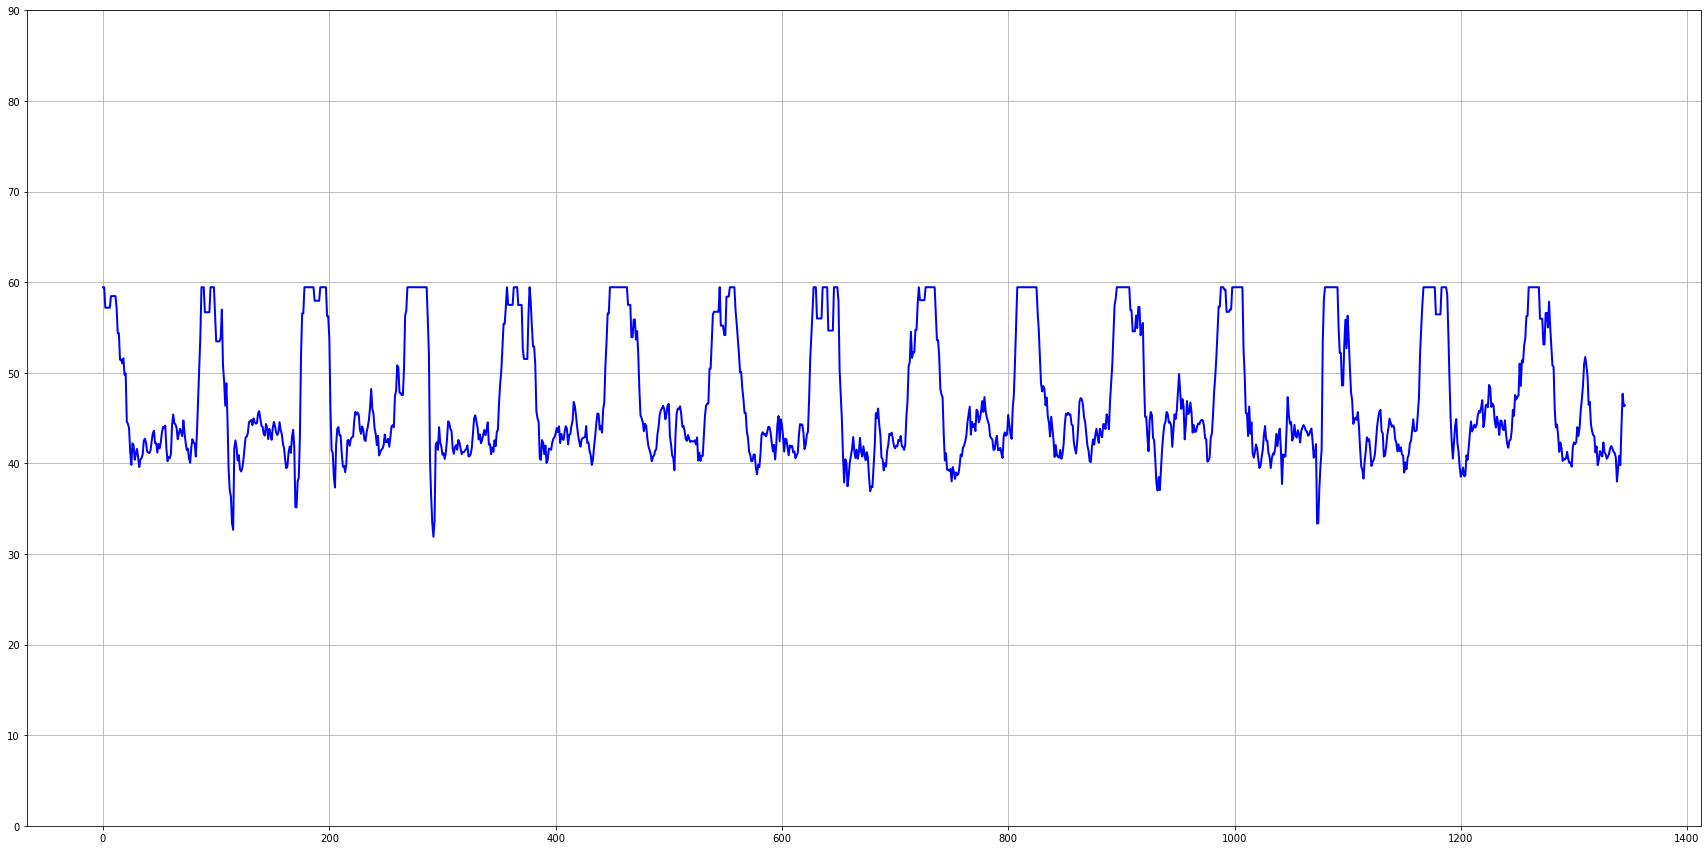

In [20]:
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smooth(df.values[:,0],40), 'r-', lw=2)
plt.plot(smoothed_df[0], 'b-', lw=2)
plt.ylim([0 , 90])
plt.grid()


In [21]:
data_days7_smooth1_edge0,_ = train_test_split(smoothed_df[0],(7/15))

In [53]:
data_days7_smooth1_edge0_normalized = data_days7_smooth1_edge0/max(data_days7_smooth1_edge0)

In [31]:
len(data_days7_smooth1_edge0)

628

In [87]:
smoothed_df_normalized_e0 = smoothed_df[0]/60


In [ ]:
#PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df[0],0.7,3,(5, 0, 1) ,(3, 0, 1, periodicity), 0))#16T#remove optmization? 

started = 2023-06-25 02:07:22.758428
parameters: (12, 0, 3)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  810
predictions:  810
predicted days:  9.0


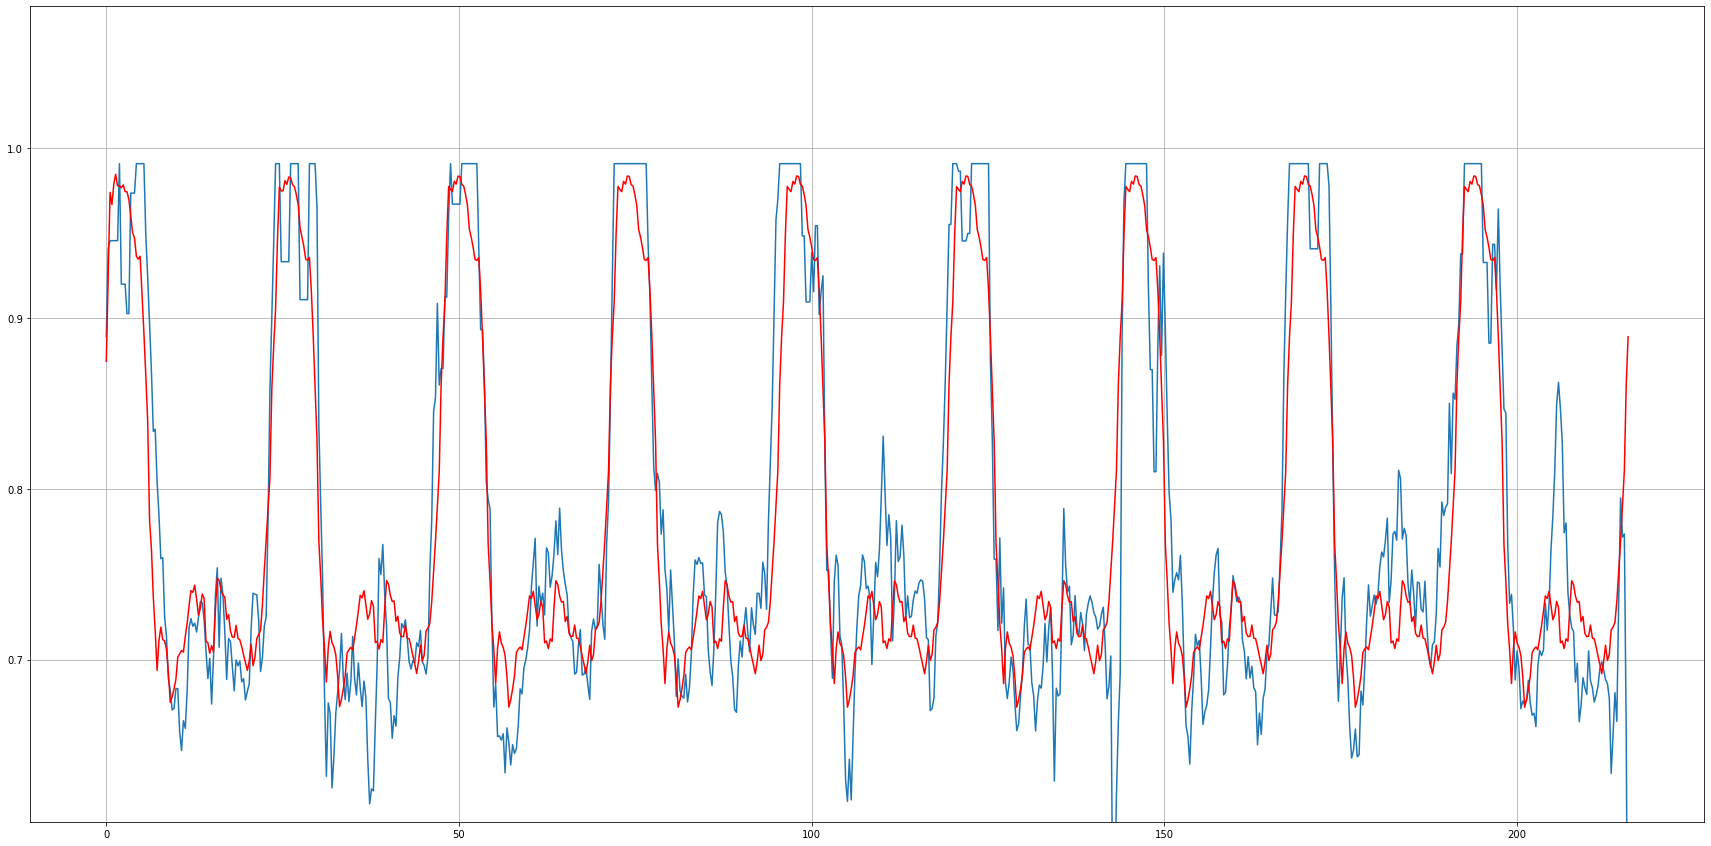

<Figure size 2160x1080 with 0 Axes>

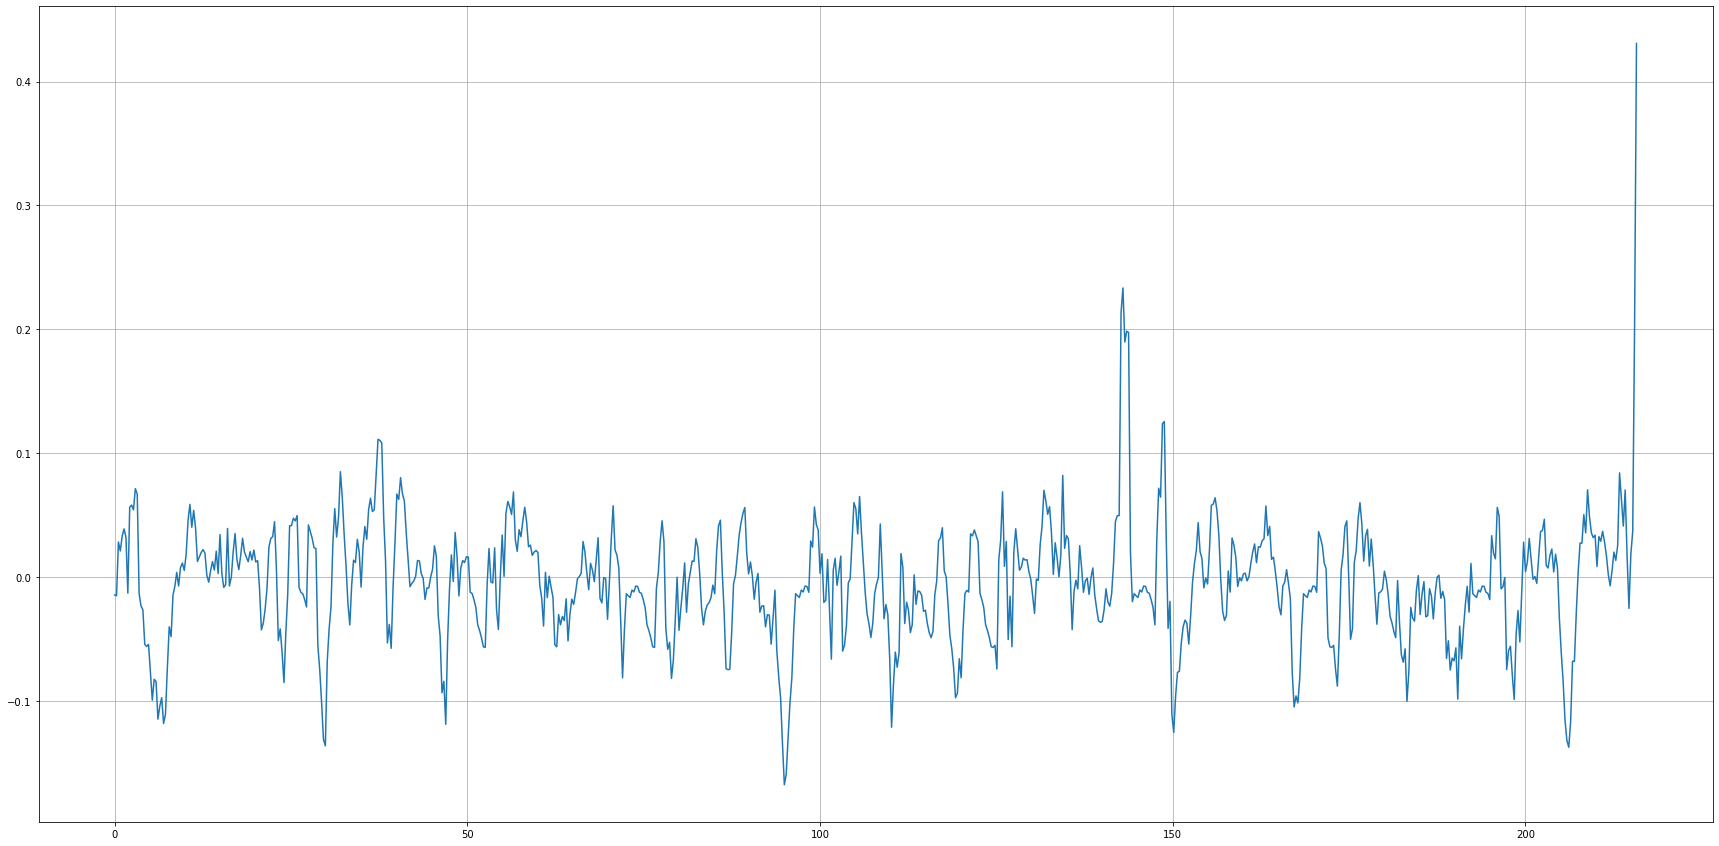

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0023706519235888335
RMSE=  0.048689340964823434
time taken:  0:07:00.512560


In [111]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(12, 0, 3) ,(1, 1, 1, periodicity), 0,))#16T

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(12, 0, 2) ,(1, 1, 2, periodicity), 0,))#16T

started = 2023-06-25 02:14:23.292724
parameters: (12, 0, 2)
seasonal parameters: (1, 1, 2, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


started = 2023-06-25 01:58:43.648613
parameters: (12, 0, 2)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  810
predictions:  810
predicted days:  9.0


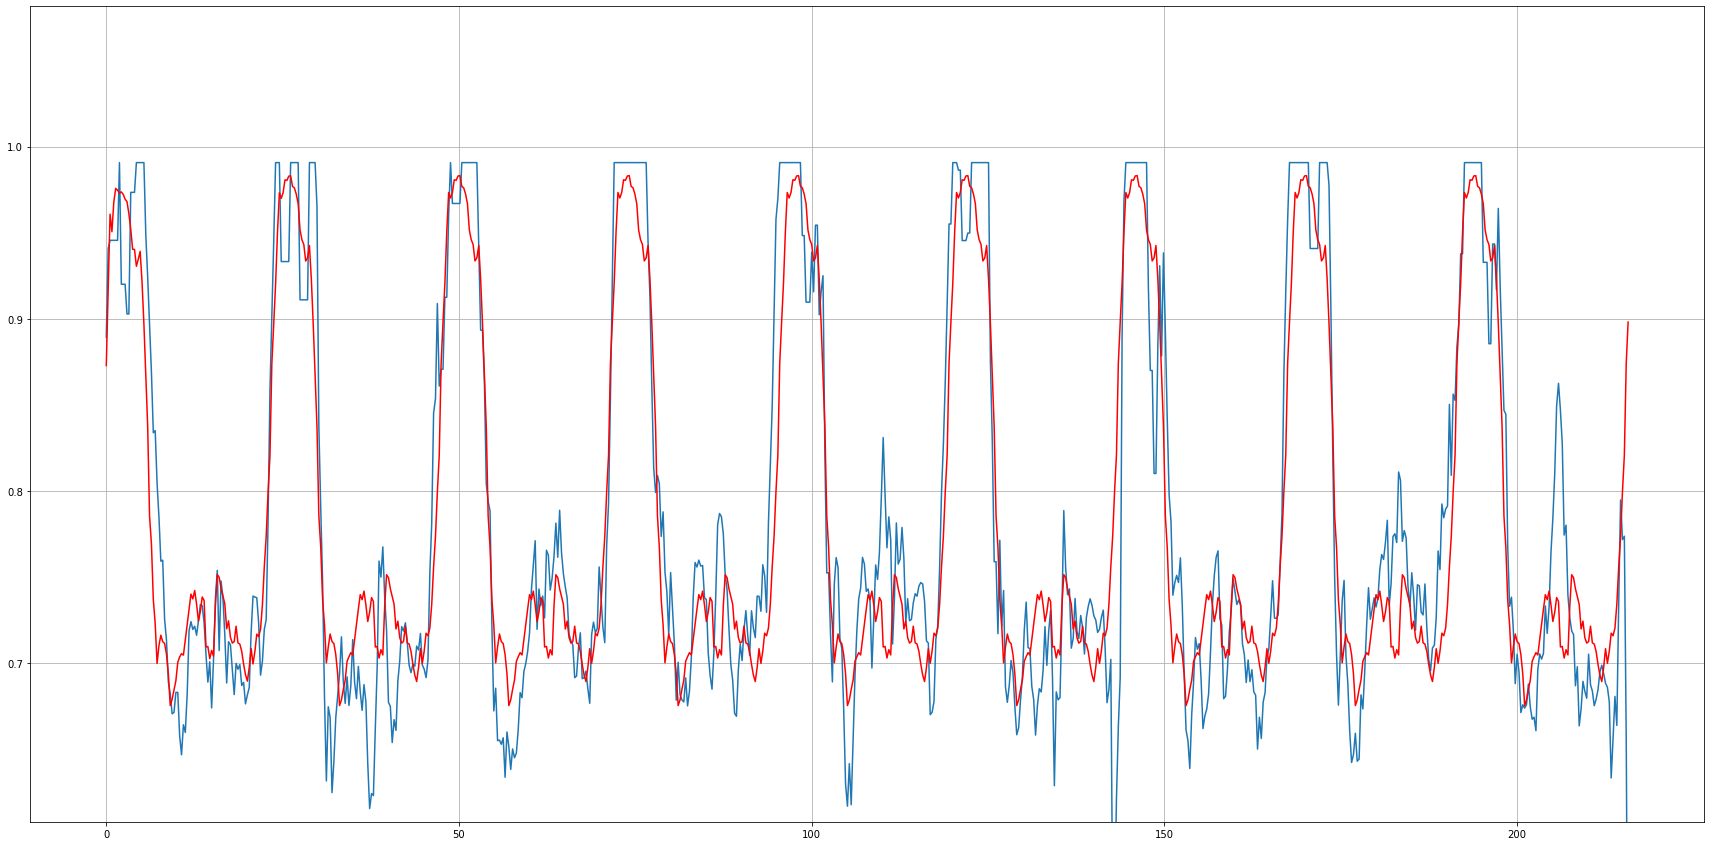

<Figure size 2160x1080 with 0 Axes>

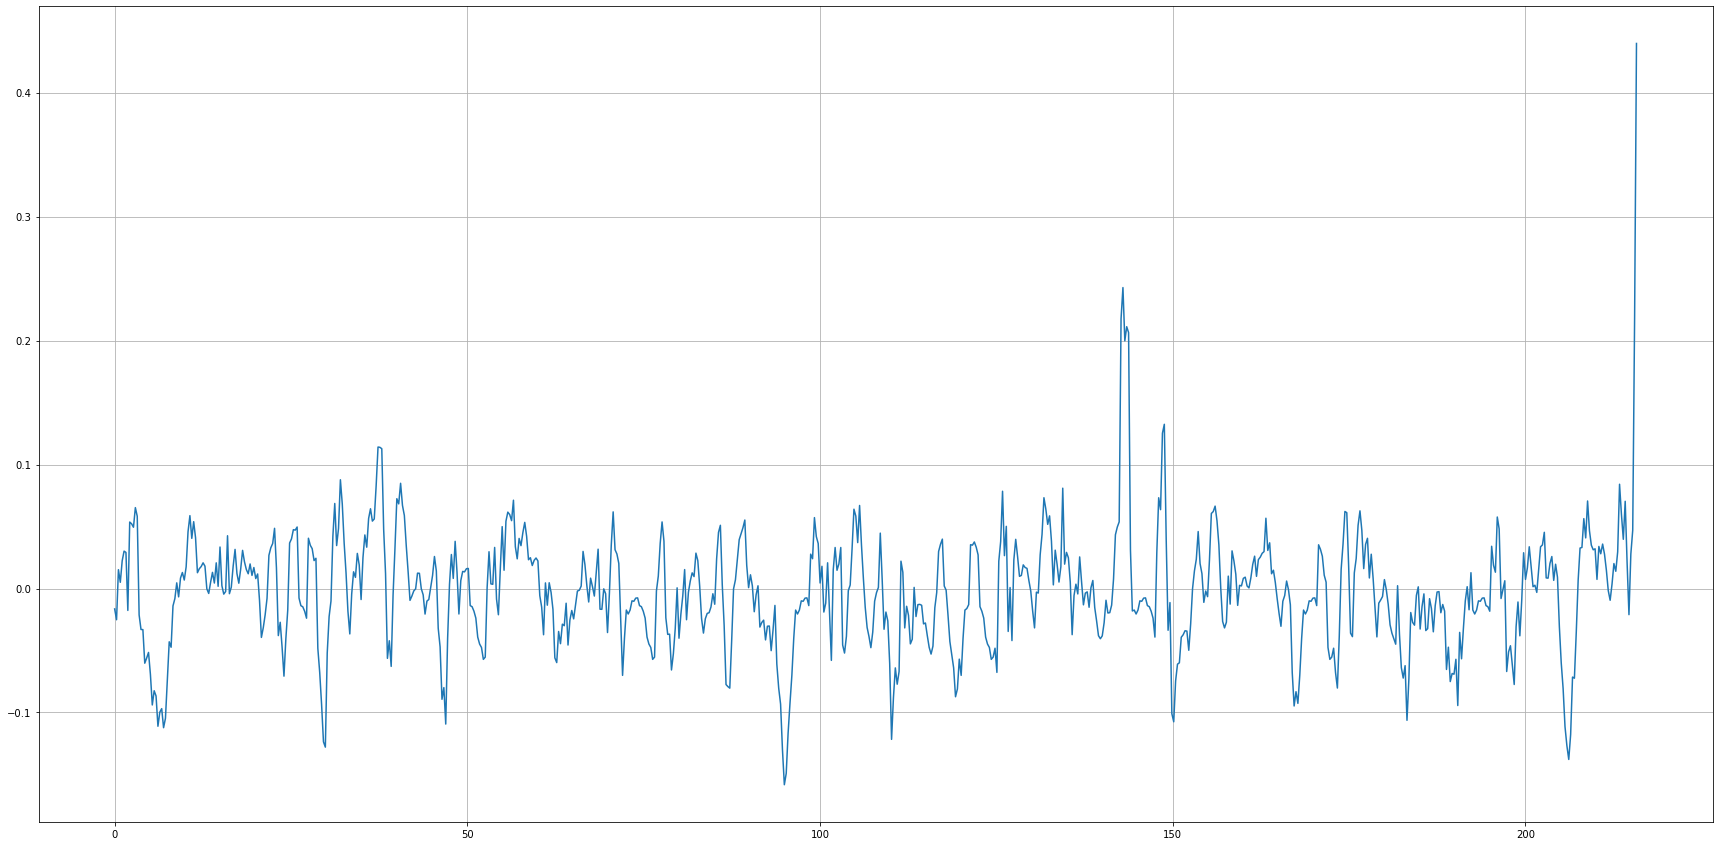

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0023151951222621482
RMSE=  0.048116474541077384
time taken:  0:06:39.686104


In [110]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(12, 0, 2) ,(1, 1, 1, periodicity), 0,))#16T

started = 2023-06-25 01:50:35.132753
parameters: (13, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  810
predictions:  810
predicted days:  9.0


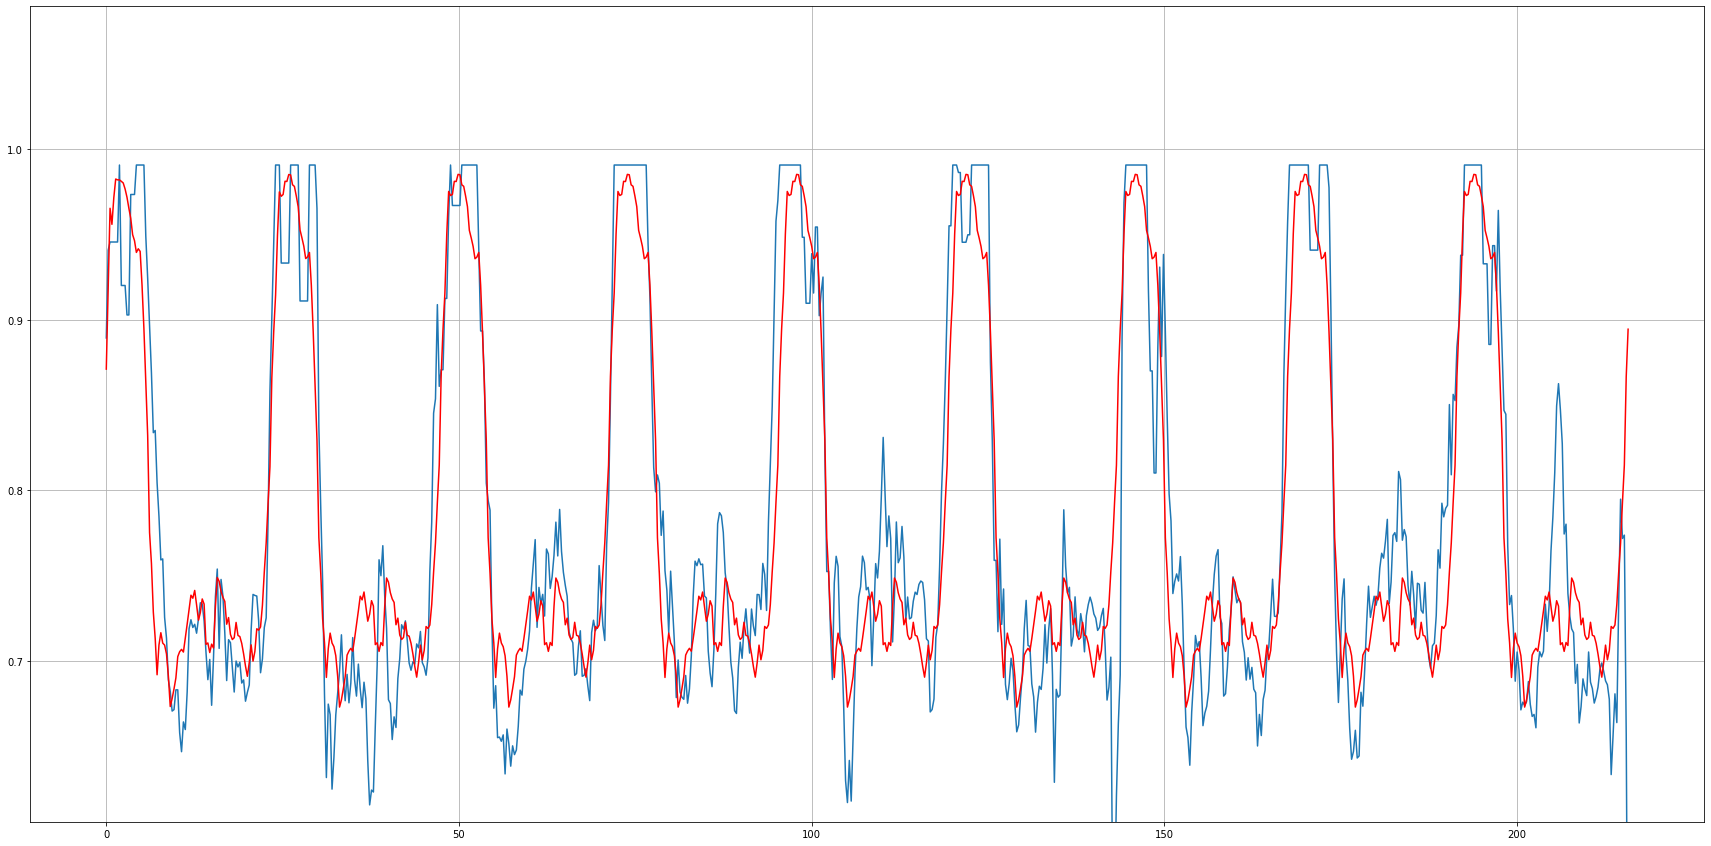

<Figure size 2160x1080 with 0 Axes>

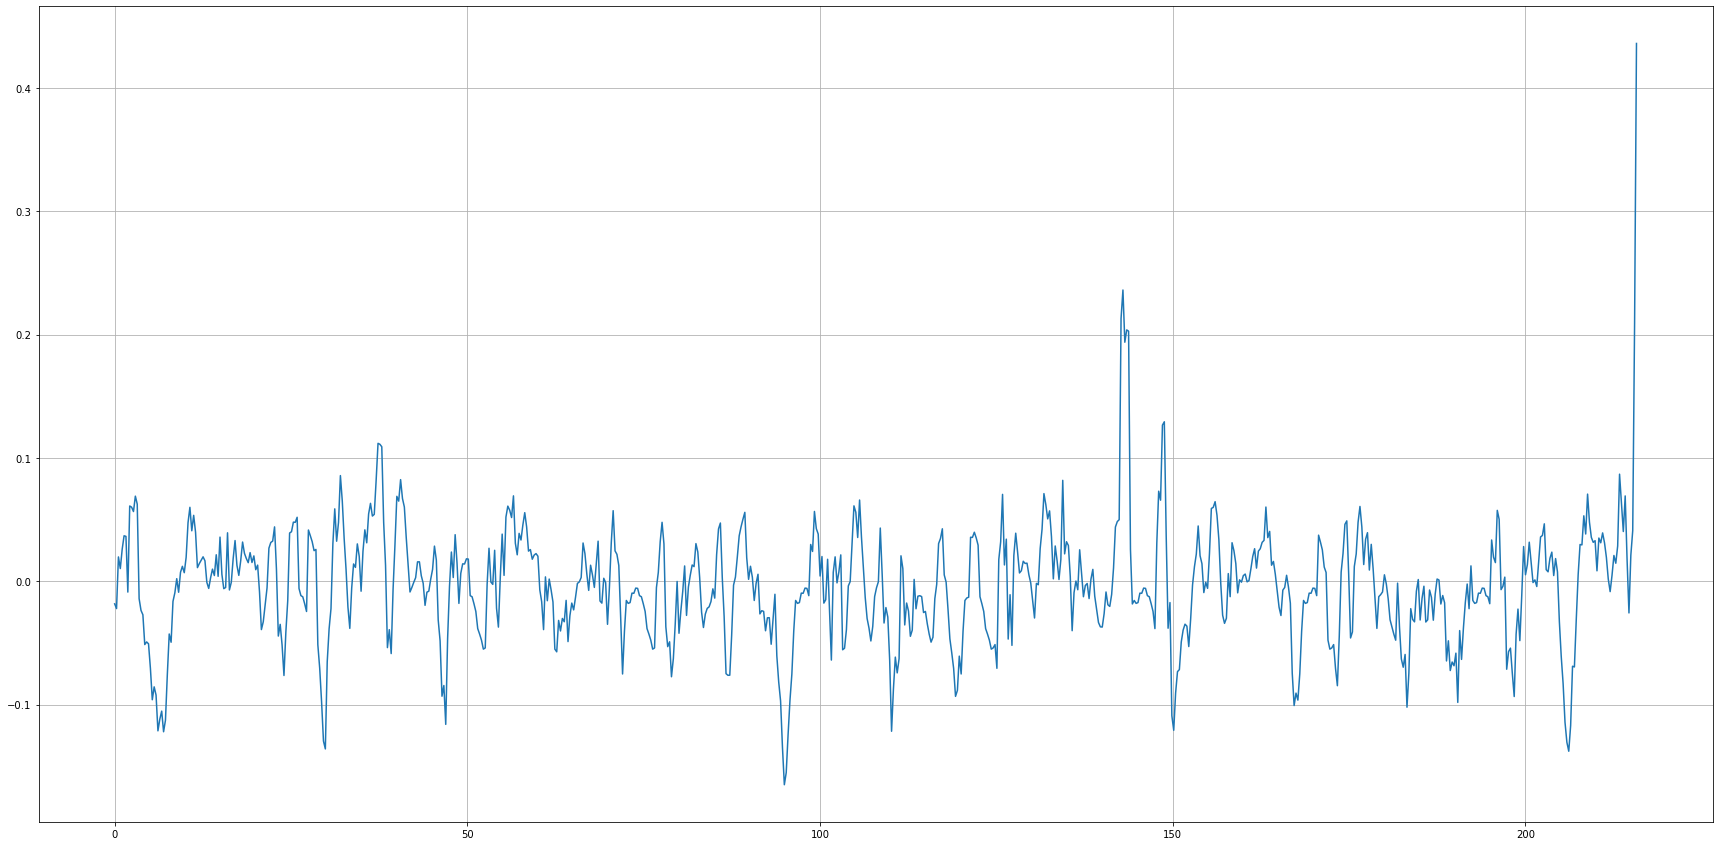

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.002356597936961273
RMSE=  0.04854480339811124
time taken:  0:07:19.257869


In [109]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(13, 0, 1) ,(1, 1, 1, periodicity), 0,))#16T

started = 2023-06-25 01:21:16.232692
parameters: (12, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  810
predictions:  810
predicted days:  9.0


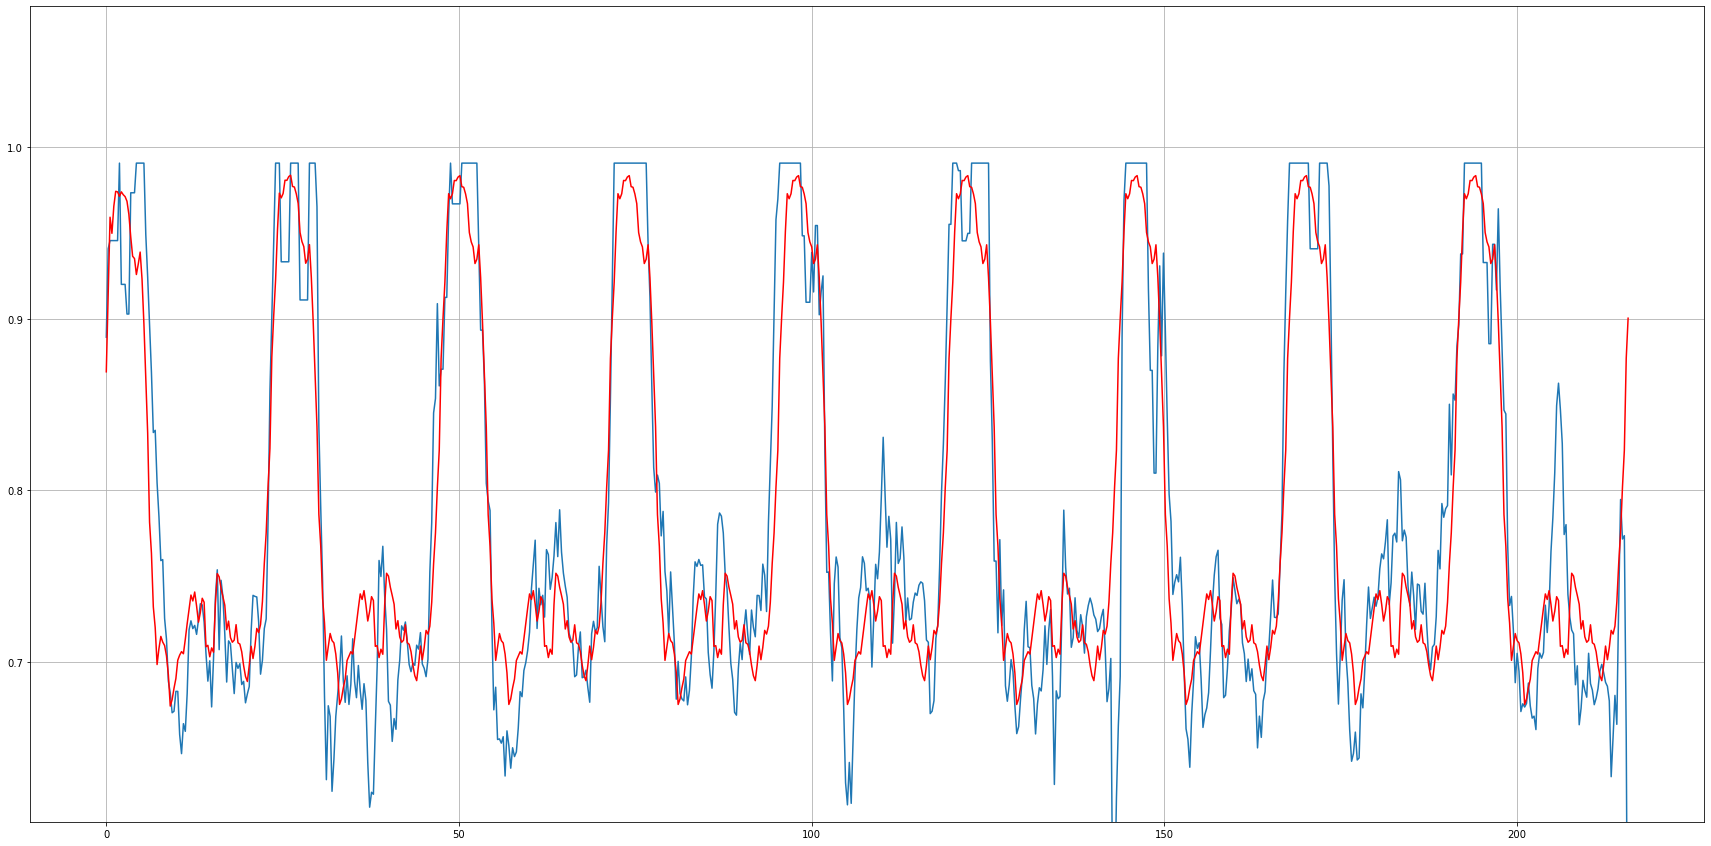

<Figure size 2160x1080 with 0 Axes>

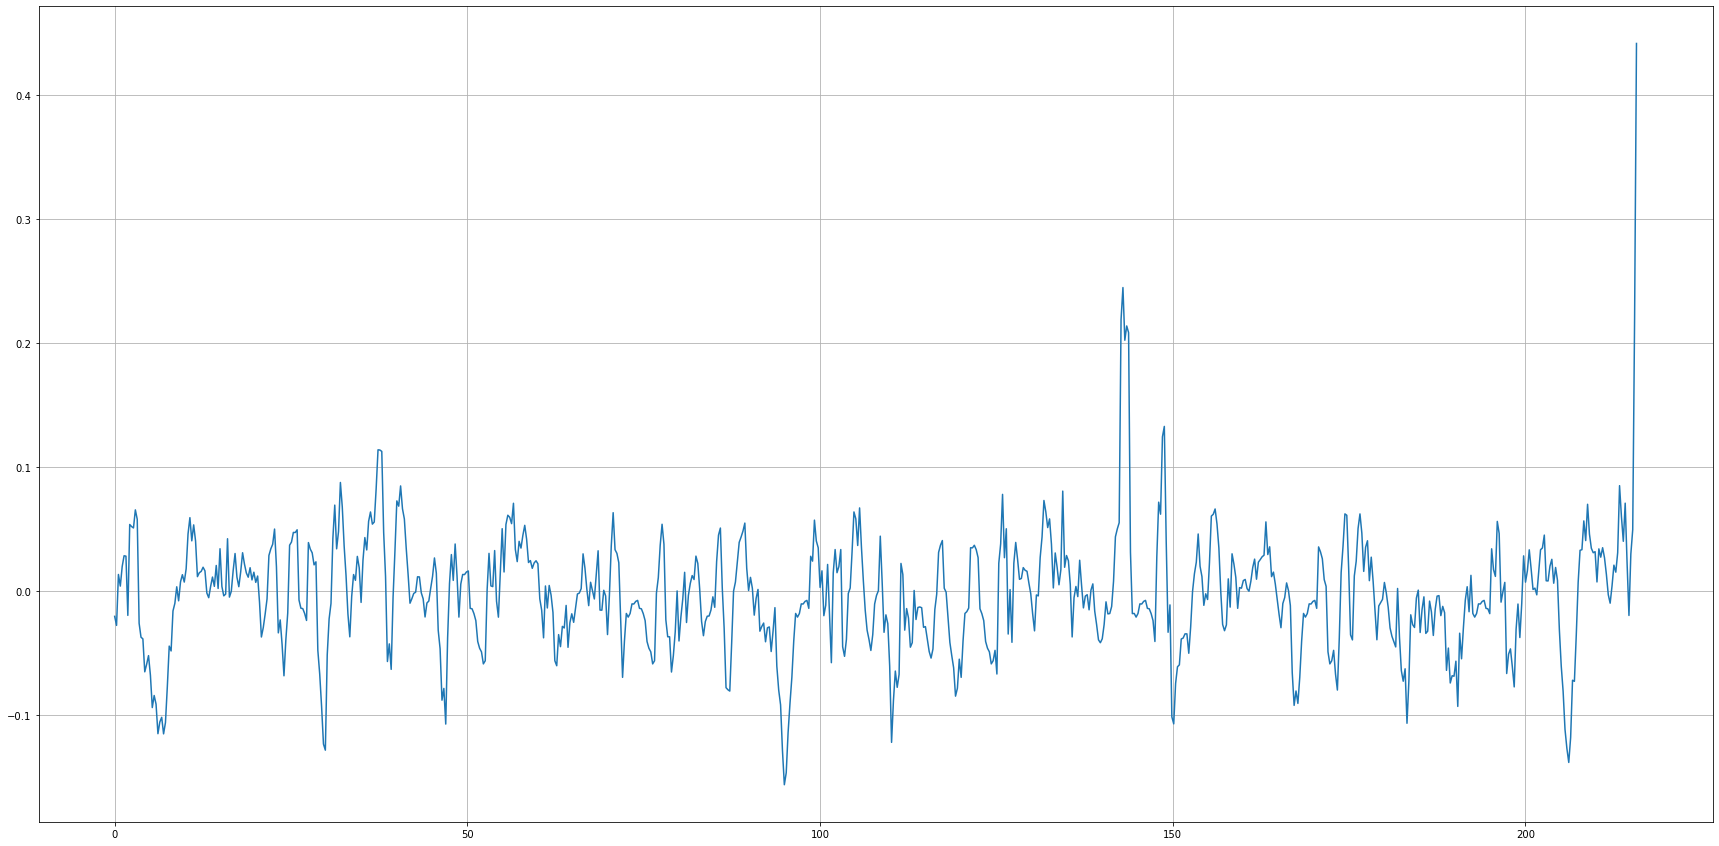

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.002321763027905726
RMSE=  0.04818467627685929
time taken:  0:06:13.868673


In [108]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(12, 0, 1) ,(1, 1, 1, periodicity), 0,))#16T

started = 2023-06-25 01:13:54.018459
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  810
predictions:  810
predicted days:  9.0


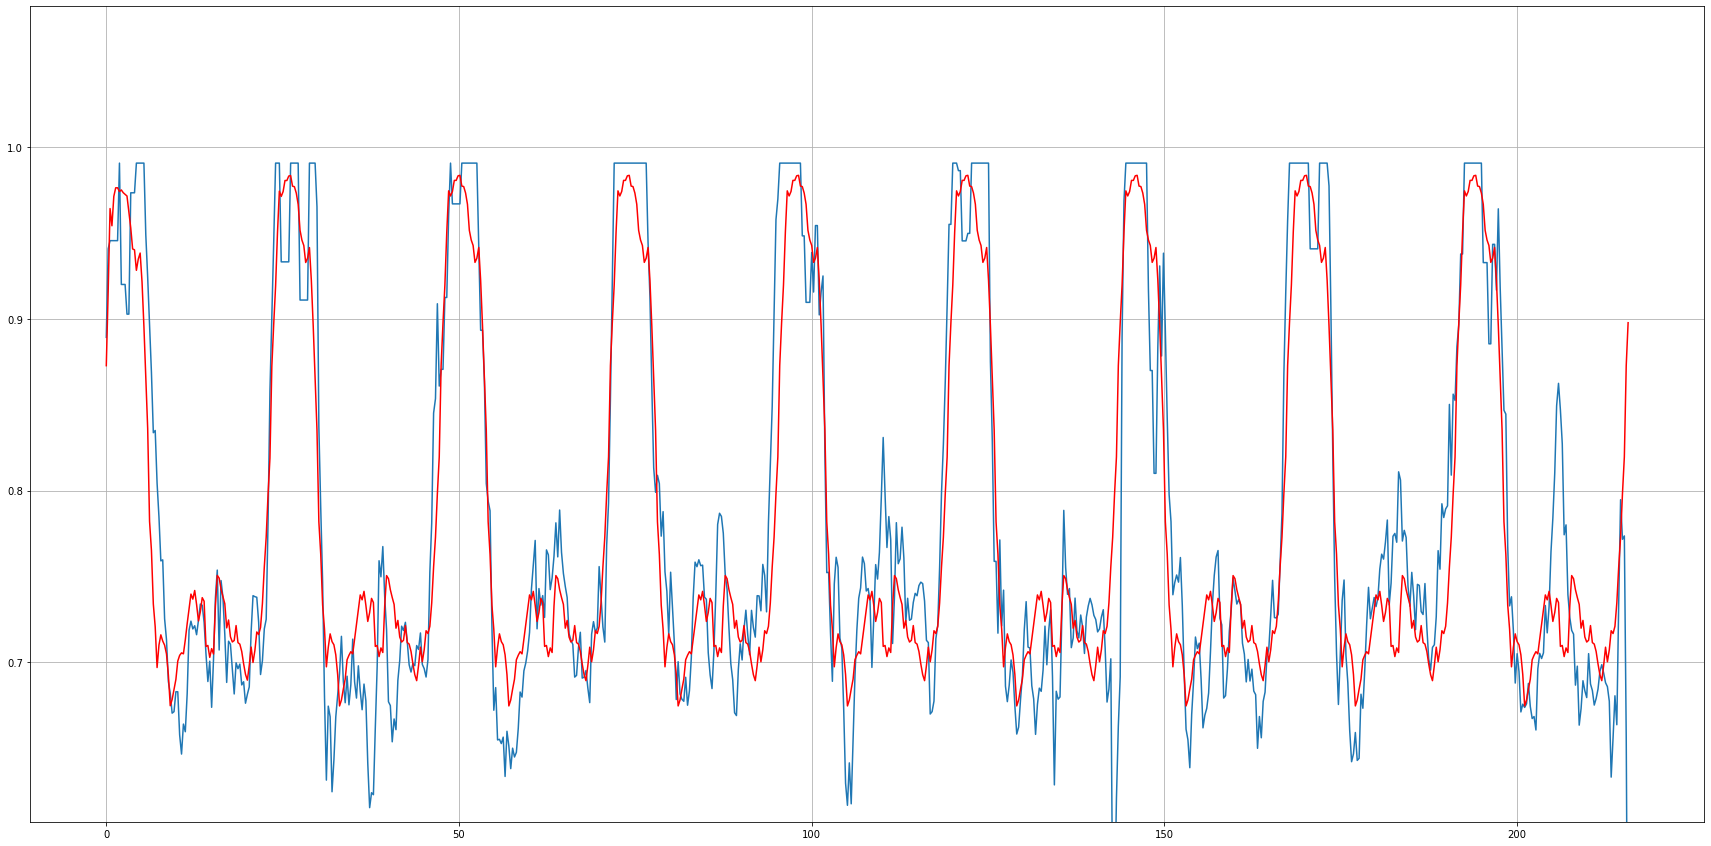

<Figure size 2160x1080 with 0 Axes>

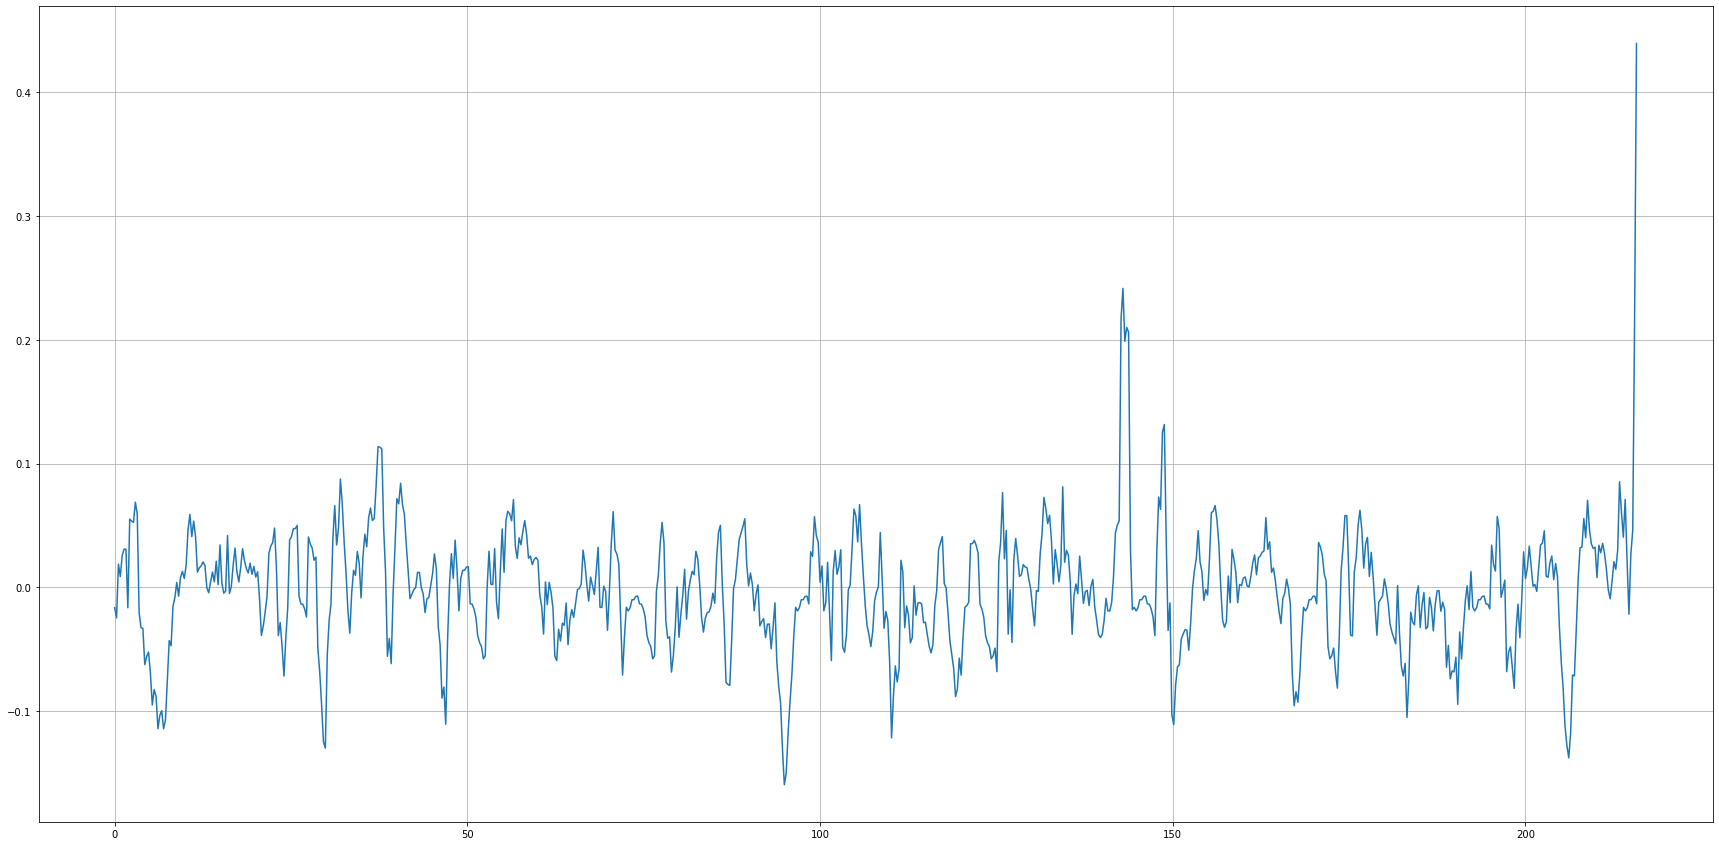

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.002323947446130603
RMSE=  0.048207338094221744
time taken:  0:07:22.191291


In [107]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(11, 0, 1) ,(1, 1, 1, periodicity), 0,))#16T

started = 2023-06-25 01:09:01.257925
parameters: (10, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  810
predictions:  810
predicted days:  9.0


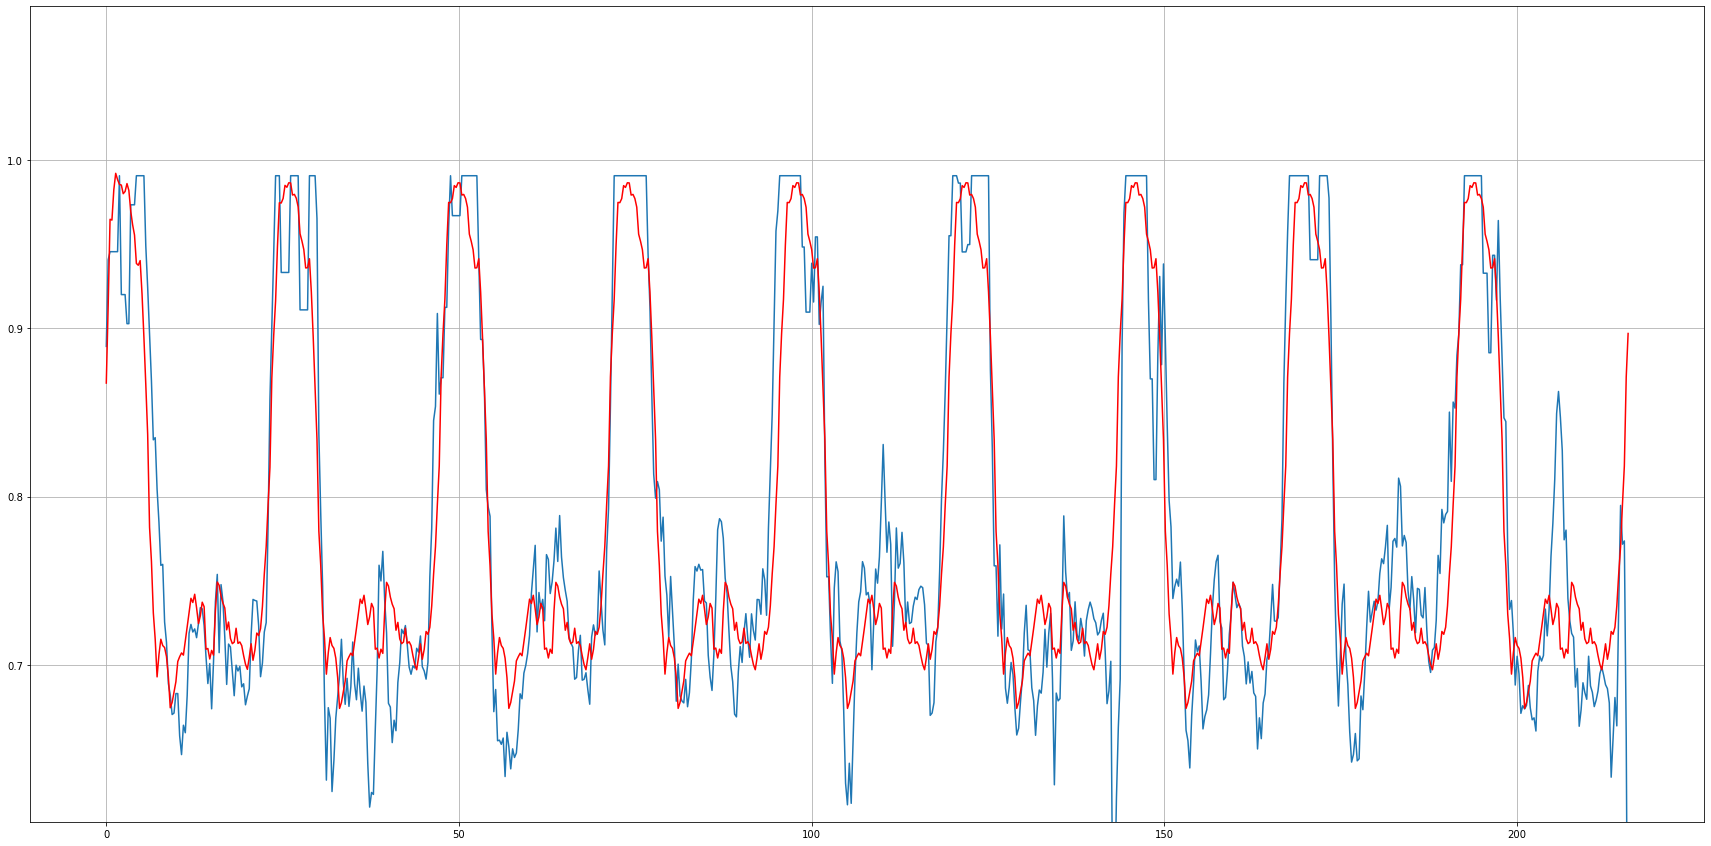

<Figure size 2160x1080 with 0 Axes>

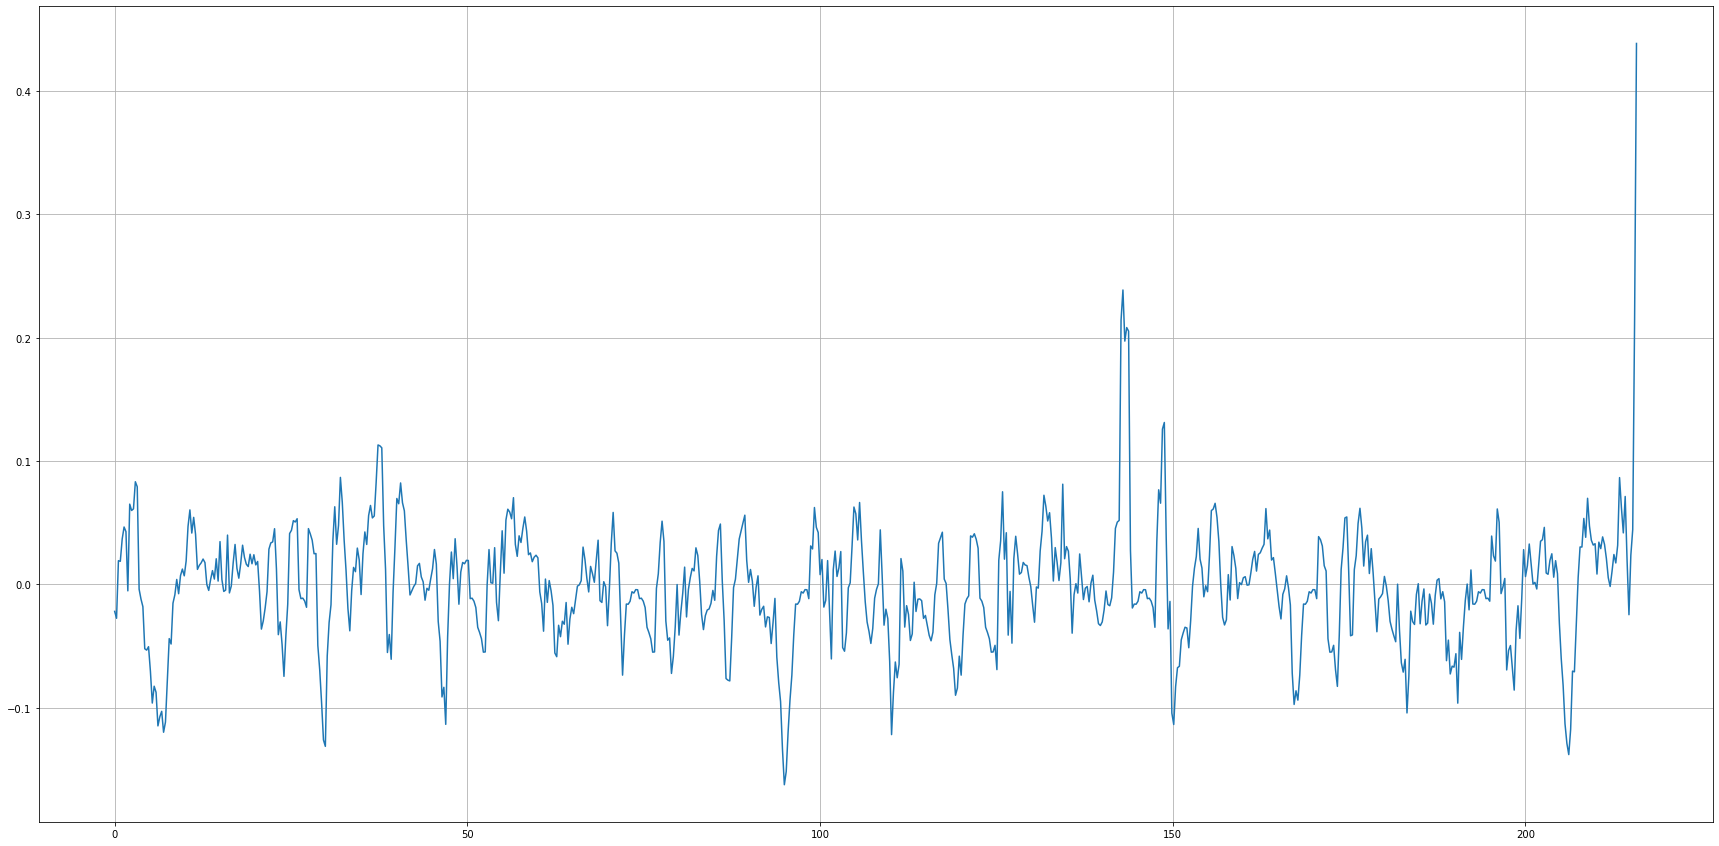

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0023426928829868004
RMSE=  0.04840137273866104
time taken:  0:04:52.743104


In [106]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(10, 0, 1) ,(1, 1, 1, periodicity), 0,))#16T

started = 2023-06-25 01:03:41.535049
parameters: (9, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  810
predictions:  810
predicted days:  9.0


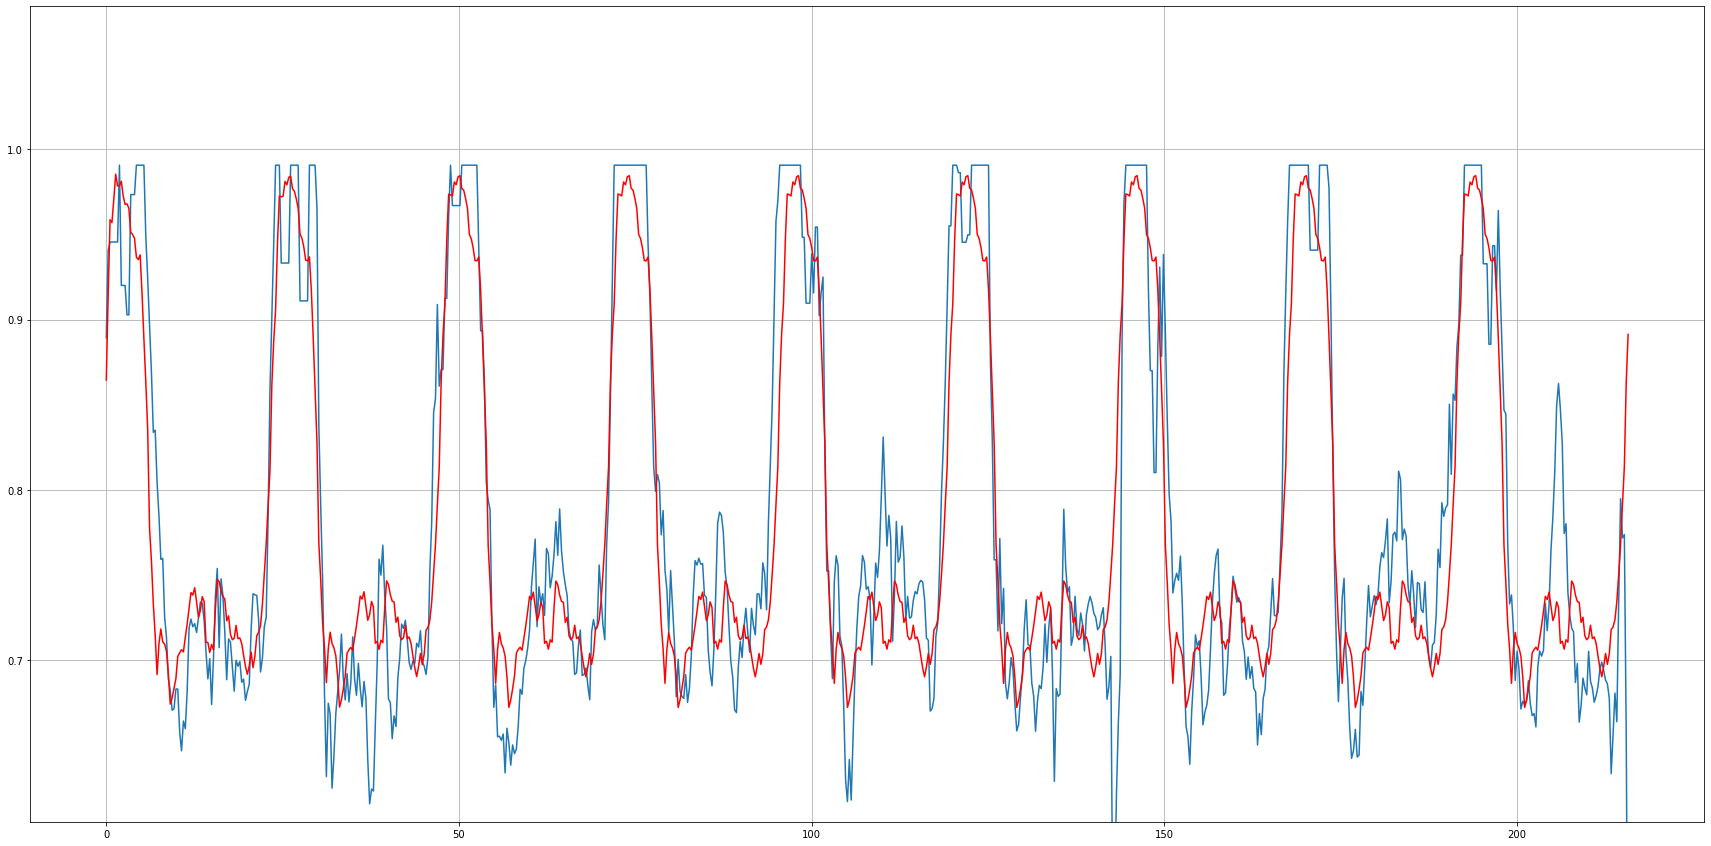

<Figure size 2160x1080 with 0 Axes>

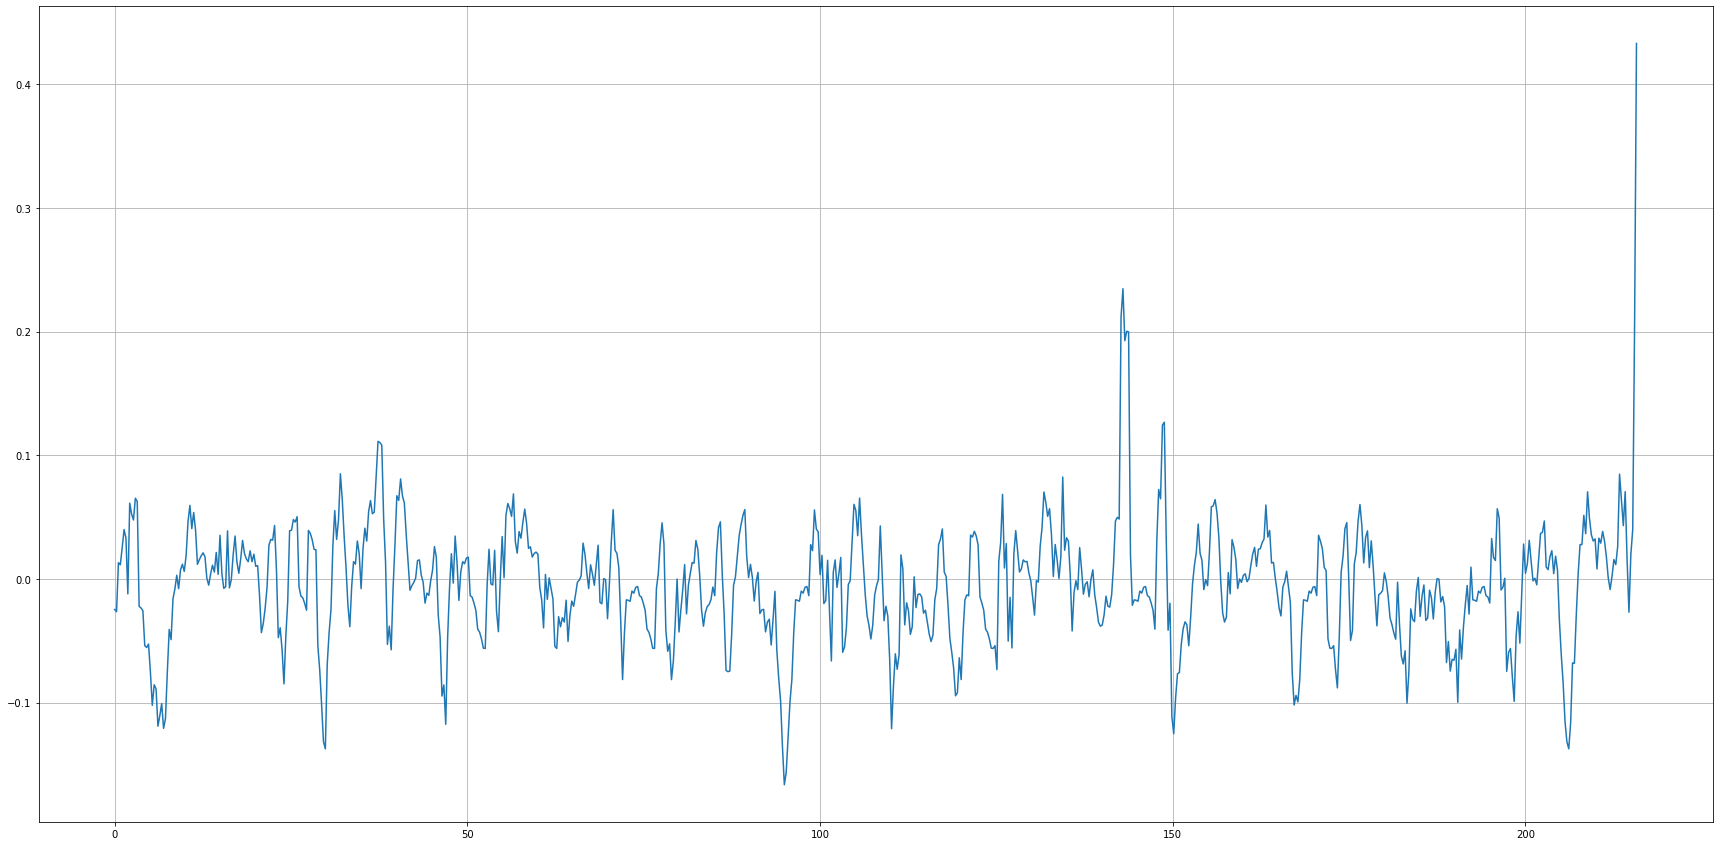

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0023798003401594653
RMSE=  0.048783197313823794
time taken:  0:05:19.709306


In [105]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(9, 0, 1) ,(1, 1, 1, periodicity), 0,))#16T

started = 2023-06-25 00:59:18.733321
parameters: (8, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  540
training days:  6.0
testing data:  810
testing days:  9.0
start training
start predicting
test:  810
predictions:  810
predicted days:  9.0


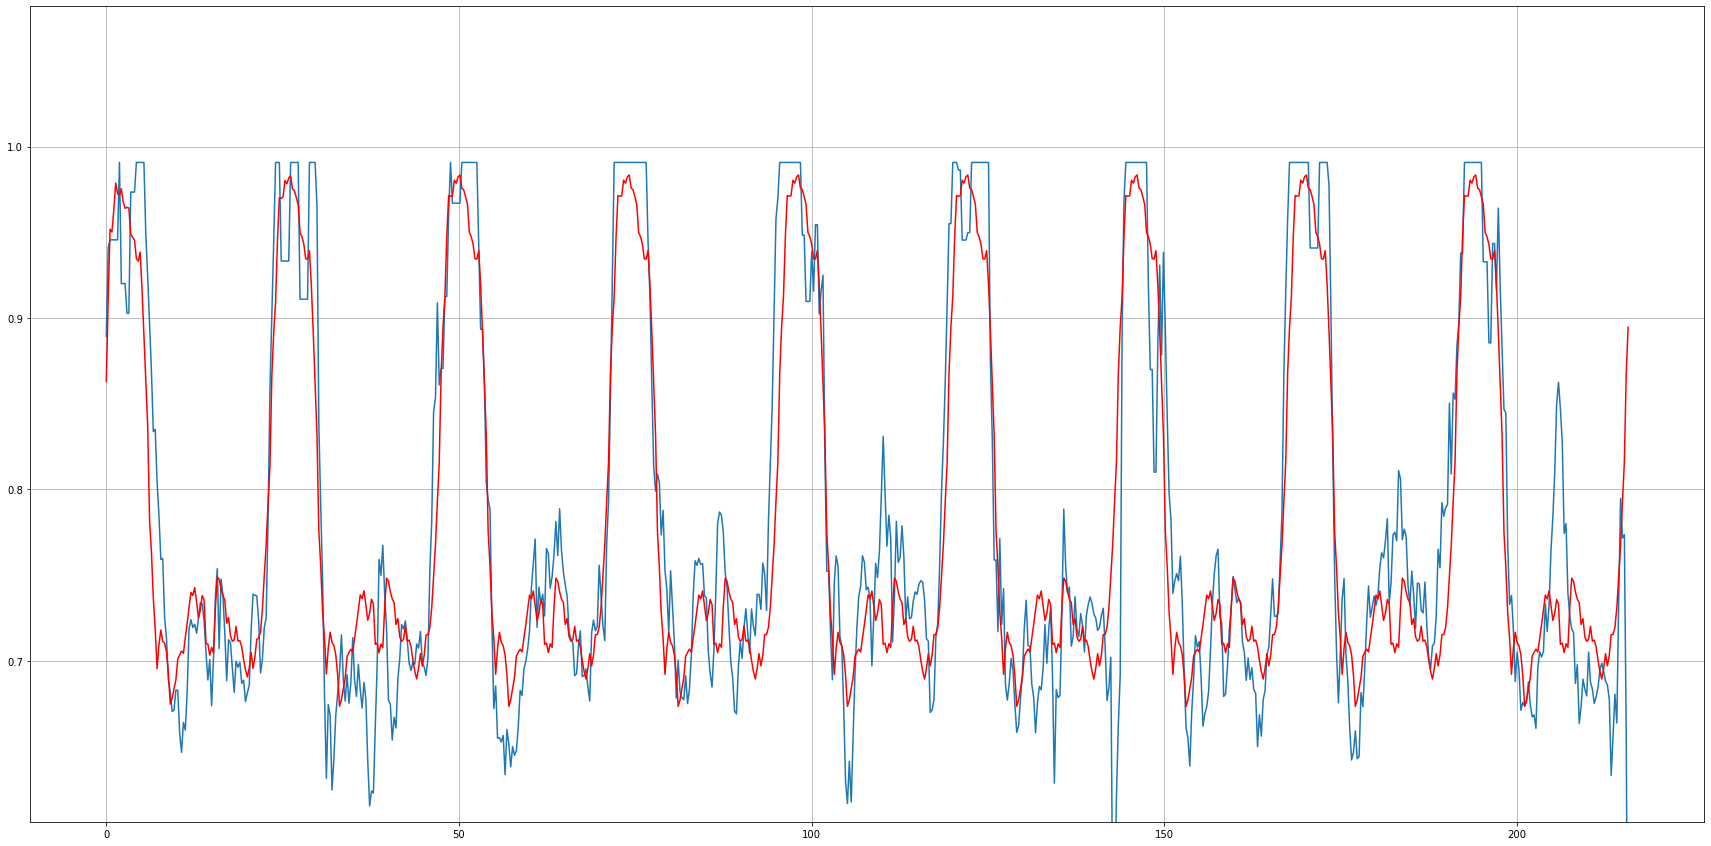

<Figure size 2160x1080 with 0 Axes>

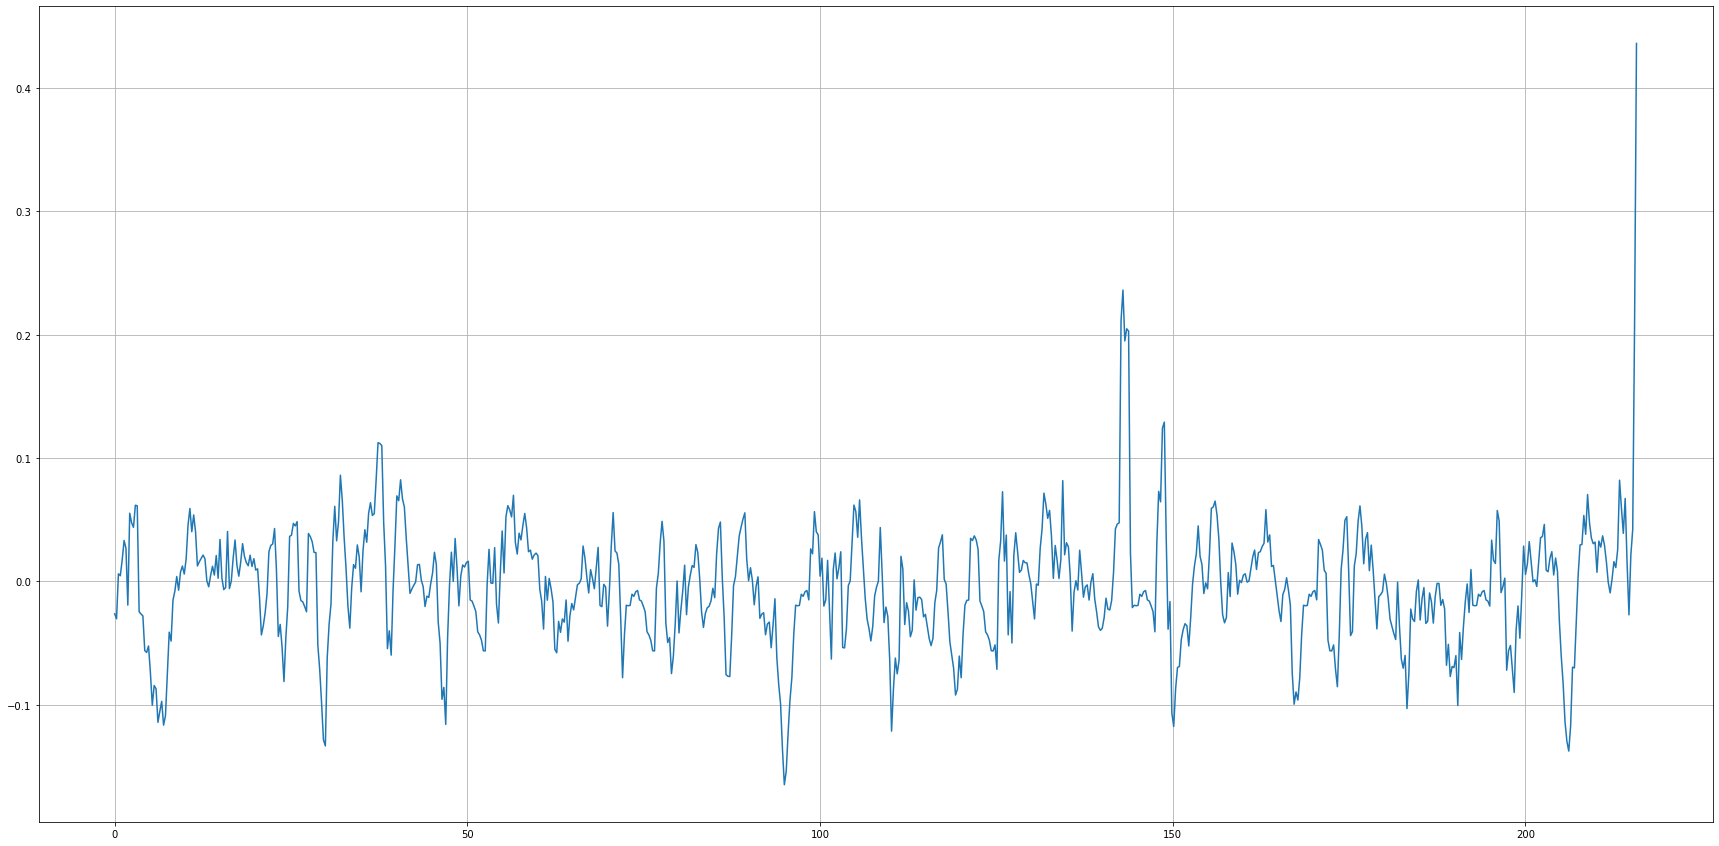

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.002353286001561818
RMSE=  0.04851067925273587
time taken:  0:04:22.785725


In [104]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,6/15,3,(8, 0, 1) ,(1, 1, 1, periodicity), 0,))#16T

In [103]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,4/7,3,(8, 0, 1) ,(3, 1, 1, periodicity), 0,))#16T

started = 2023-06-25 00:41:23.489381
parameters: (8, 0, 1)
seasonal parameters: (3, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  358
training days:  3.977777777777778
testing data:  270
testing days:  3.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


KeyboardInterrupt: 

<Figure size 2160x1080 with 0 Axes>

In [ ]:
#PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,4/7,3,(8, 0, 1) ,(2, 1, 1, periodicity), 0,))#16T

In [ ]:
#PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,4/7,3,(8, 0, 1) ,(1, 1, 1, periodicity), 0,))#16T

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,4/7,3,(8, 0, 1) ,(0, 1, 1, periodicity), 0,))#16T

parameters: (2, 0, 1)
seasonal parameters: (1, 1, 1, 90)
start training
start predicting
test:  810
predictions:  810
mean squared error=  8.919775440616
RMSE=  2.986599310355509
time taken:  105.49699687957764


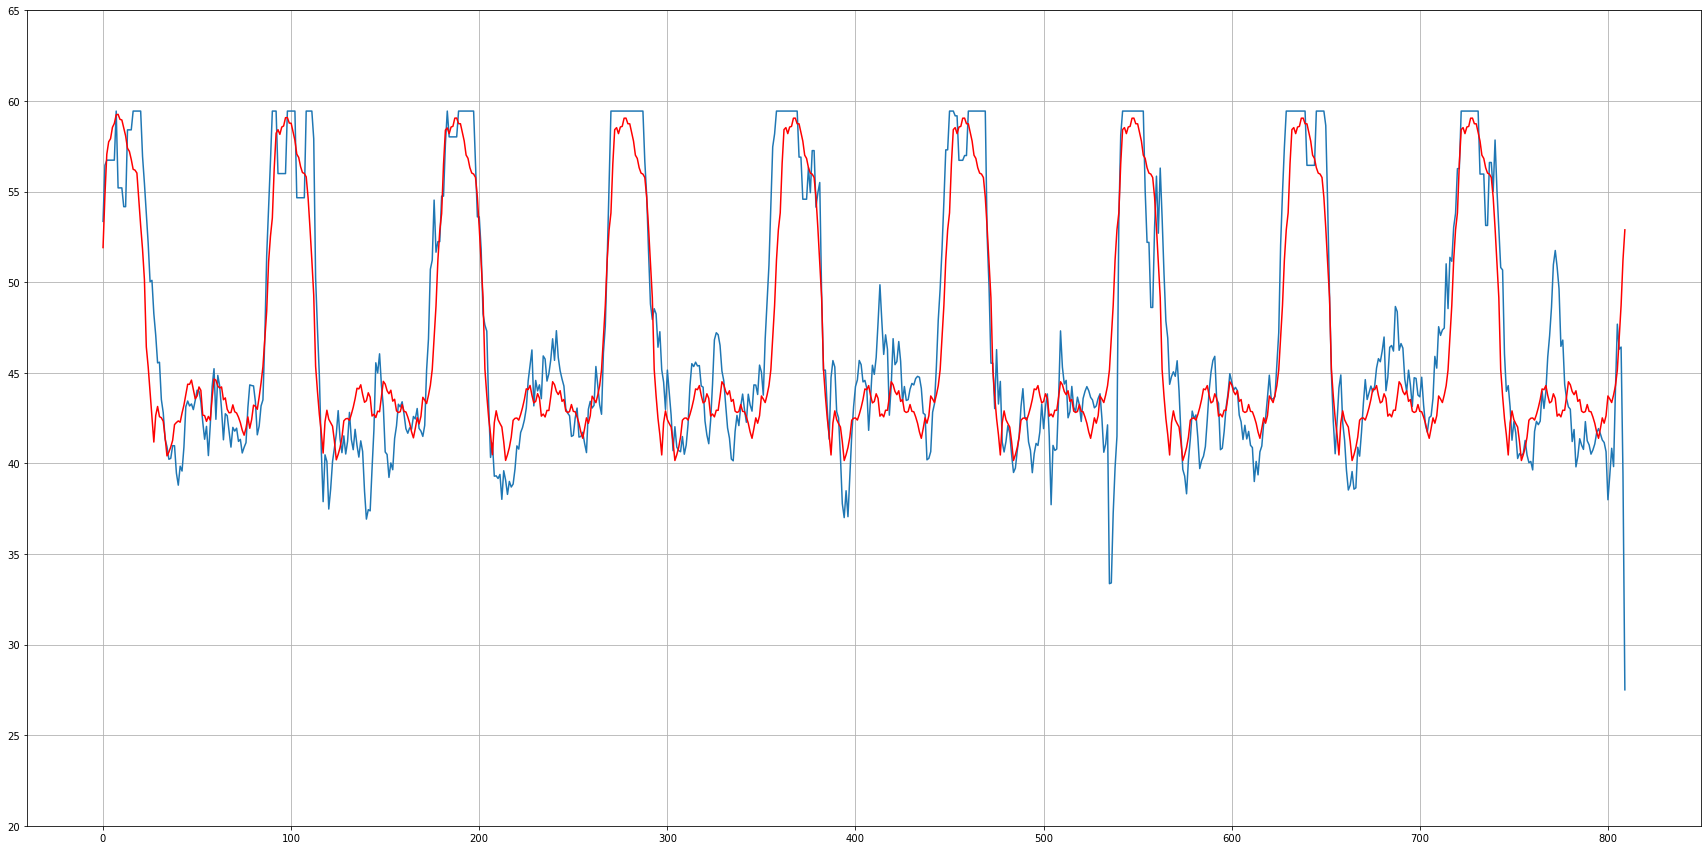

In [35]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df[0],0.4,3,(2, 0, 1) ,(1, 1, 1, periodicity), 0))#16T#remove optmization? 

started = 2023-06-24 22:15:50.178554
parameters: (2, 0, 1)
seasonal parameters: (1, 1, 1, 90)
training data:  538
start training
start predicting
test:  90
predictions:  90


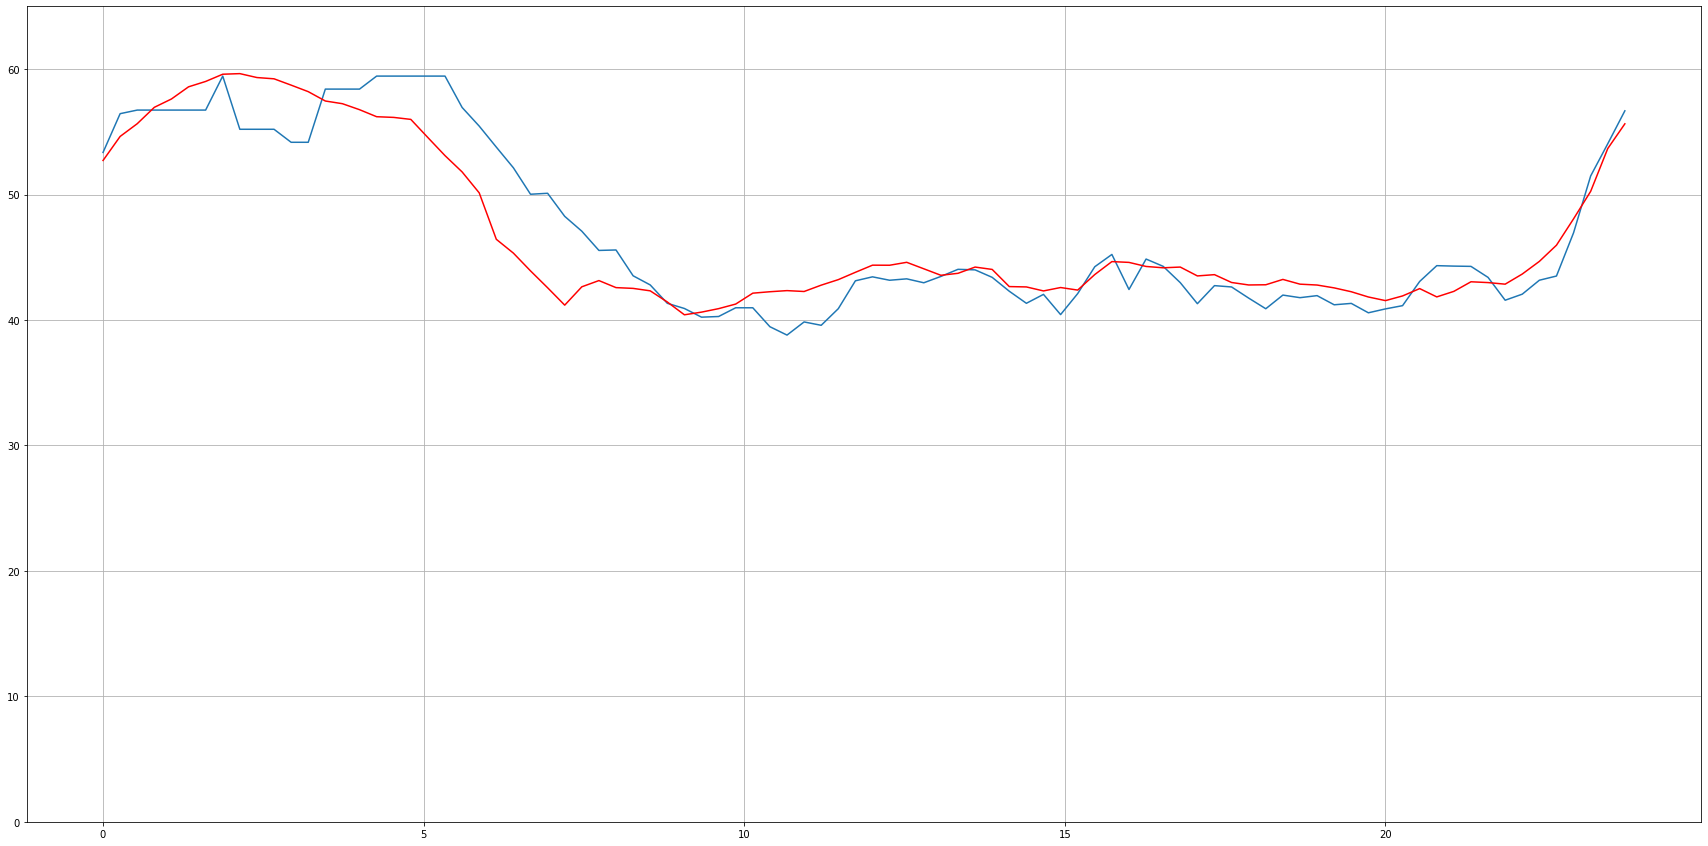

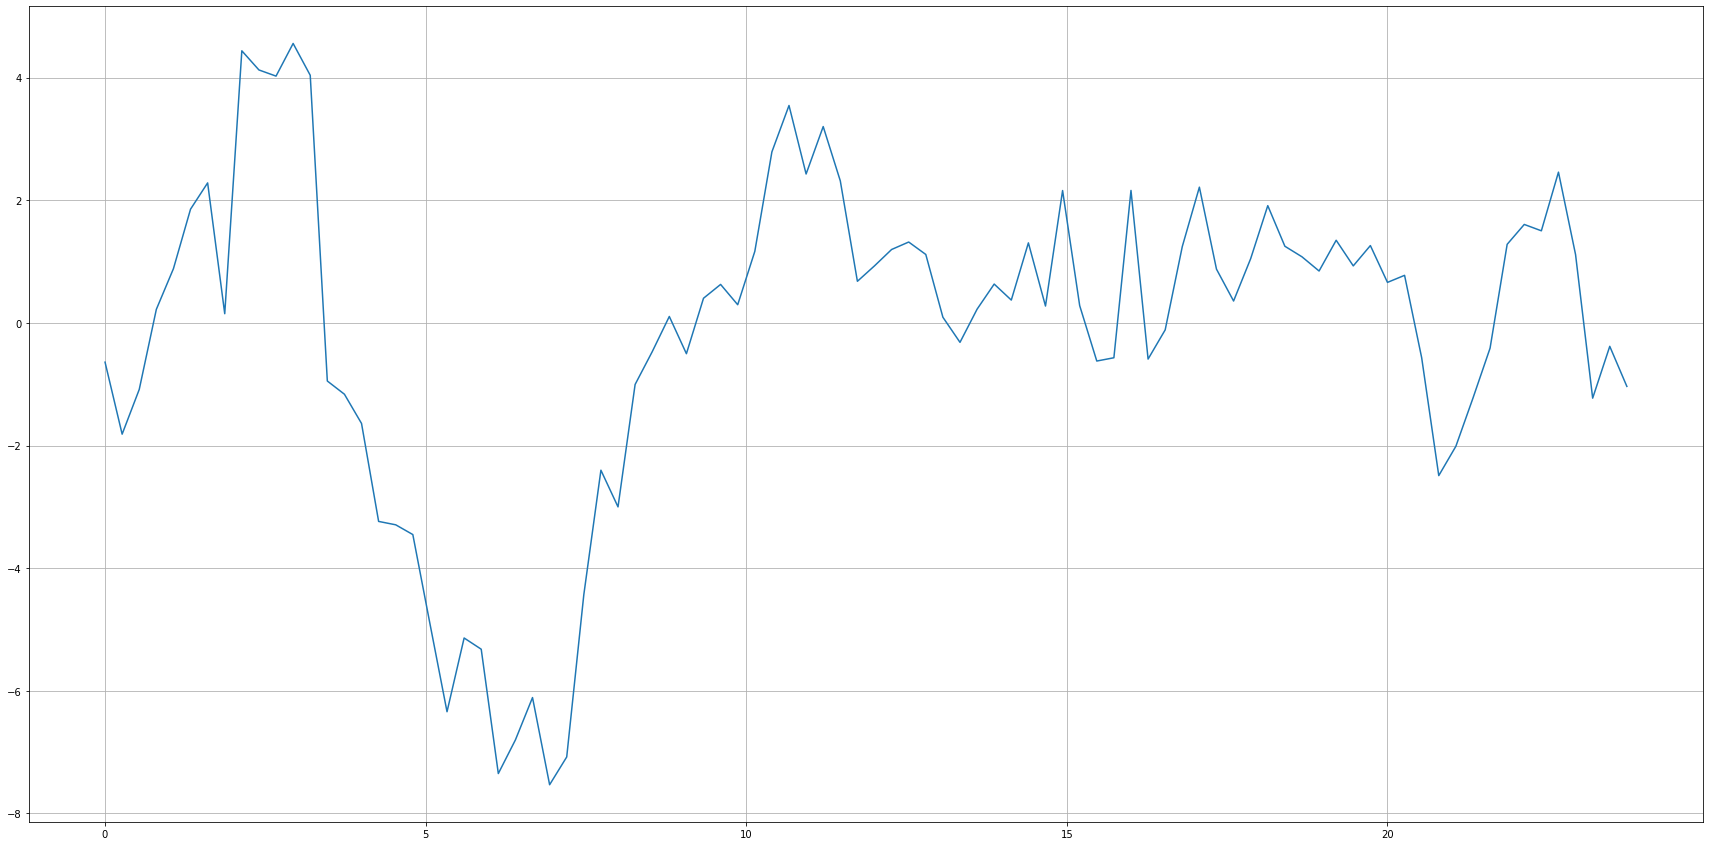

mean squared error=  7.265256254397846
RMSE=  2.695413930066743


NameError: name 'timedelta' is not defined

In [41]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0,6/7,3,(2, 0, 1) ,(1, 1, 1, periodicity), 0))#16T#remove optmization? 

started = 2023-06-24 22:21:13.902385
parameters: (2, 0, 1)
seasonal parameters: (1, 1, 1, 90)
training data:  538
start training
start predicting
training dats:  5.977777777777778
test:  90
predictions:  90


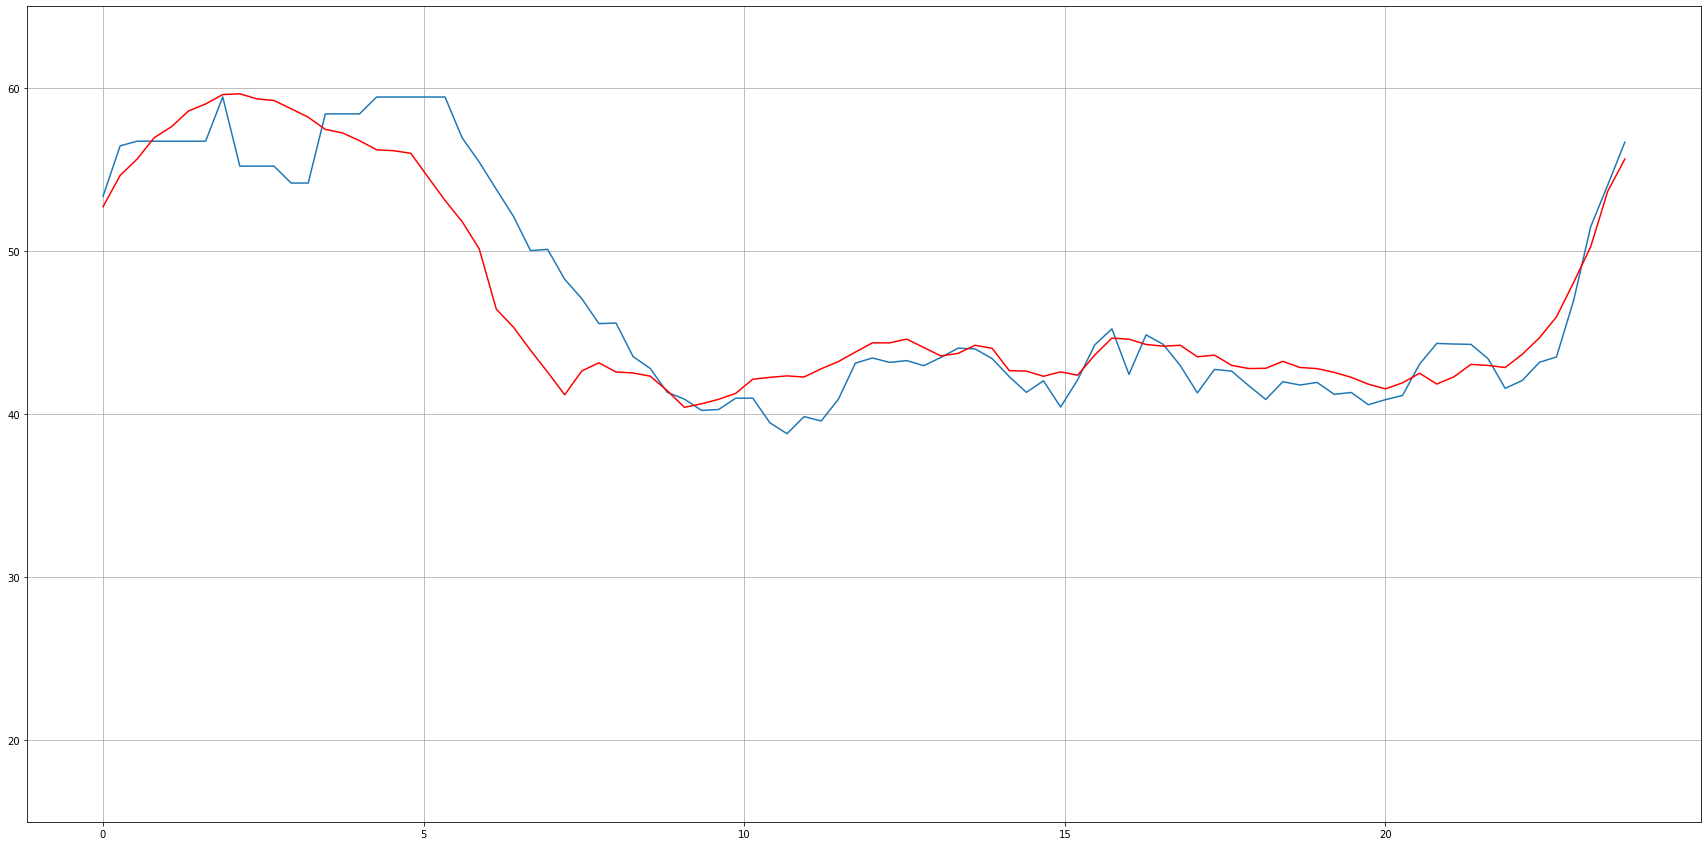

<Figure size 2160x1080 with 0 Axes>

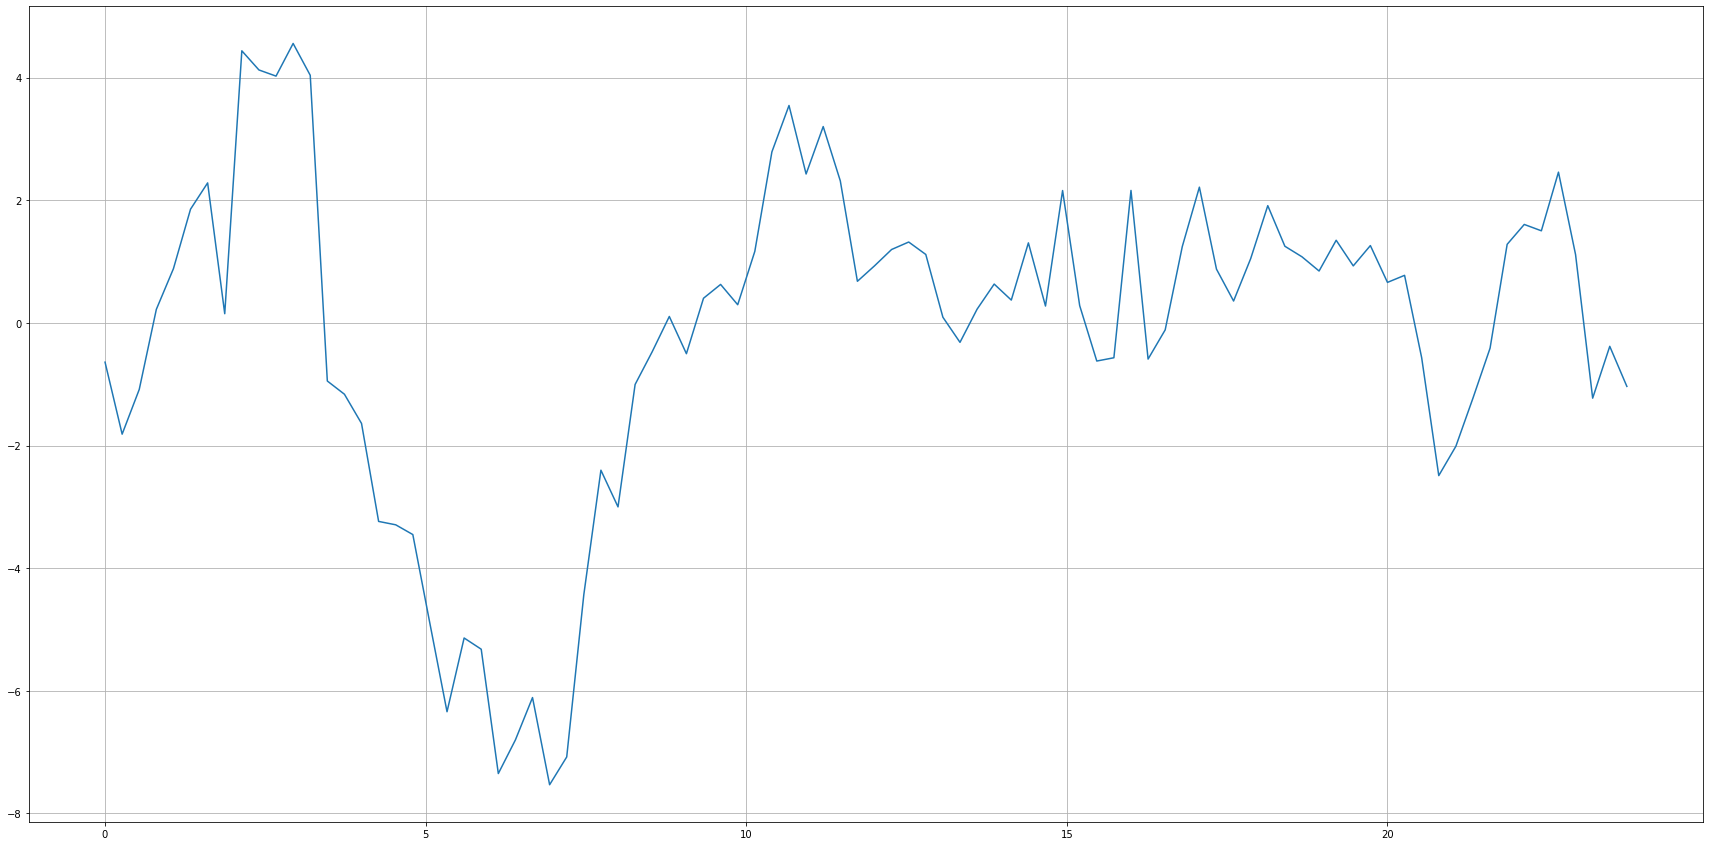

<Figure size 2160x1080 with 0 Axes>

mean squared error=  7.265256254397846
RMSE=  2.695413930066743
time taken:  0:02:22.304756


In [44]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0,6/7,3,(2, 0, 1) ,(1, 1, 1, periodicity), 0))#16T#remove optmization? 

started = 2023-06-24 22:26:49.882144
parameters: (2, 0, 1)
seasonal parameters: (2, 1, 1, 90)
training data:  538
start training
start predicting
training dats:  5.977777777777778
test:  90
predictions:  90


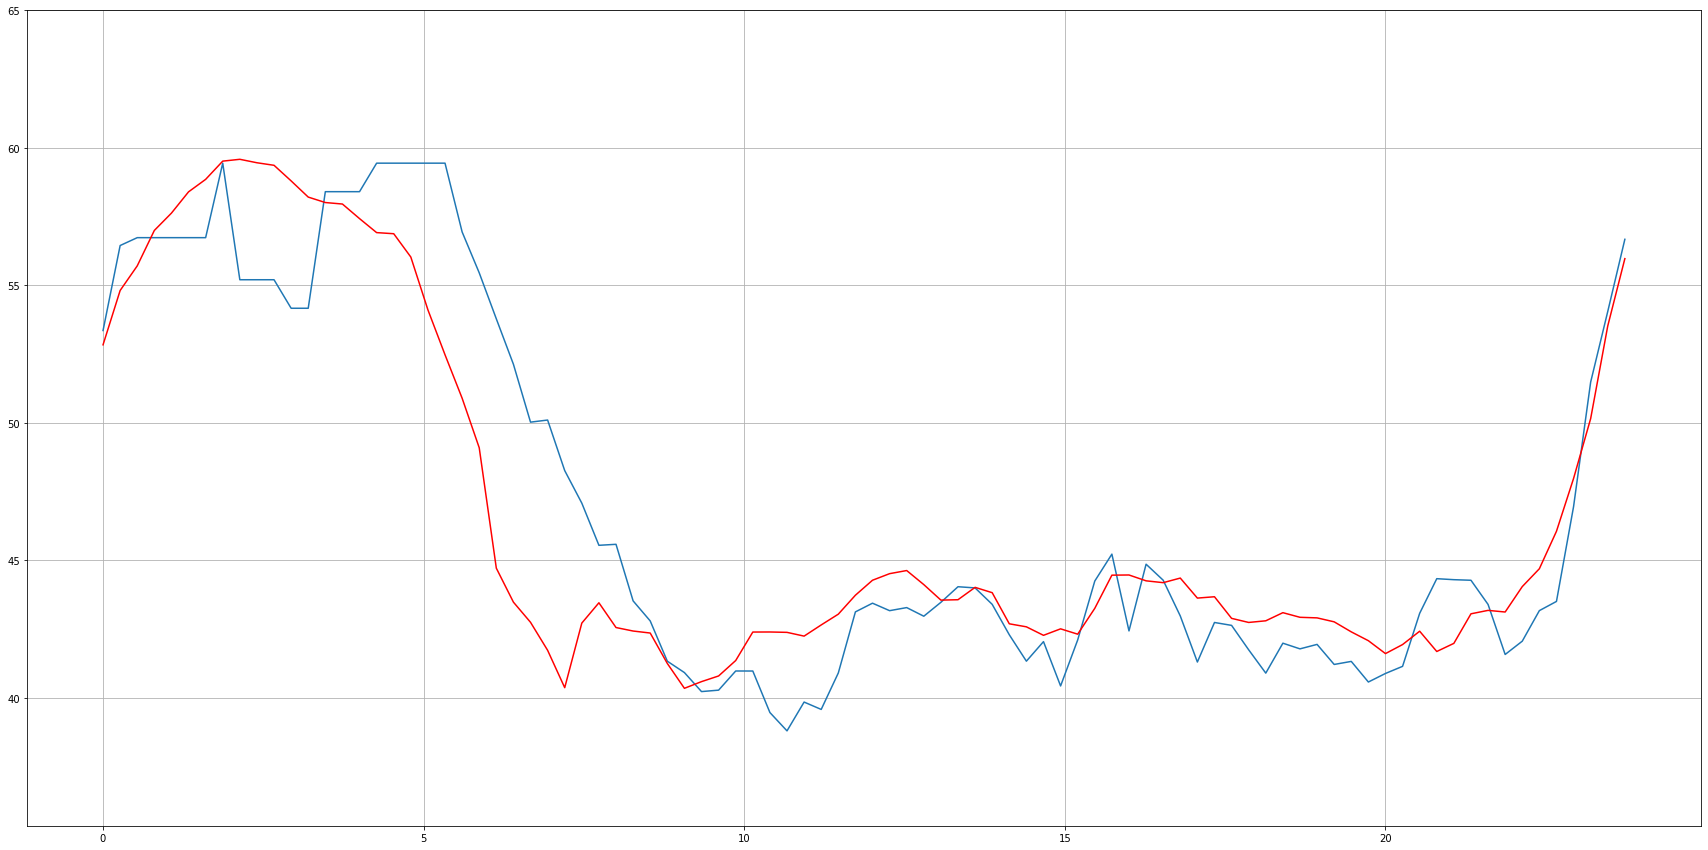

<Figure size 2160x1080 with 0 Axes>

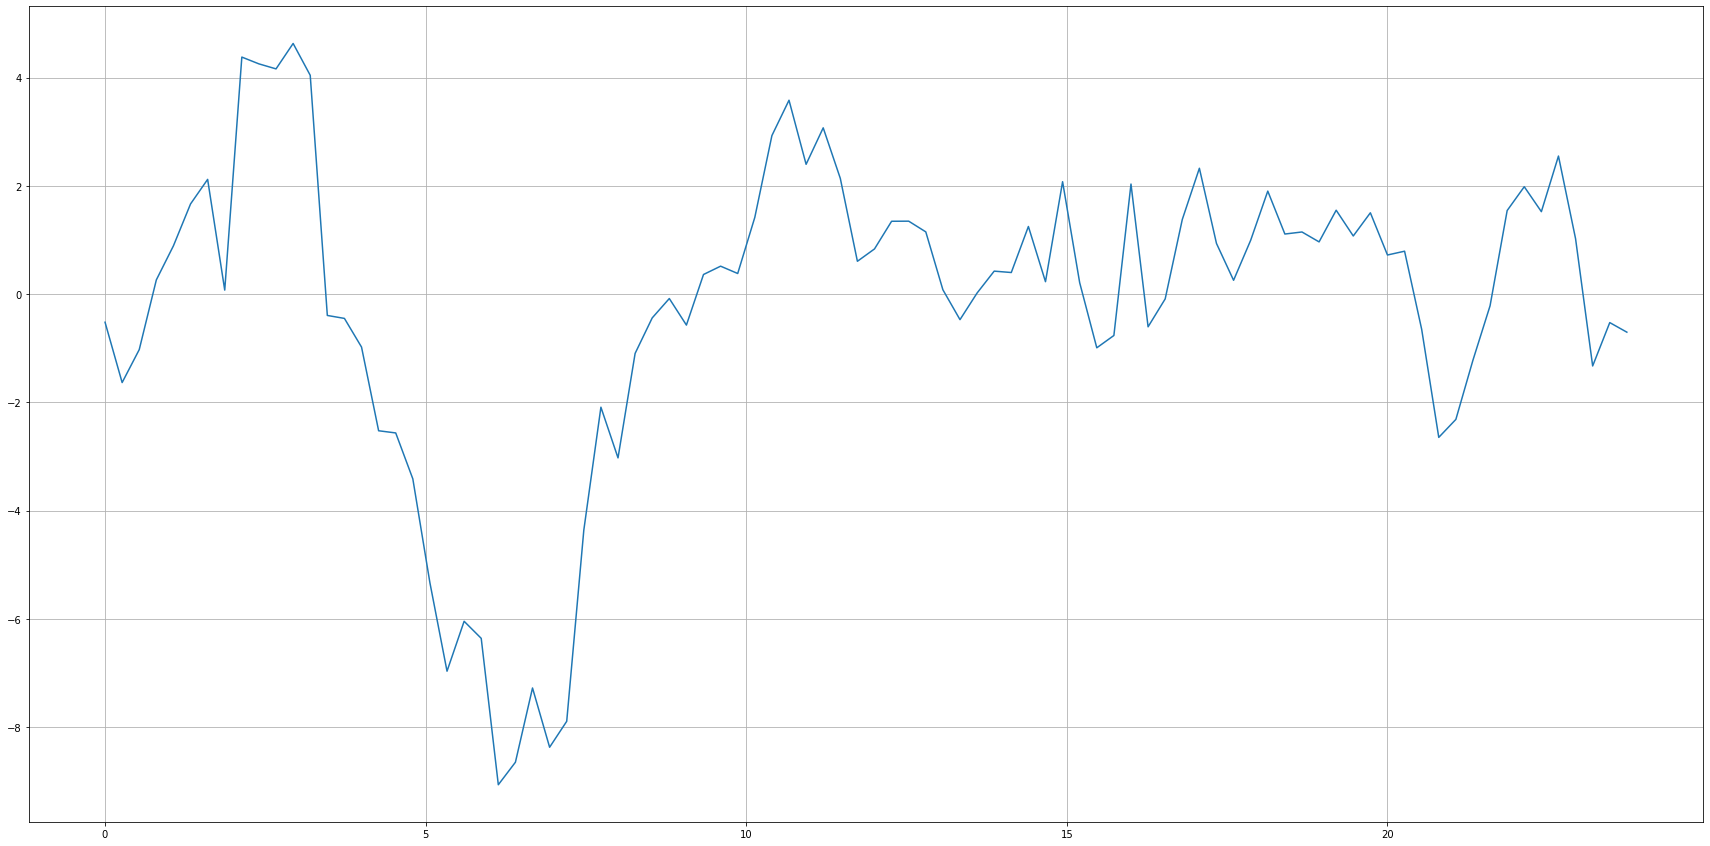

<Figure size 2160x1080 with 0 Axes>

mean squared error=  8.667081674804388
RMSE=  2.943990773559657
time taken:  0:10:46.800218


In [47]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0,6/7,3,(2, 0, 1) ,(2, 1, 1, periodicity), 0))#16T

started = 2023-06-24 22:37:36.742362
parameters: (11, 0, 1)
seasonal parameters: (1, 1, 1, 90)
training data:  538
training days:  5.977777777777778
start training
start predicting
test:  90
predictions:  90
predicted days:  1.0


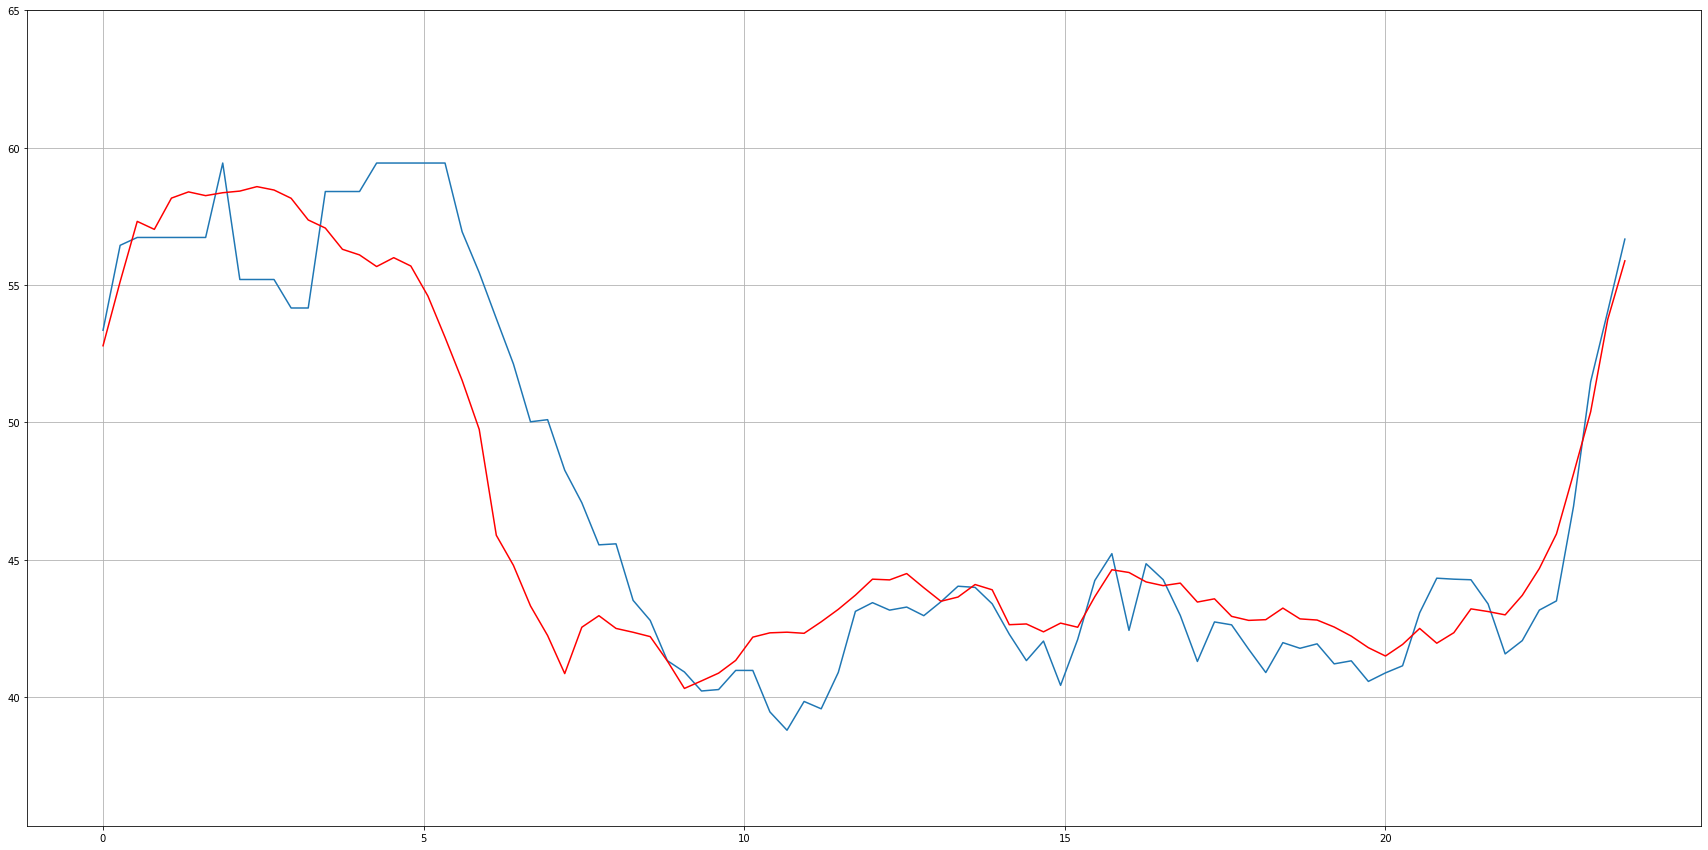

<Figure size 2160x1080 with 0 Axes>

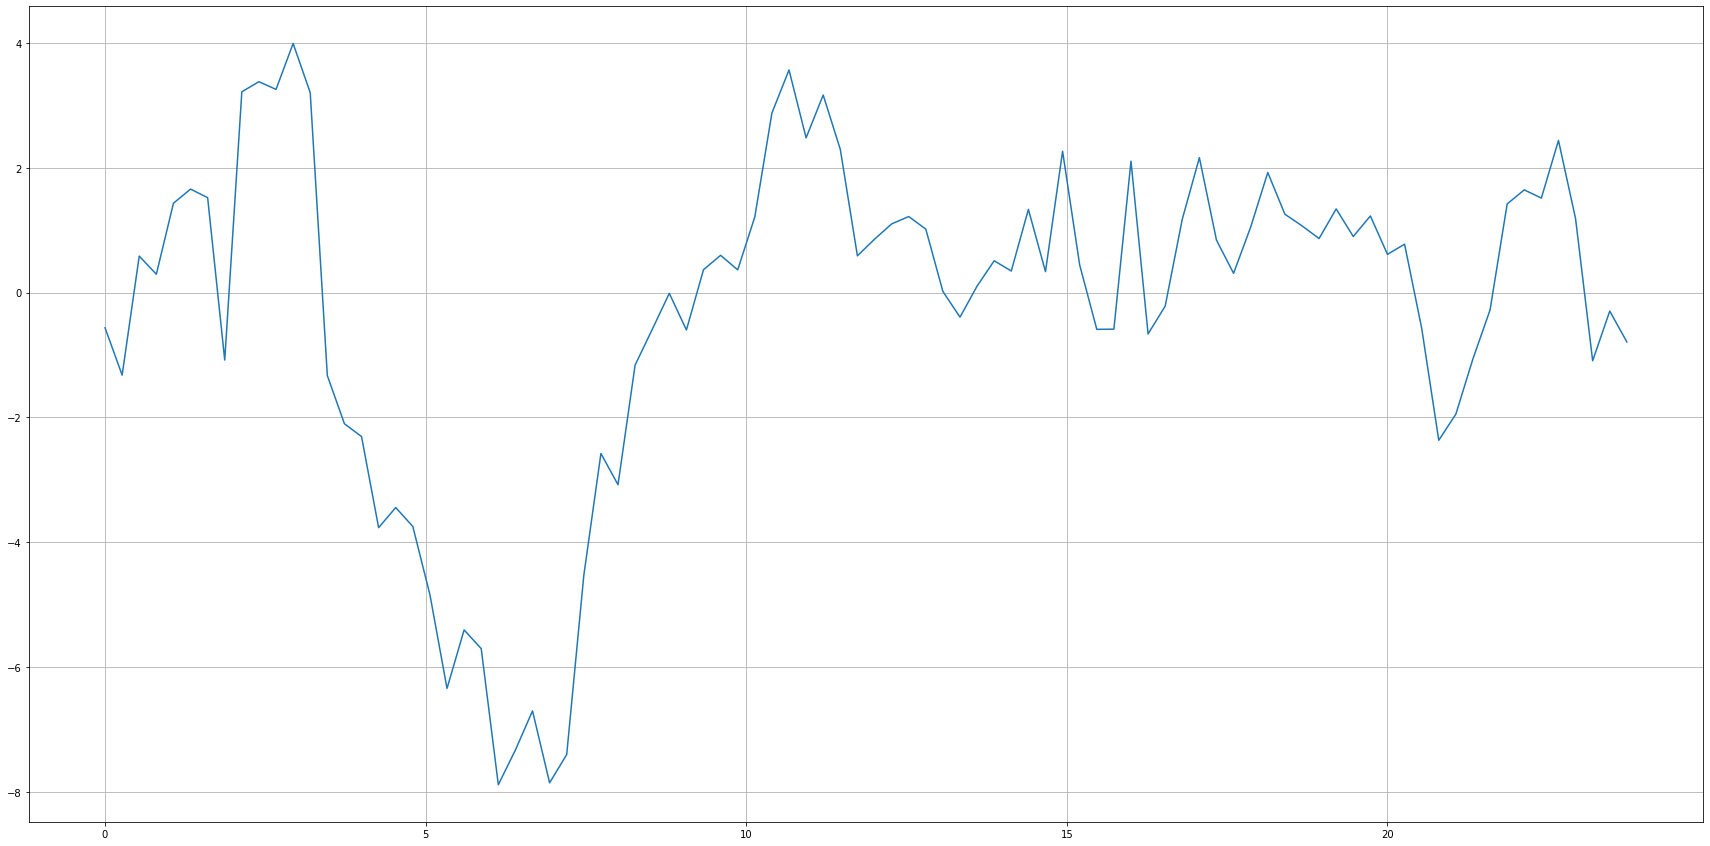

<Figure size 2160x1080 with 0 Axes>

mean squared error=  7.477337939849897
RMSE=  2.734472150132434
time taken:  0:07:20.930327


In [49]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0,6/7,3,(11, 0, 1) ,(1, 1, 1, periodicity), 0))#16T

started = 2023-06-24 22:48:54.629374
parameters: (0, 0, 1)
seasonal parameters: (0, 1, 1, 90)
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


start predicting
test:  90
predictions:  90
predicted days:  1.0


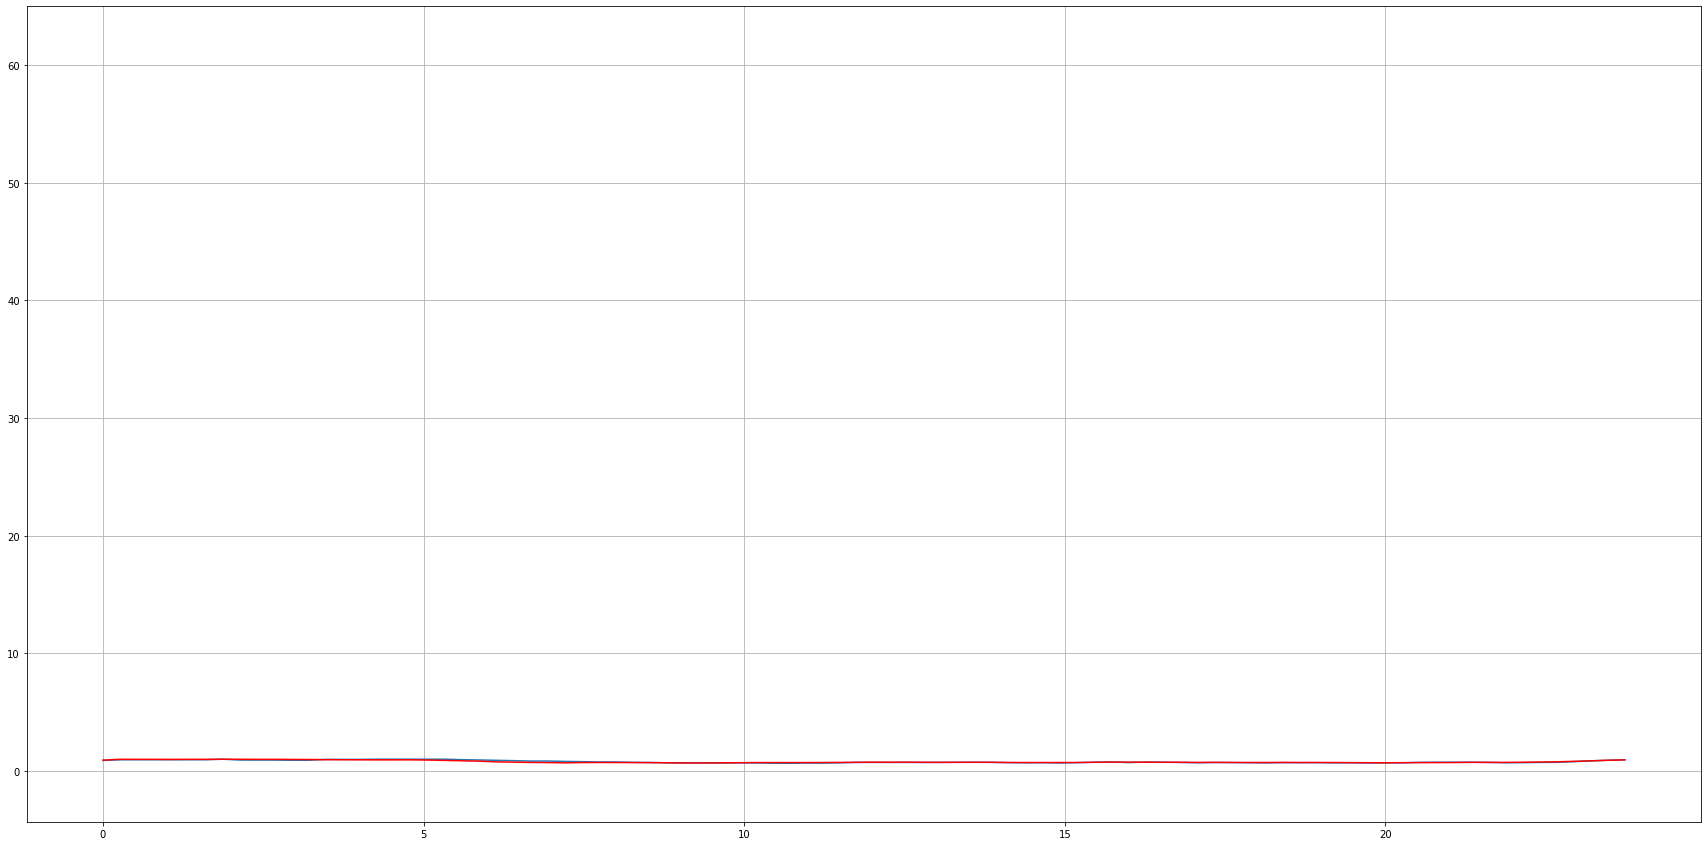

<Figure size 2160x1080 with 0 Axes>

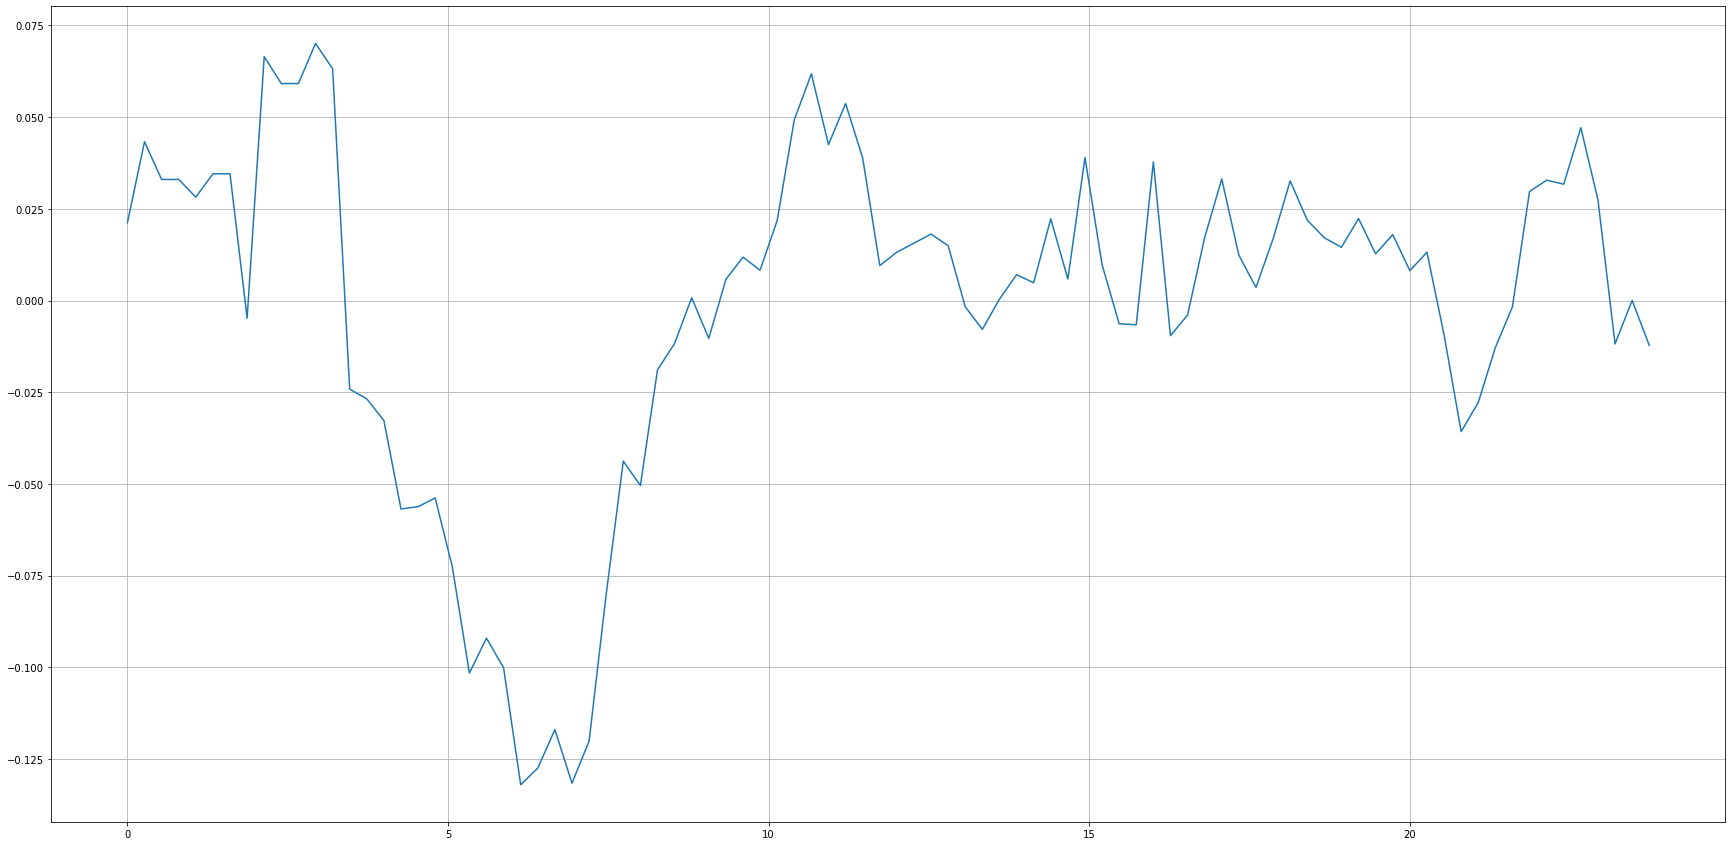

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.002179434382398807
RMSE=  0.04668441262775839
time taken:  0:01:07.258999


In [54]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(0, 0, 1) ,(0, 1, 1, periodicity), 0))#16T

started = 2023-06-24 22:54:23.754417
parameters: (0, 0, 1)
seasonal parameters: (0, 1, 1, 90)
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


start predicting
test:  90
predictions:  90
predicted days:  1.0


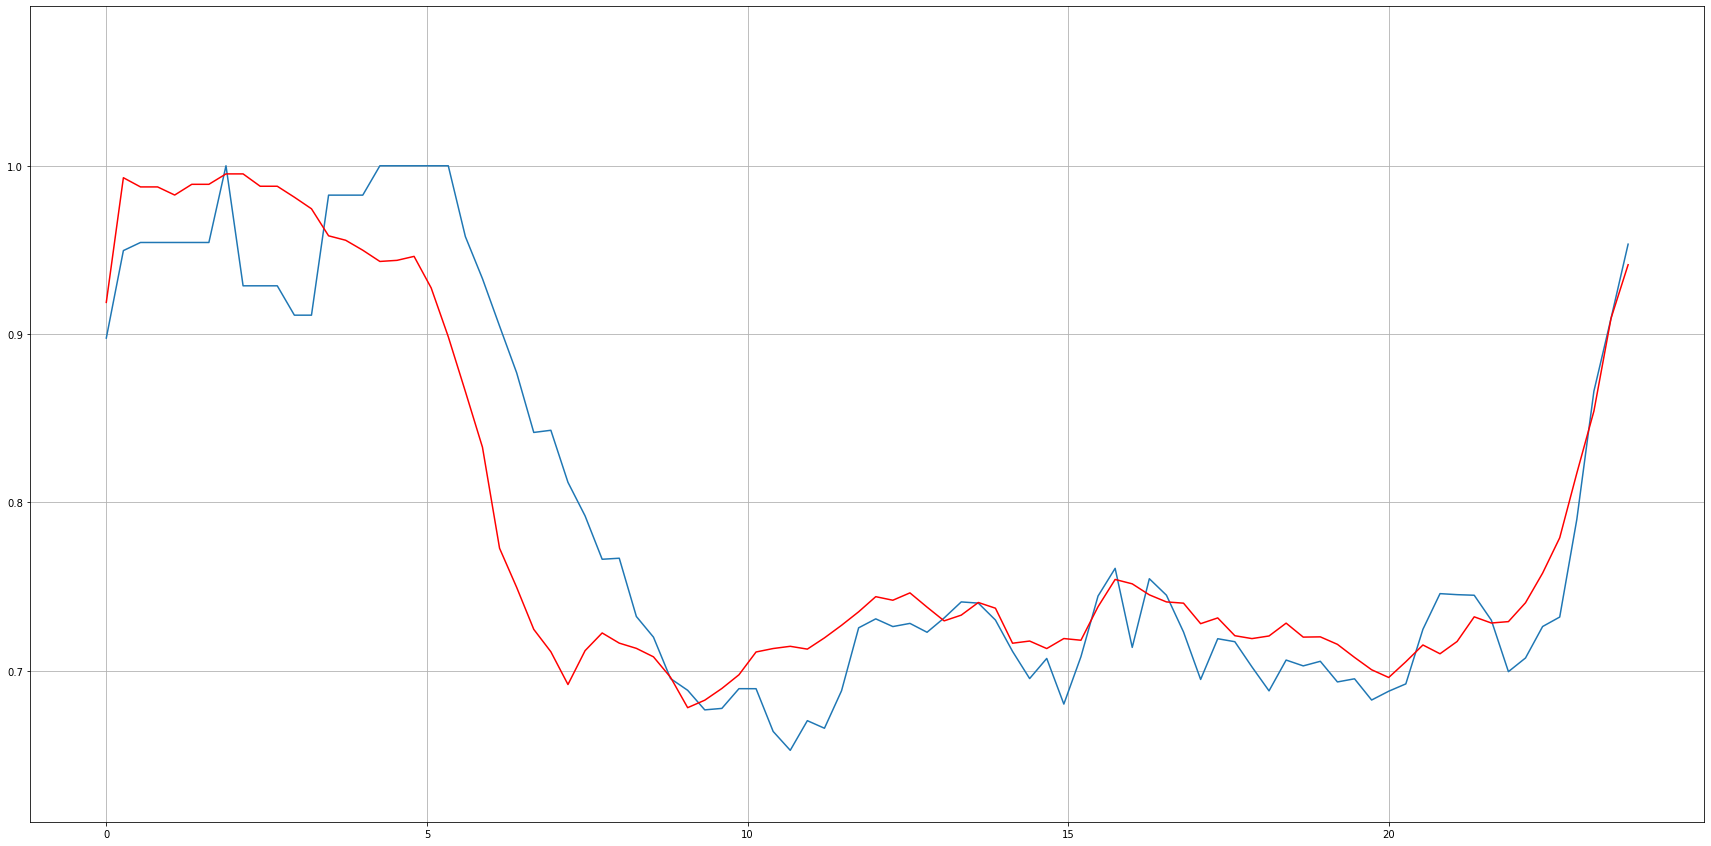

<Figure size 2160x1080 with 0 Axes>

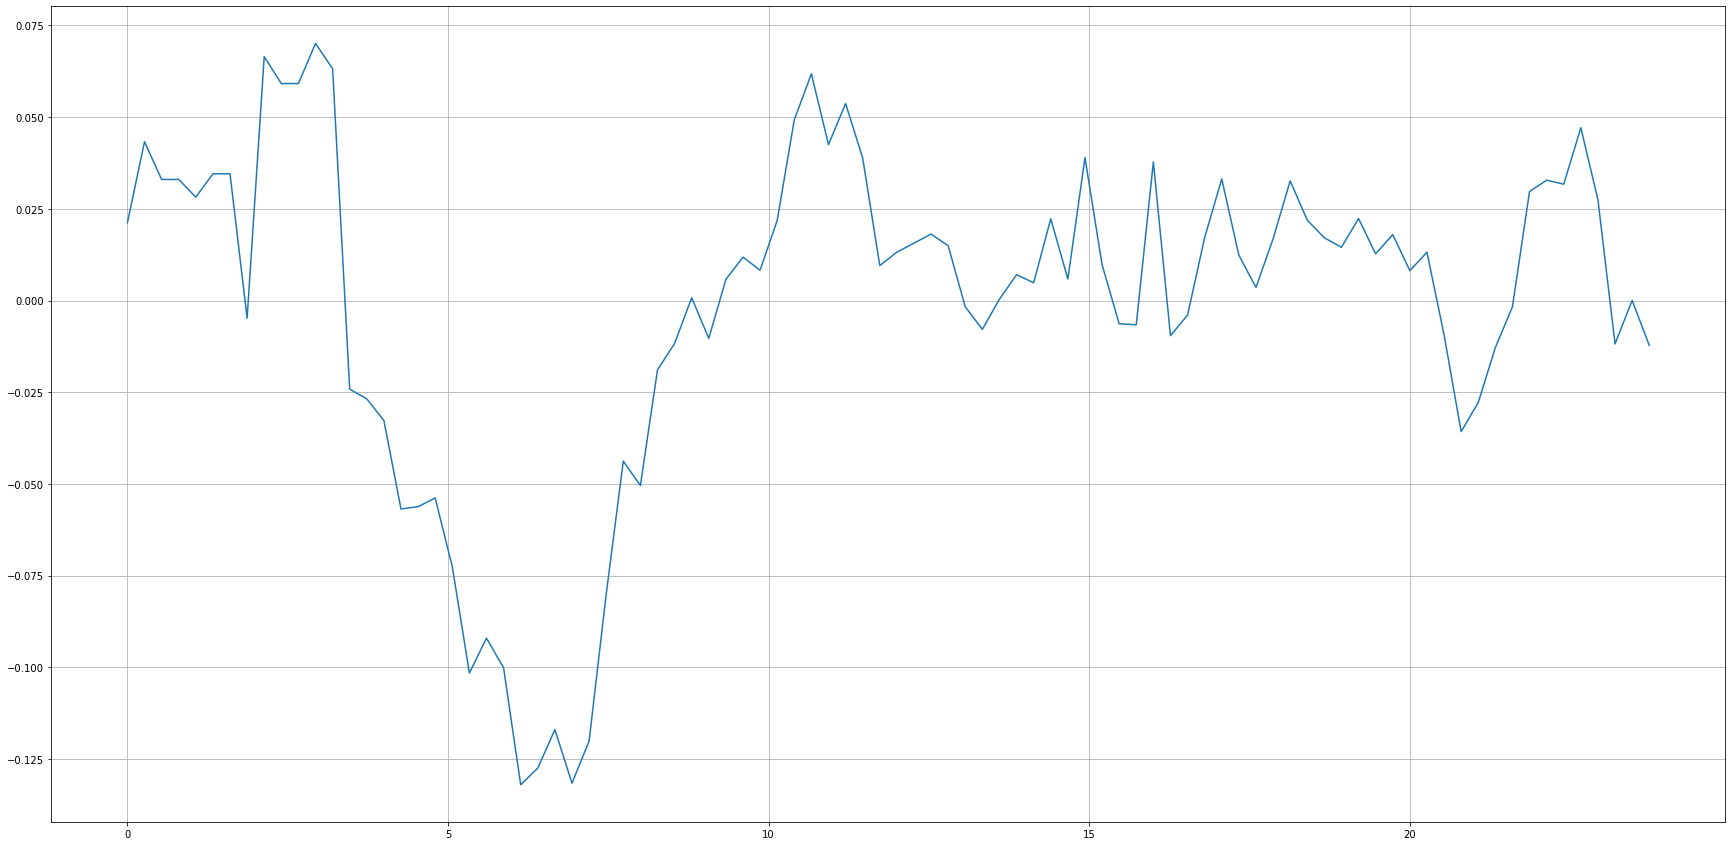

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.002179434382398807
RMSE=  0.04668441262775839
time taken:  0:01:03.109297


In [58]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(0, 0, 1) ,(0, 1, 1, periodicity), 0))#16T

started = 2023-06-24 22:56:09.678946
parameters: (8, 0, 1)
seasonal parameters: (1, 1, 1, 90)
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  90
predictions:  90
predicted days:  1.0


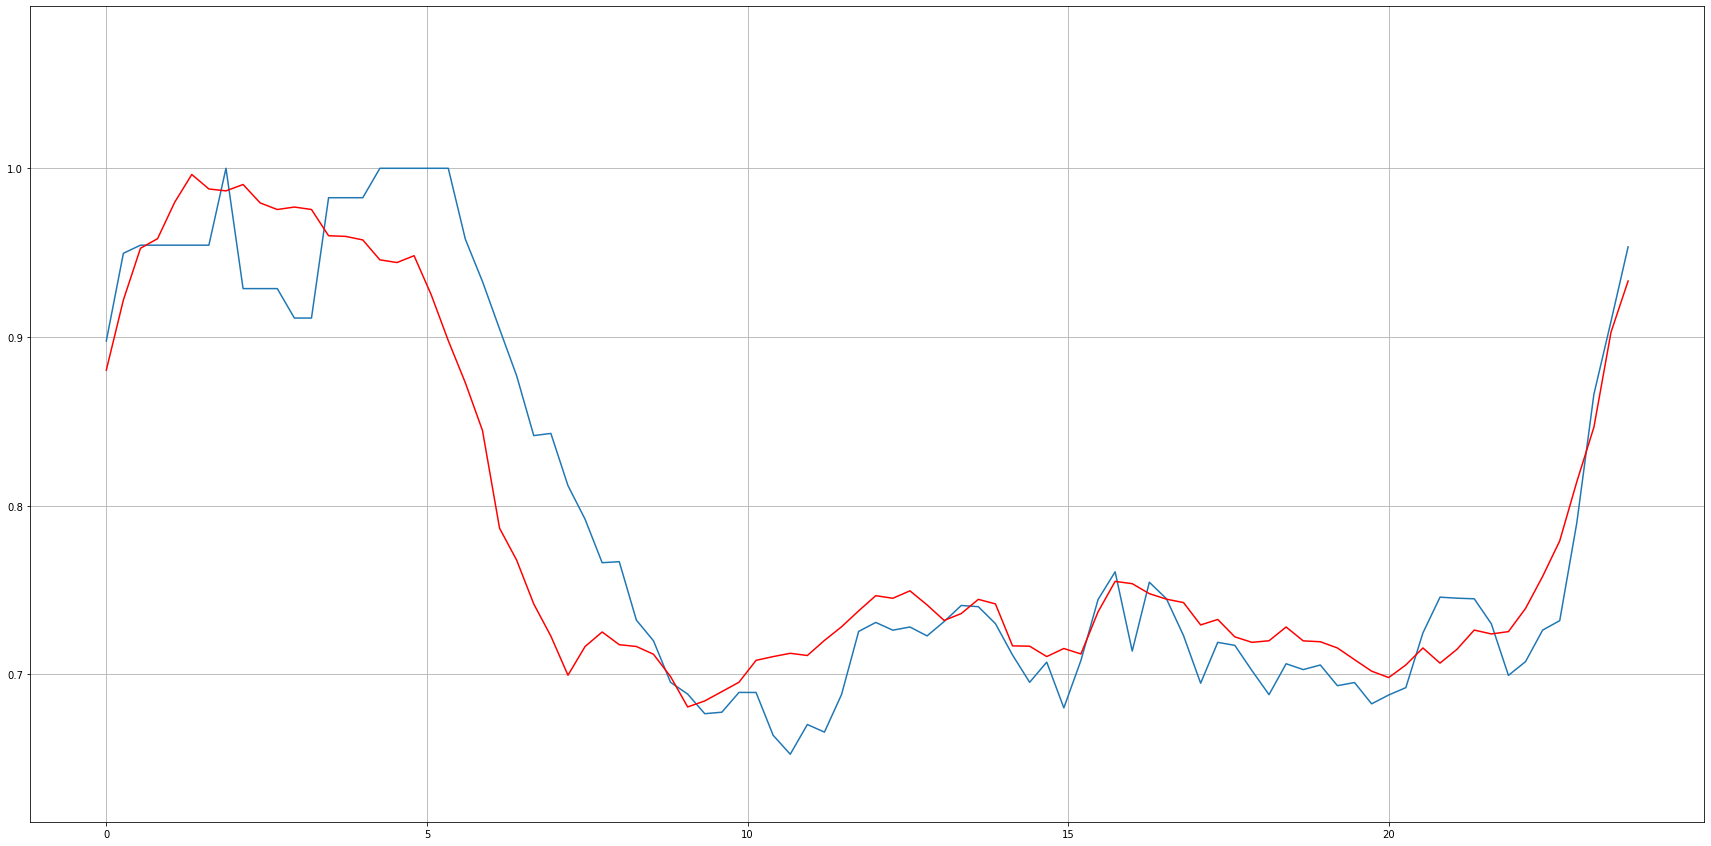

<Figure size 2160x1080 with 0 Axes>

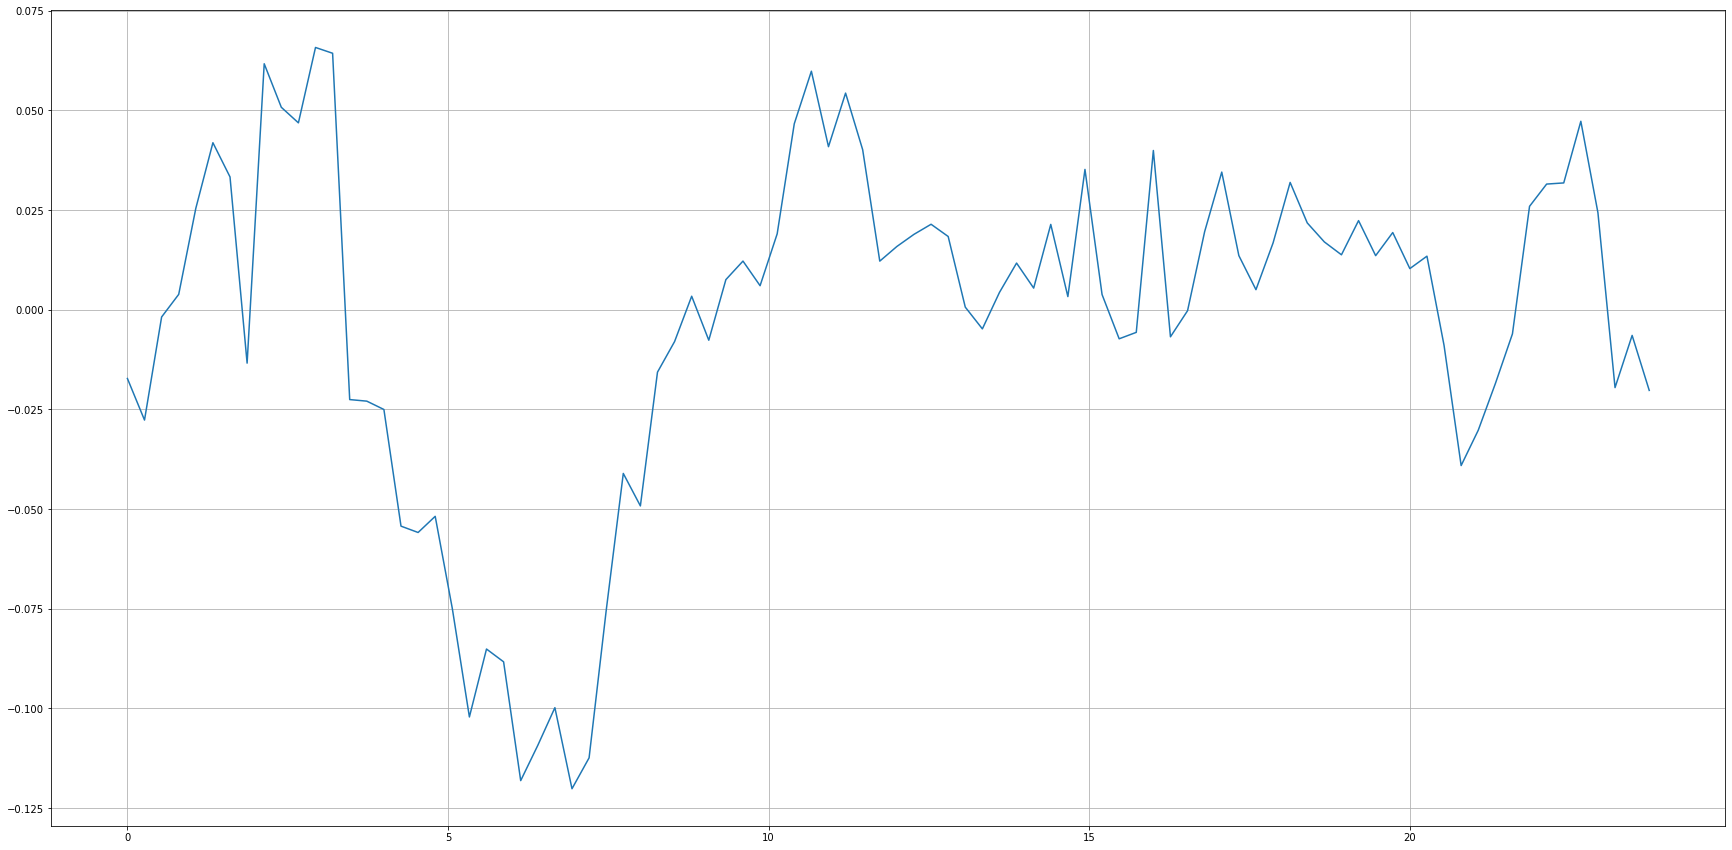

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0018761683037574735
RMSE=  0.043314758498200975
time taken:  0:06:45.862859


In [59]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(8, 0, 1) ,(1, 1, 1, periodicity), 0))#16T

started = 2023-06-24 23:02:55.576780
parameters: (8, 0, 1)
seasonal parameters: (2, 1, 1, 90)
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


start predicting
test:  90
predictions:  90
predicted days:  1.0


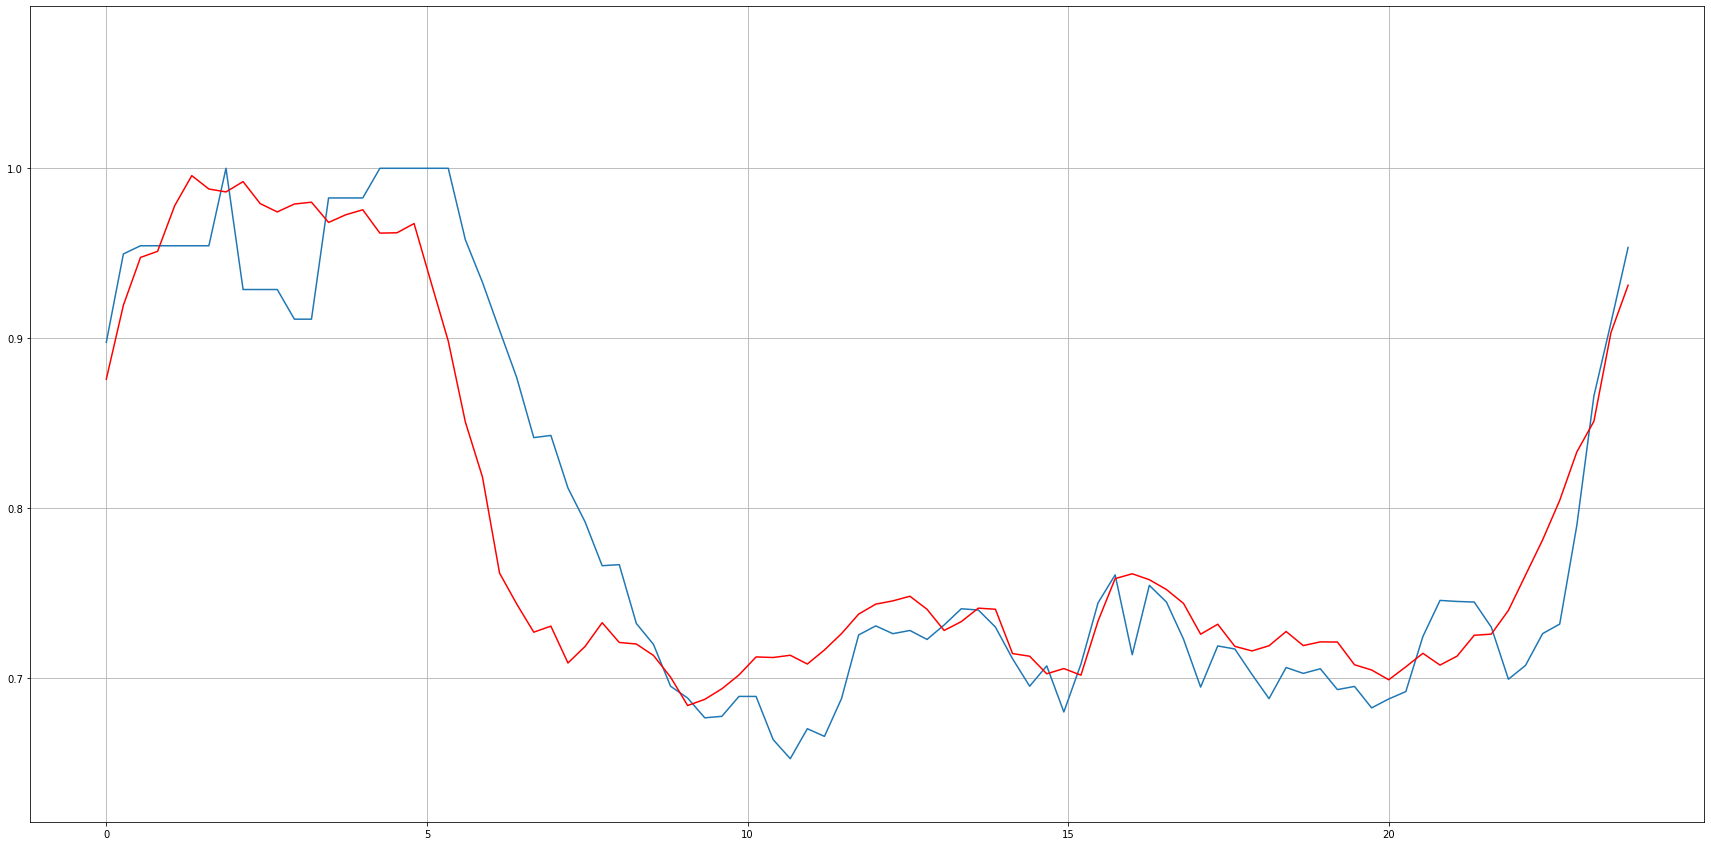

<Figure size 2160x1080 with 0 Axes>

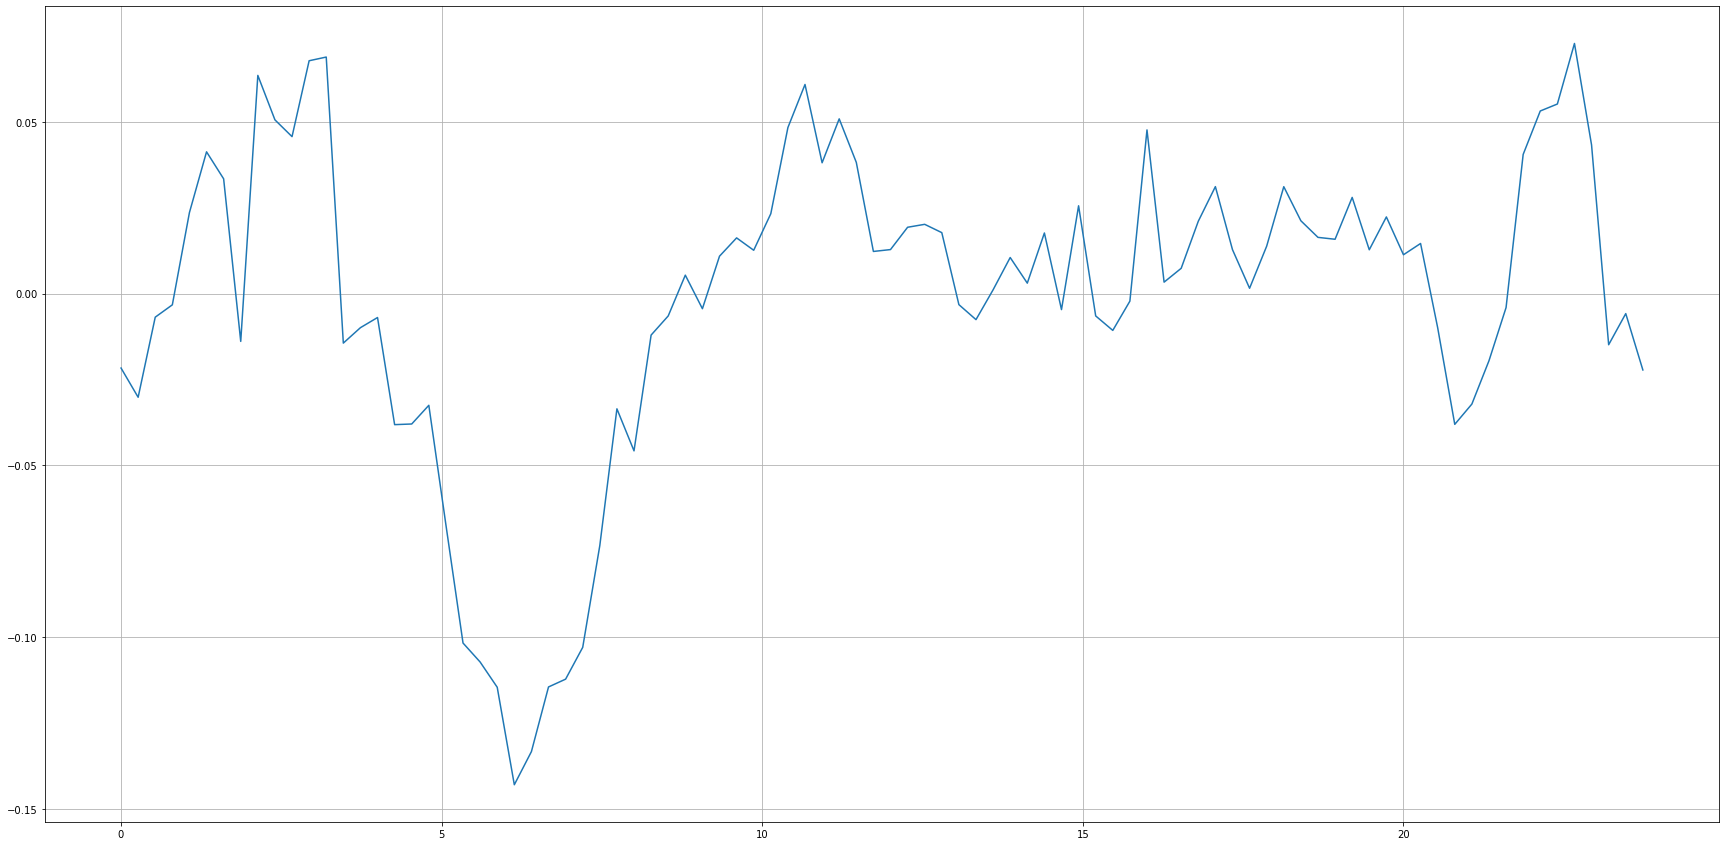

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.00212903483533435
RMSE=  0.046141465465829645
time taken:  0:17:20.623253


In [60]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(8, 0, 1) ,(2, 1, 1, periodicity), 0))#16T

In [61]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(8, 0, 1) ,(3, 1, 1, periodicity), 0))#16T

started = 2023-06-24 23:20:16.227033
parameters: (8, 0, 1)
seasonal parameters: (3, 1, 1, 90)
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


KeyboardInterrupt: 

<Figure size 2160x1080 with 0 Axes>

In [ ]:
#PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(8, 0, 1) ,(4, 1, 1, periodicity), 0))#16T

In [82]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(8, 0, 1) ,(2, 1, 1, periodicity), 0,method='statespace',low_memory=False,cov_type='none'))#16T

started = 2023-06-25 00:05:23.757200
parameters: (8, 0, 1)
seasonal parameters: (2, 1, 1, 90)
method:  statespace
low memory:  False
cov type:  none
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


KeyboardInterrupt: 

<Figure size 2160x1080 with 0 Axes>

In [88]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df_normalized_e0,14/15,3,(8, 0, 1) ,(2, 1, 1, periodicity), 0,method='innovations_mle',low_memory=False,cov_type='none'))#16T

started = 2023-06-25 00:10:37.548697
parameters: (8, 0, 1)
seasonal parameters: (2, 1, 1, 90)
method:  innovations_mle
low memory:  False
cov type:  none
training data:  1260
training days:  14.0
testing data:  90
testing days:  1.0
start training


KeyboardInterrupt: 

<Figure size 2160x1080 with 0 Axes>

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(8, 0, 1) ,(2, 1, 1, periodicity), 0,method='innovations_mle',low_memory=False,cov_type='none'))#16T

started = 2023-06-25 00:01:45.604912
parameters: (8, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  innovations_mle
low memory:  False
cov type:  none
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py:374: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


start predicting
test:  90
predictions:  90
predicted days:  1.0


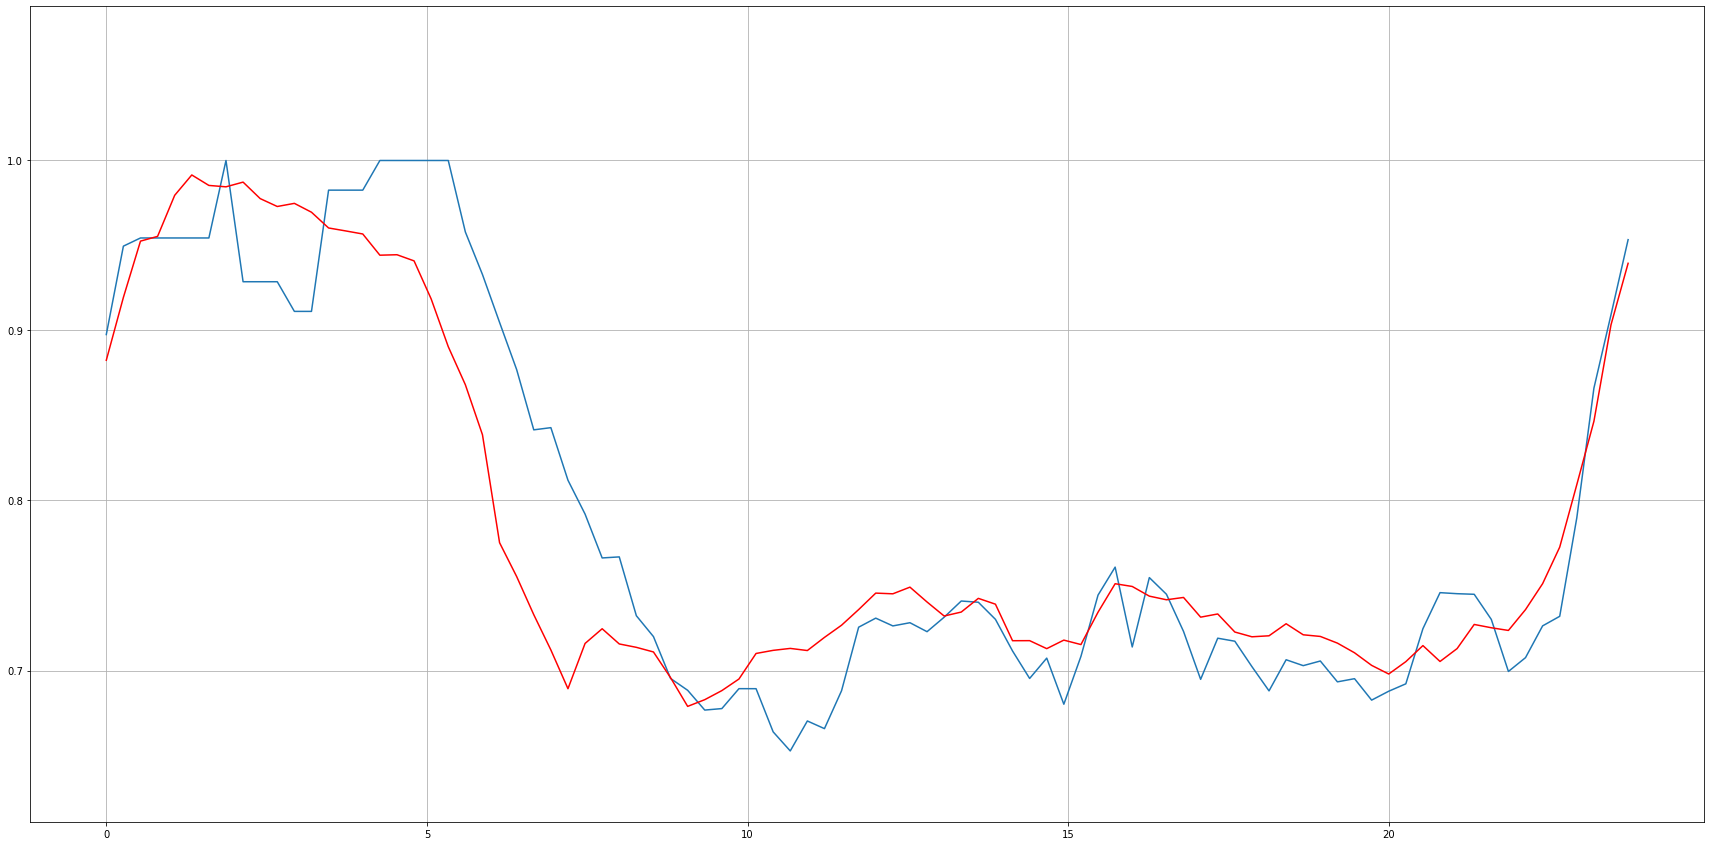

<Figure size 2160x1080 with 0 Axes>

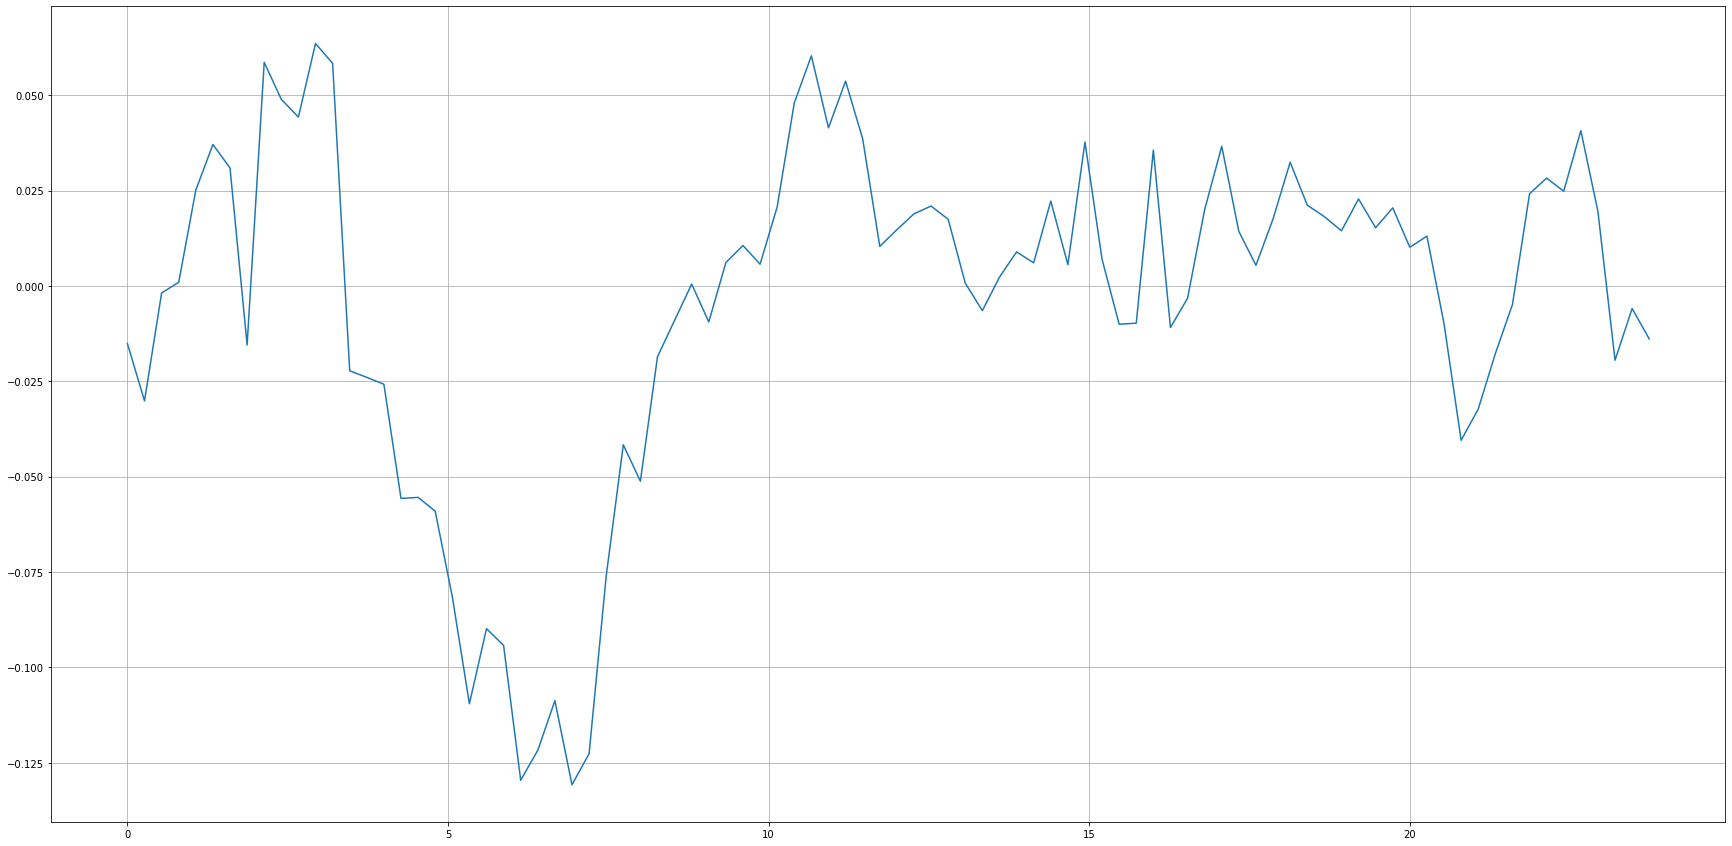

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.002045549558948397
RMSE=  0.04522775208816371
time taken:  0:01:26.302437


In [79]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(8, 0, 1) ,(1, 1, 1, periodicity), 0,method='innovations_mle',low_memory=False,cov_type='none'))#16T

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0),method='statespace',low_memory=False,cov_type='none')#16T

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0),method='statespace',low_memory=True,cov_type='approx')#16T

started = 2023-06-24 23:51:54.121143
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  innovations_mle
low memory:  True
cov type:  approx
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py:374: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


start predicting
test:  90
predictions:  90
predicted days:  1.0


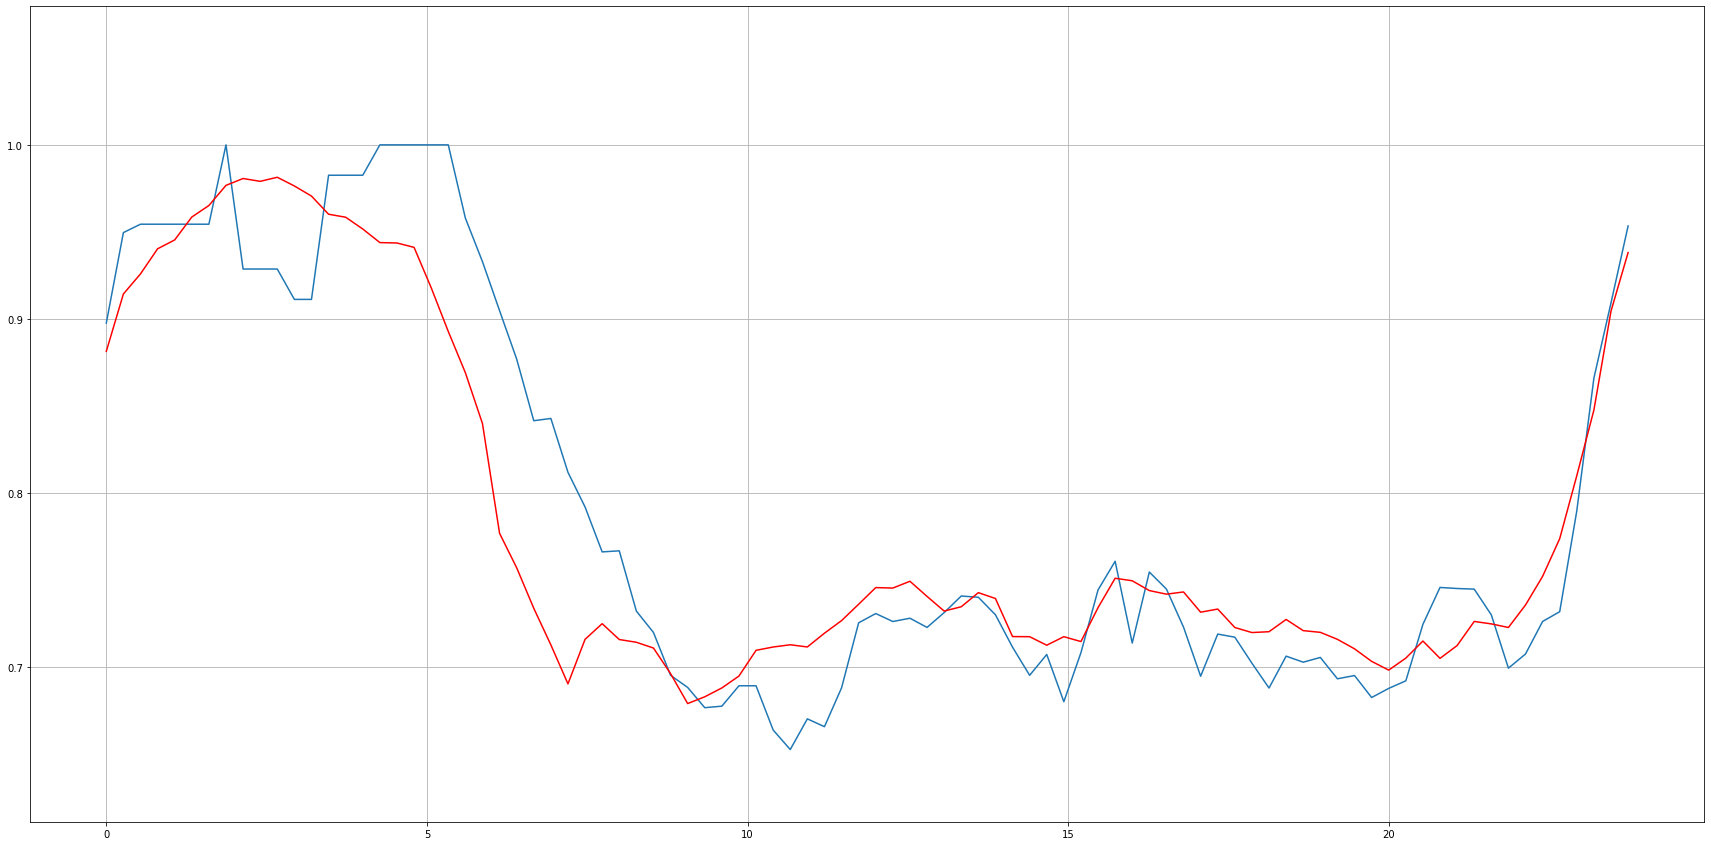

<Figure size 2160x1080 with 0 Axes>

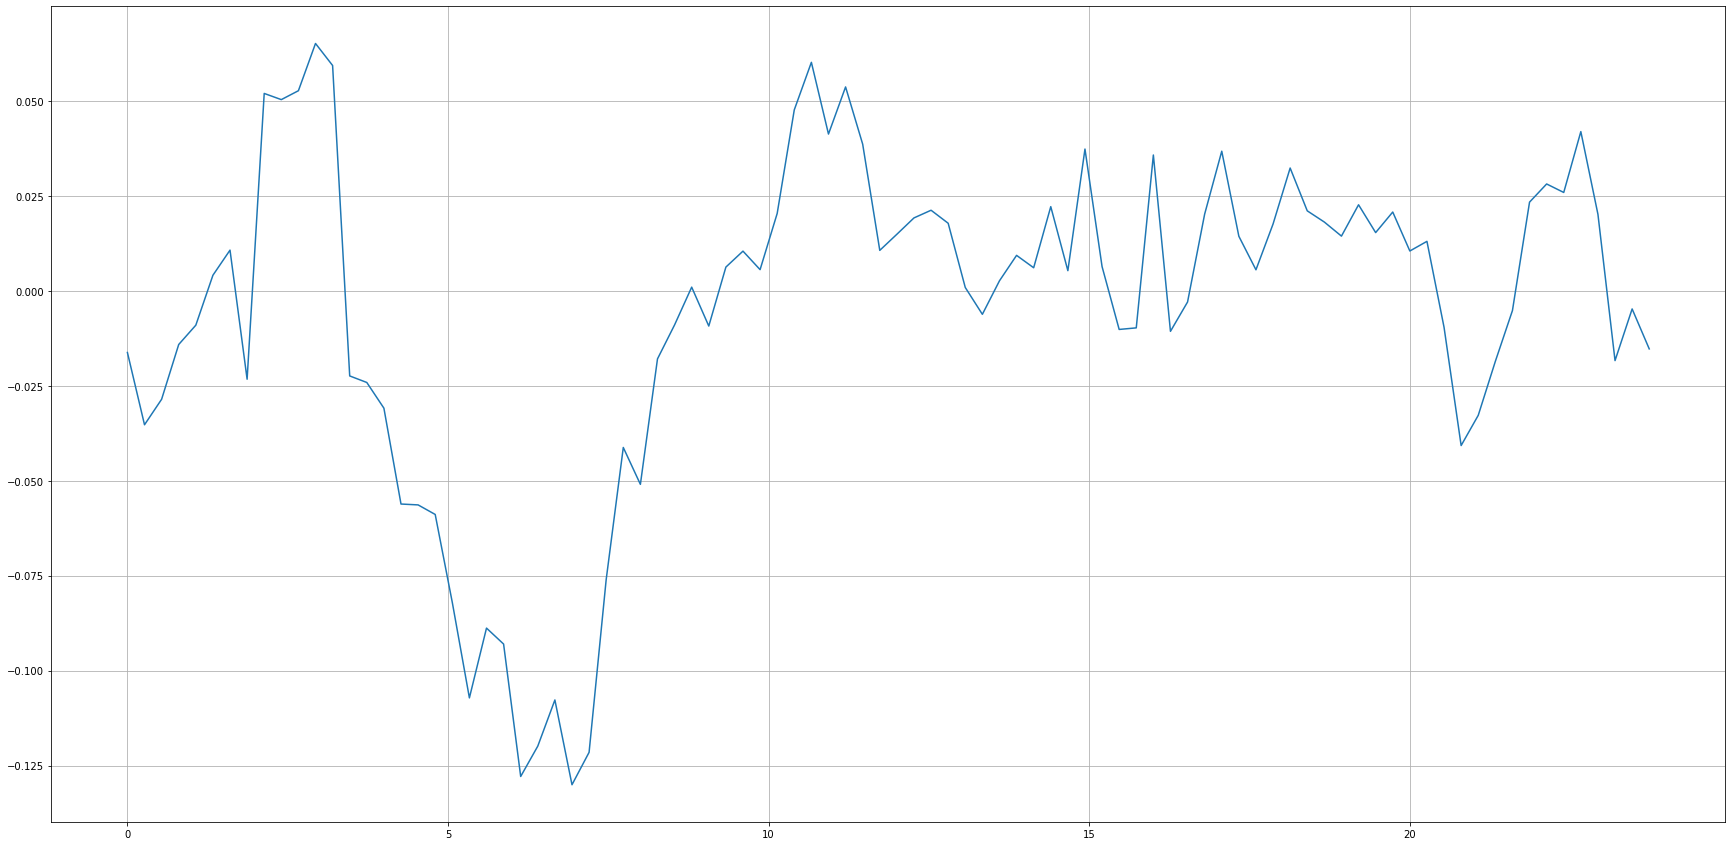

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0020193686983741967
RMSE=  0.044937386421266164
time taken:  0:00:59.843701


In [71]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='innovations_mle',low_memory=True,cov_type='approx'))#16T

In [100]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='statespace',low_memory=True,cov_type='none'))#16T

started = 2023-06-25 00:38:08.145704
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0


TypeError: __init__() got an unexpected keyword argument 'mle_regression'

<Figure size 2160x1080 with 0 Axes>

started = 2023-06-25 00:31:32.110902
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  none
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training
start predicting
test:  90
predictions:  90
predicted days:  1.0


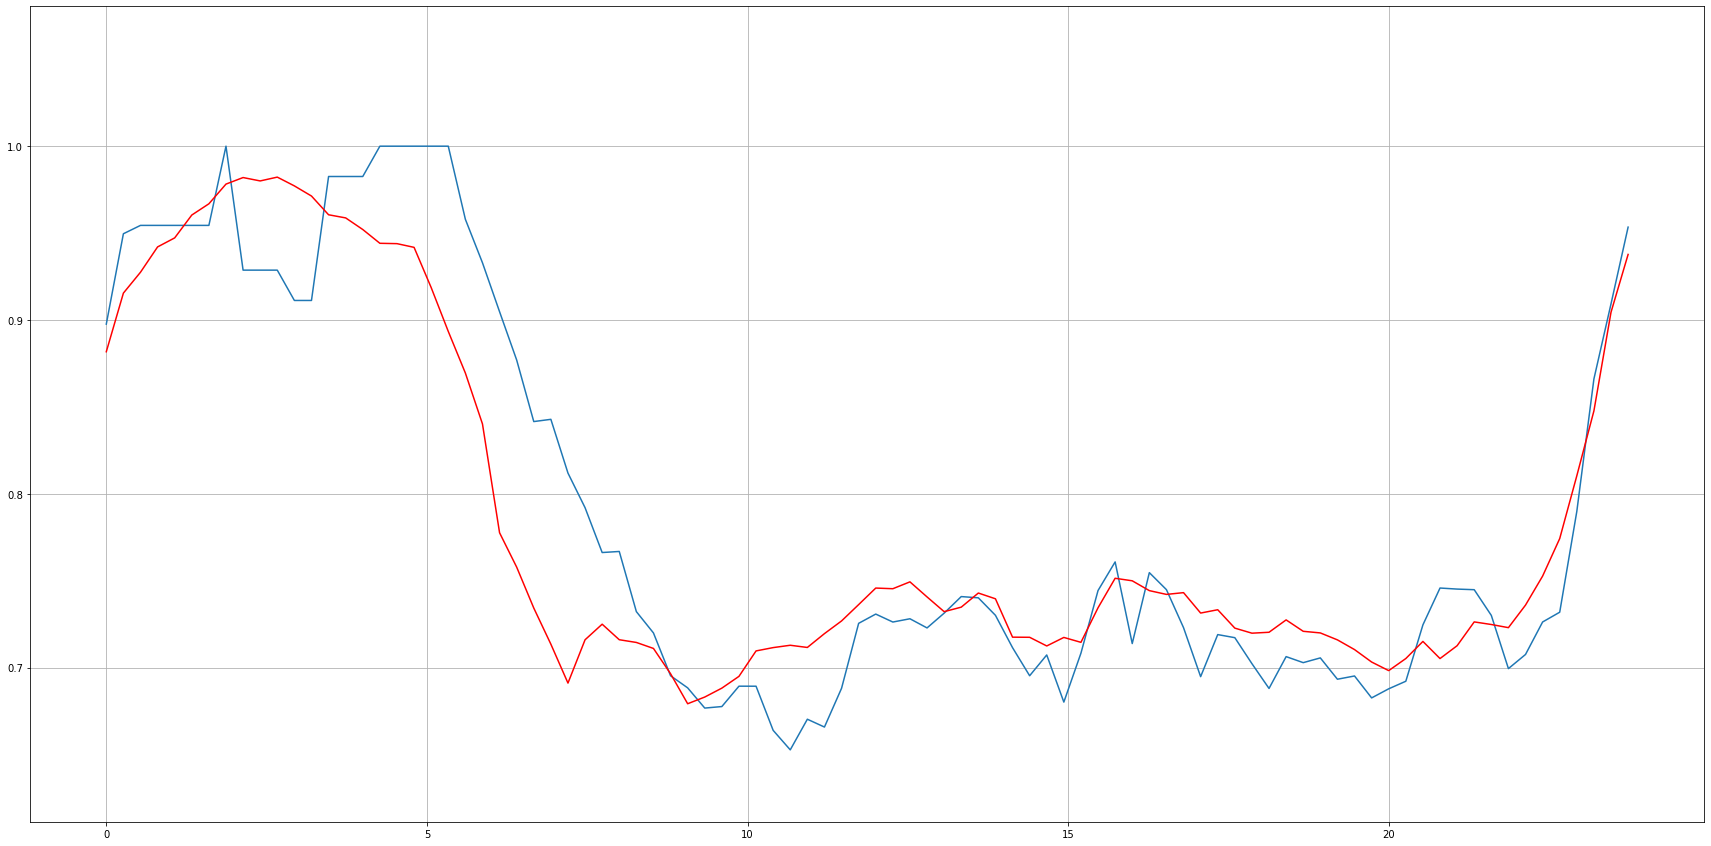

<Figure size 2160x1080 with 0 Axes>

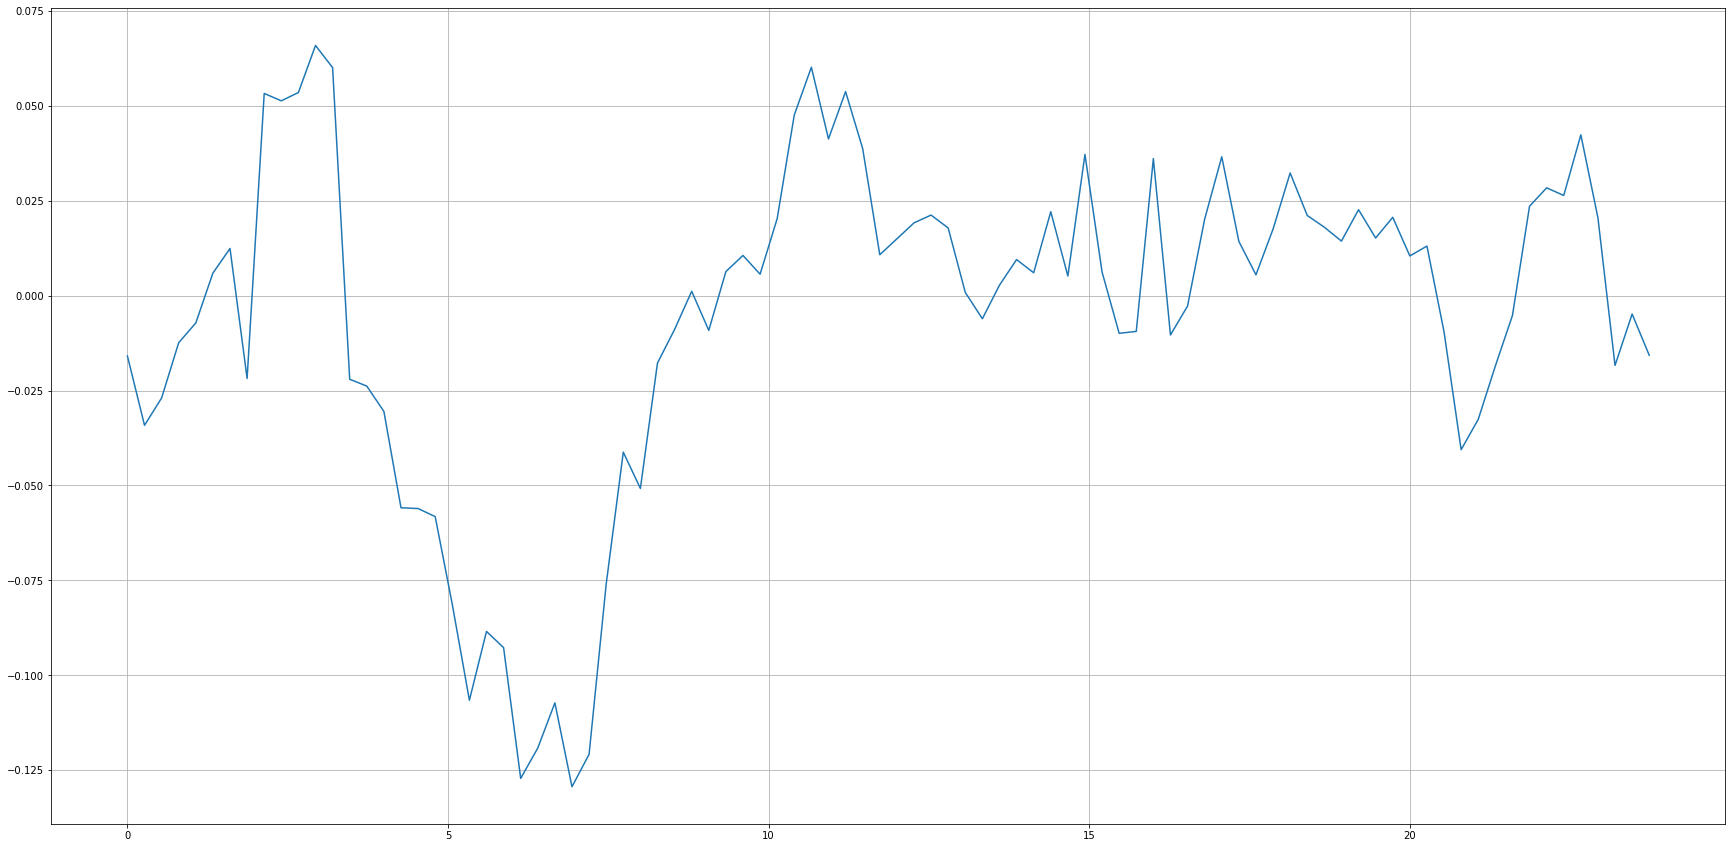

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0020073361612378375
RMSE=  0.044803305249030874
time taken:  0:03:35.036115


In [98]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='statespace',low_memory=True,cov_type='none'))#16T

In [97]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='statespace',low_memory=True,cov_type='approx'))#16T

started = 2023-06-25 00:27:48.233185
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  approx
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


KeyboardInterrupt: 

<Figure size 2160x1080 with 0 Axes>

started = 2023-06-25 00:23:40.704636
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  innovations_mle
low memory:  True
cov type:  approx
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training
start predicting
test:  90
predictions:  90
predicted days:  1.0


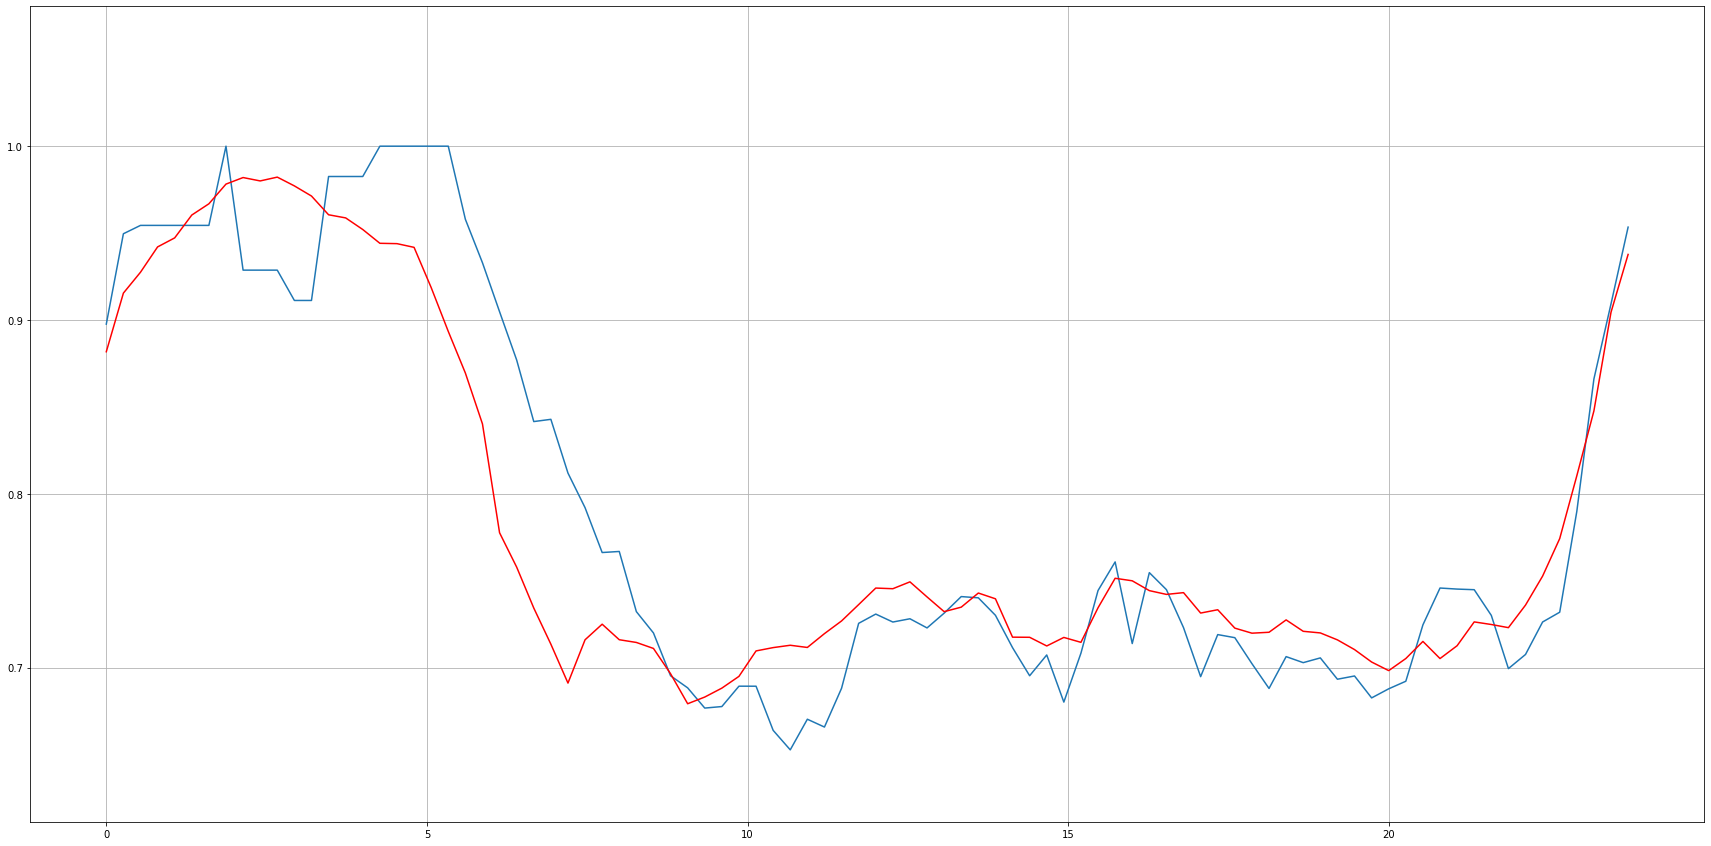

<Figure size 2160x1080 with 0 Axes>

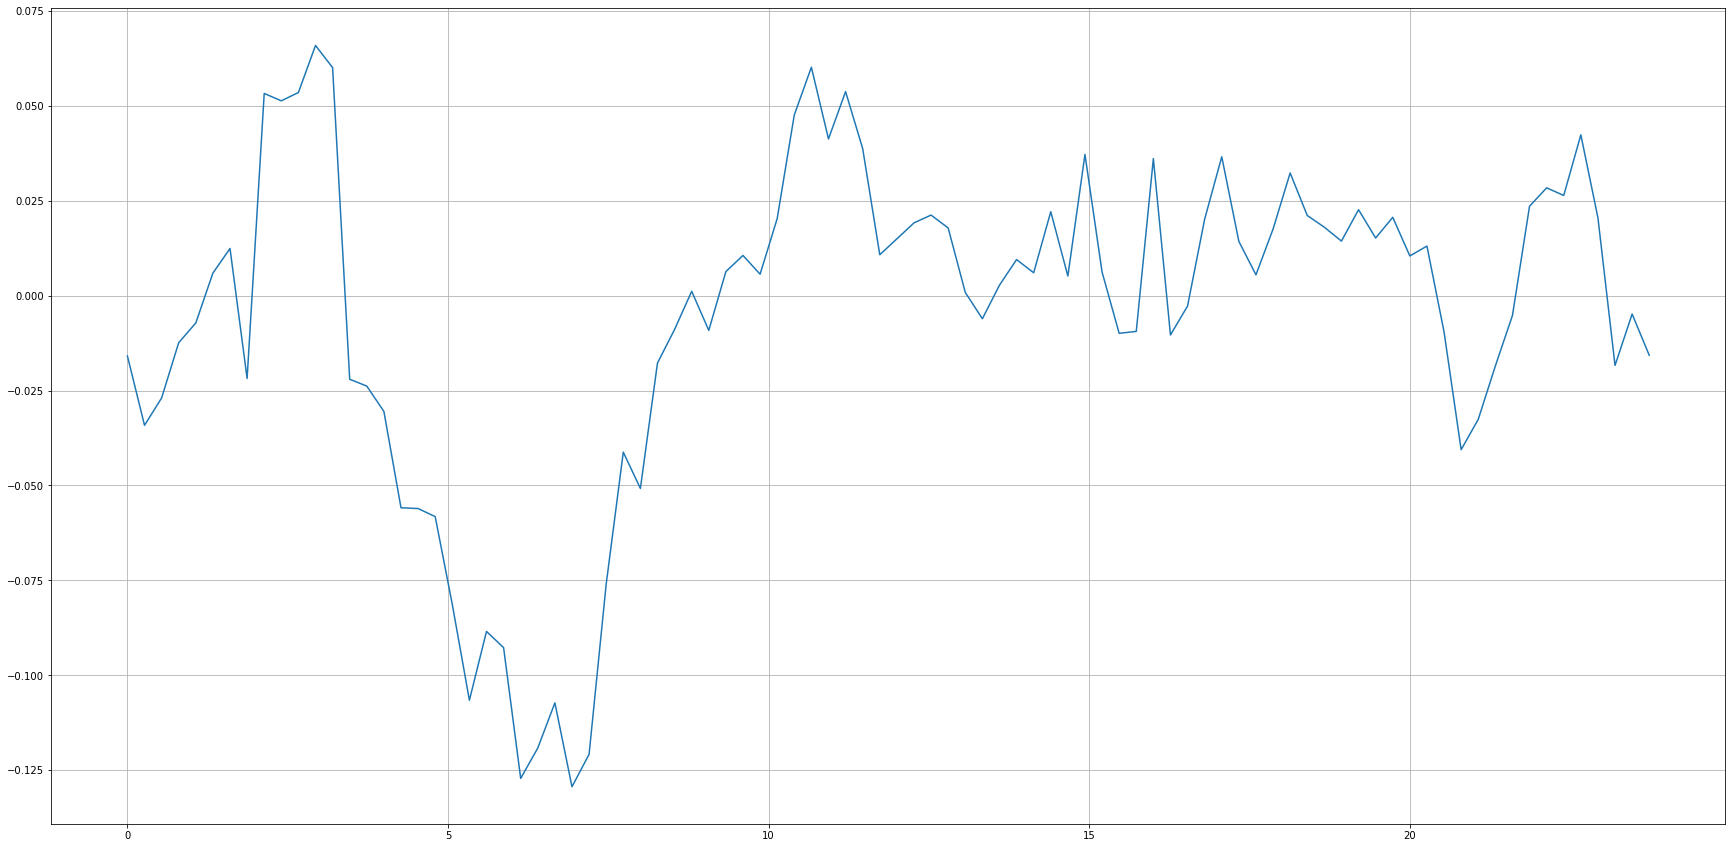

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0020073361612378375
RMSE=  0.044803305249030874
time taken:  0:03:16.832548


In [95]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='innovations_mle',low_memory=True,cov_type='approx'))#16T

started = 2023-06-25 00:16:07.507456
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  innovations_mle
low memory:  True
cov type:  approx
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training
start predicting
test:  90
predictions:  90
predicted days:  1.0


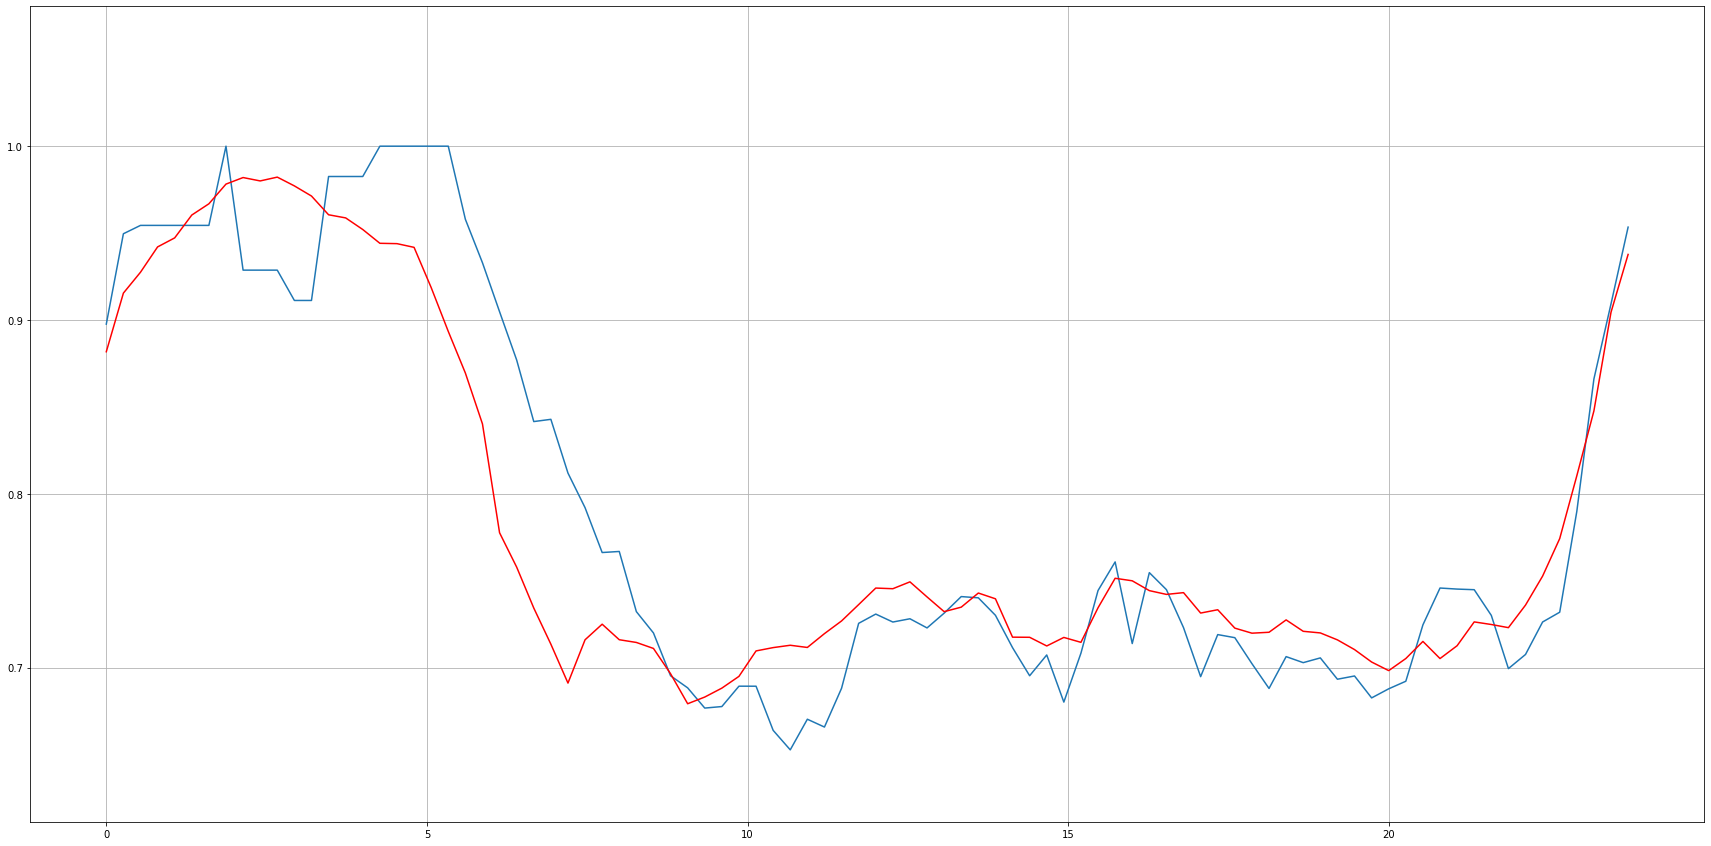

<Figure size 2160x1080 with 0 Axes>

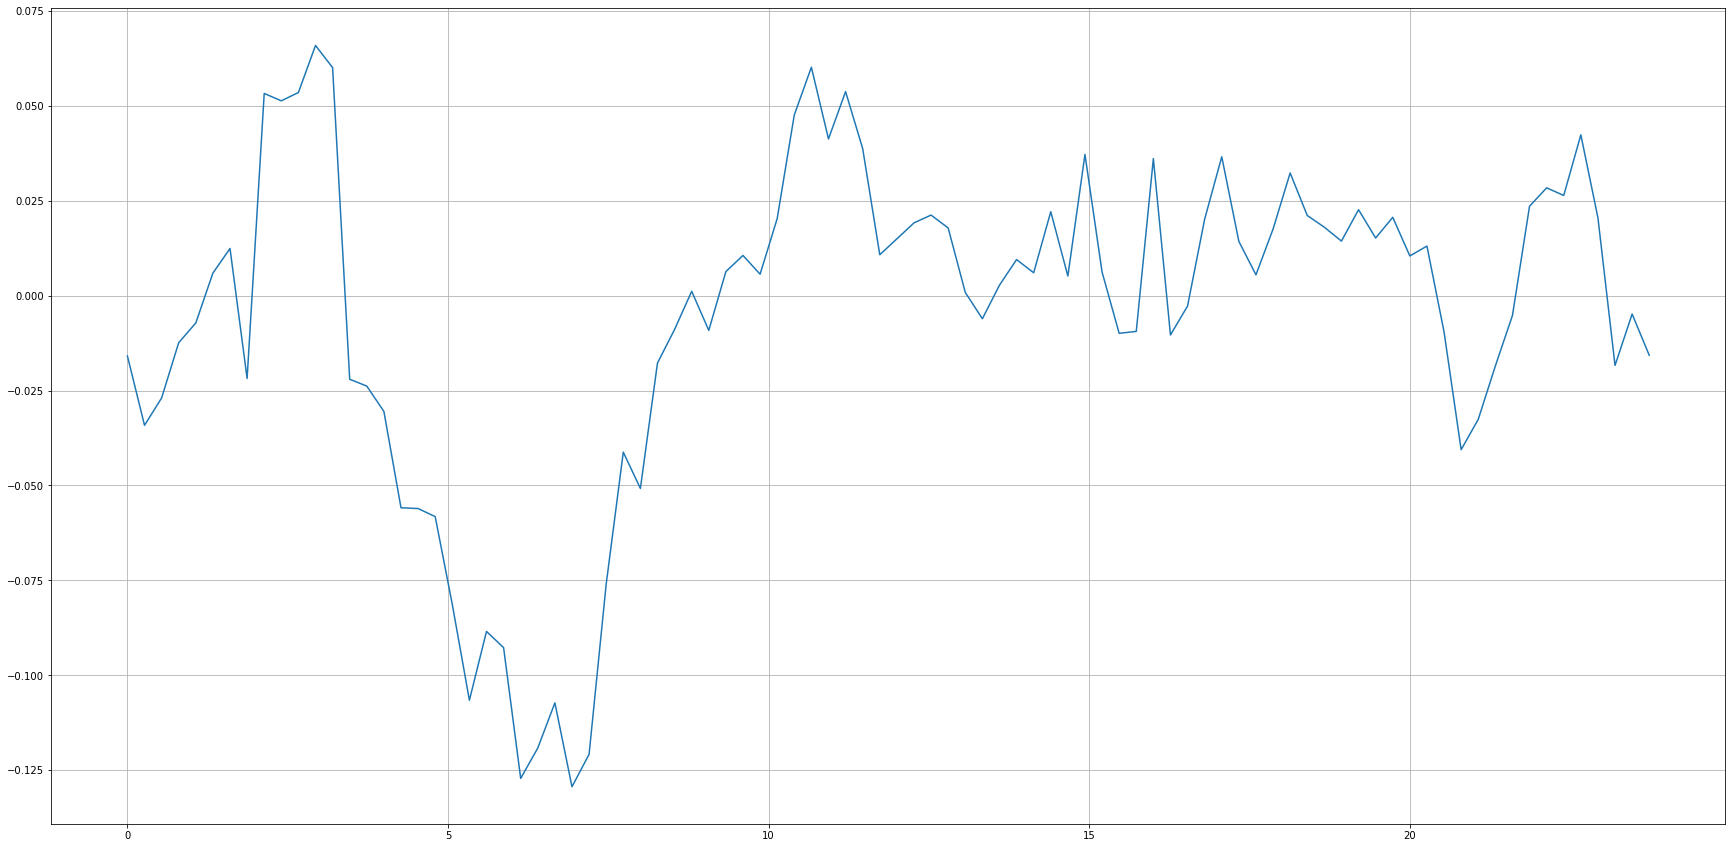

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0020073361612378375
RMSE=  0.044803305249030874
time taken:  0:03:36.802714


In [93]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='innovations_mle',low_memory=True,cov_type='approx'))#16T

started = 2023-06-24 23:52:53.992844
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  statespace
low memory:  True
cov type:  approx
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training
start predicting
test:  90
predictions:  90
predicted days:  1.0


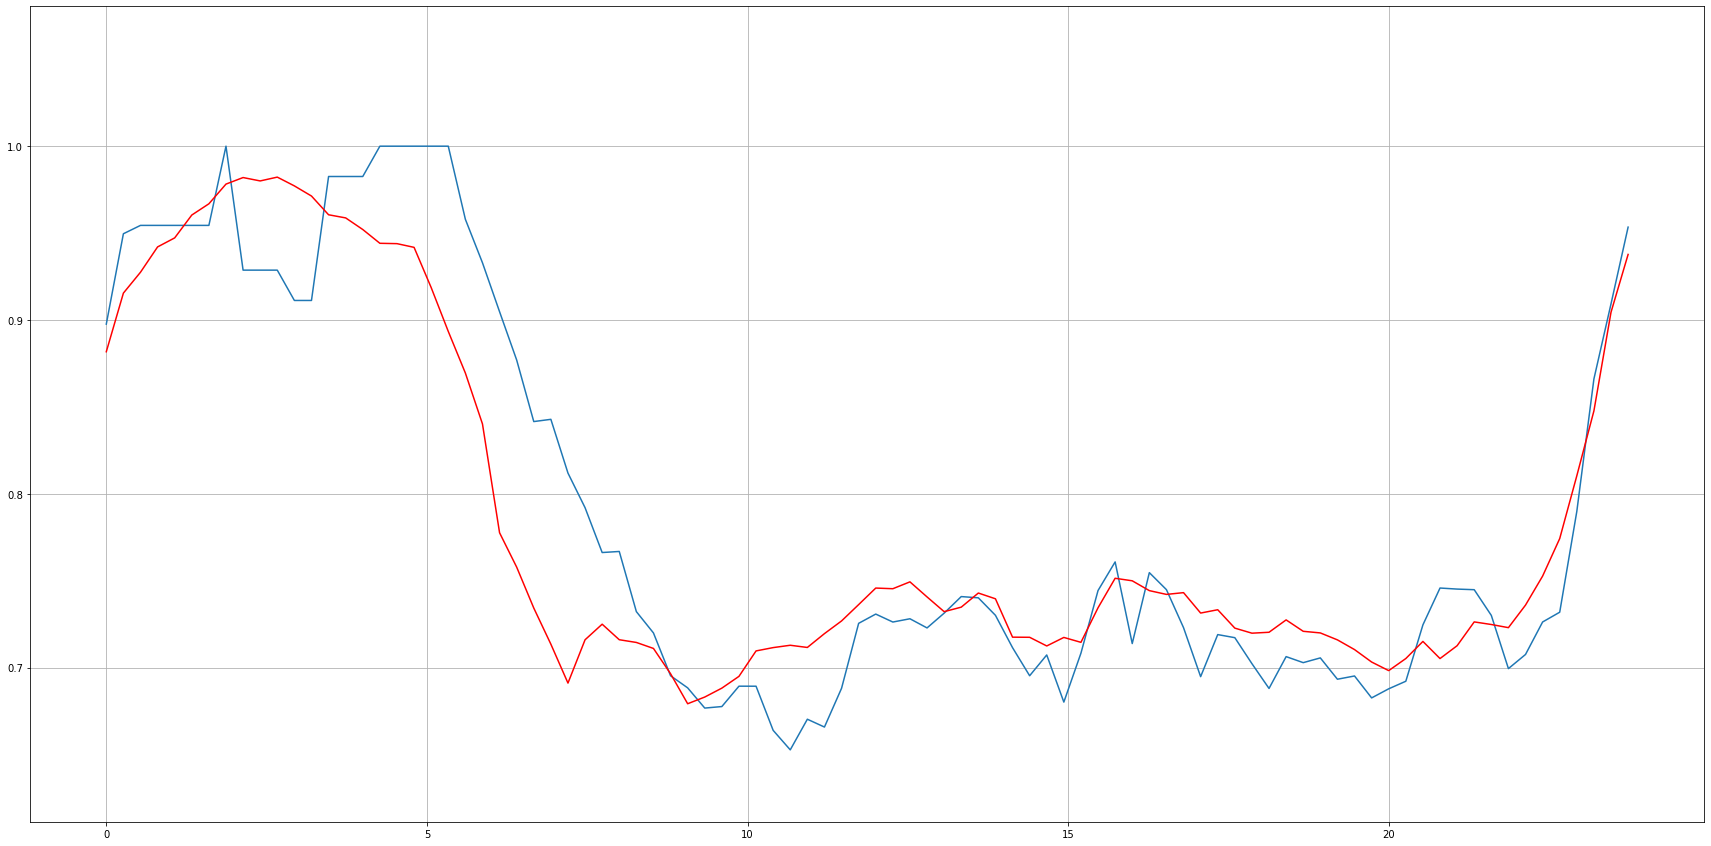

<Figure size 2160x1080 with 0 Axes>

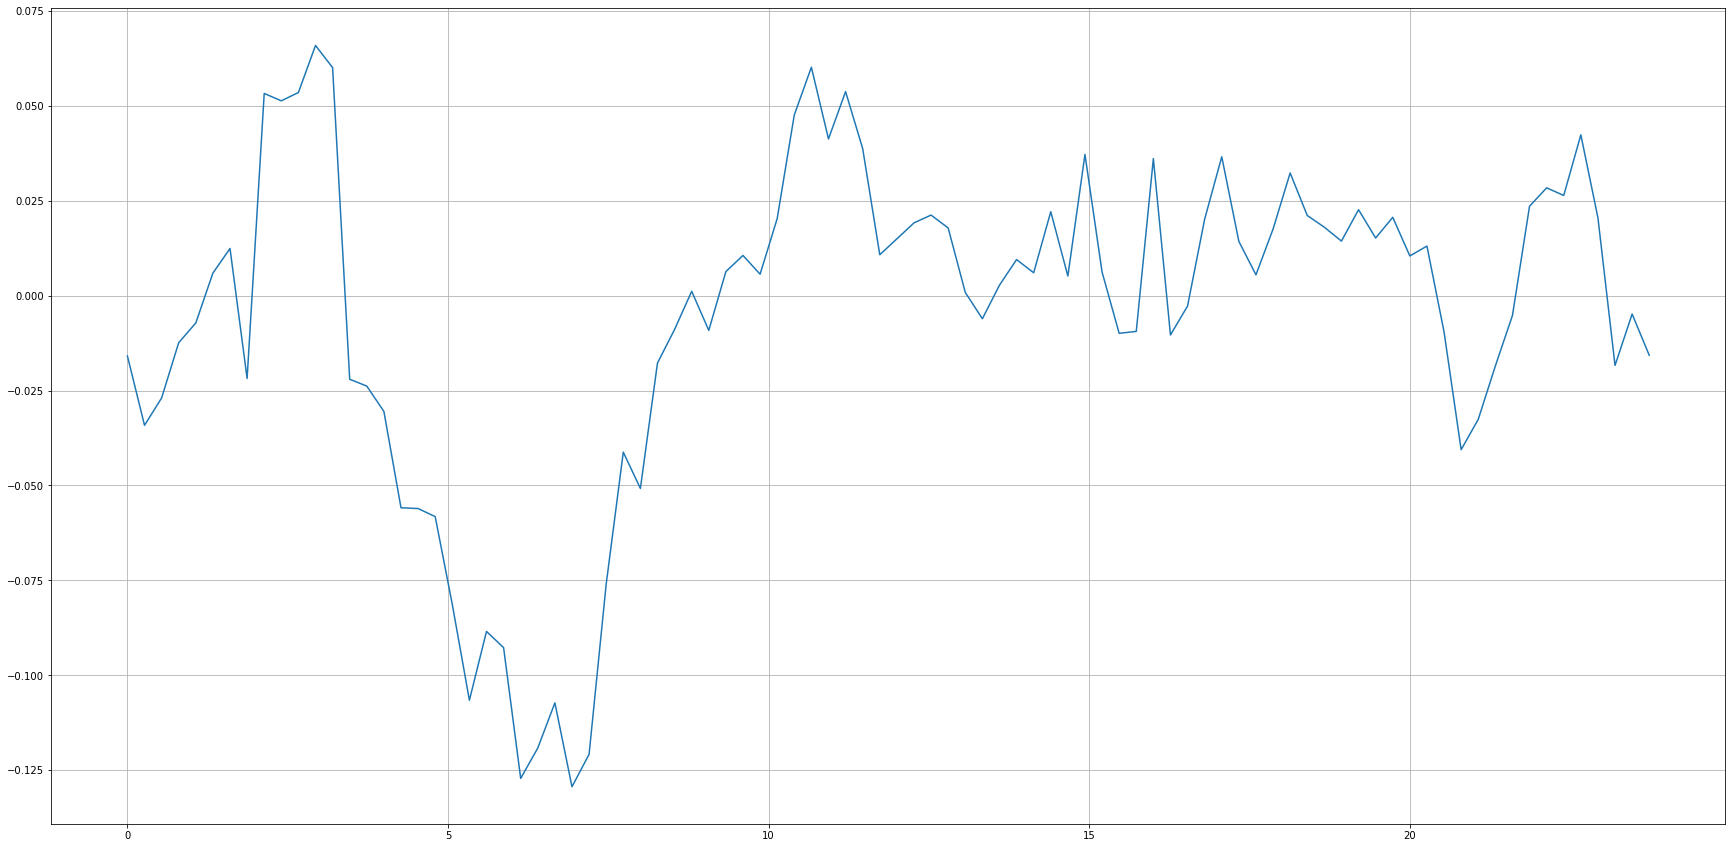

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0020073361612378375
RMSE=  0.044803305249030874
time taken:  0:04:04.512682


In [72]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='statespace',low_memory=True,cov_type='approx'))#16T

started = 2023-06-24 23:58:48.588334
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  innovations_mle
low memory:  True
cov type:  none
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py:374: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


start predicting
test:  90
predictions:  90
predicted days:  1.0


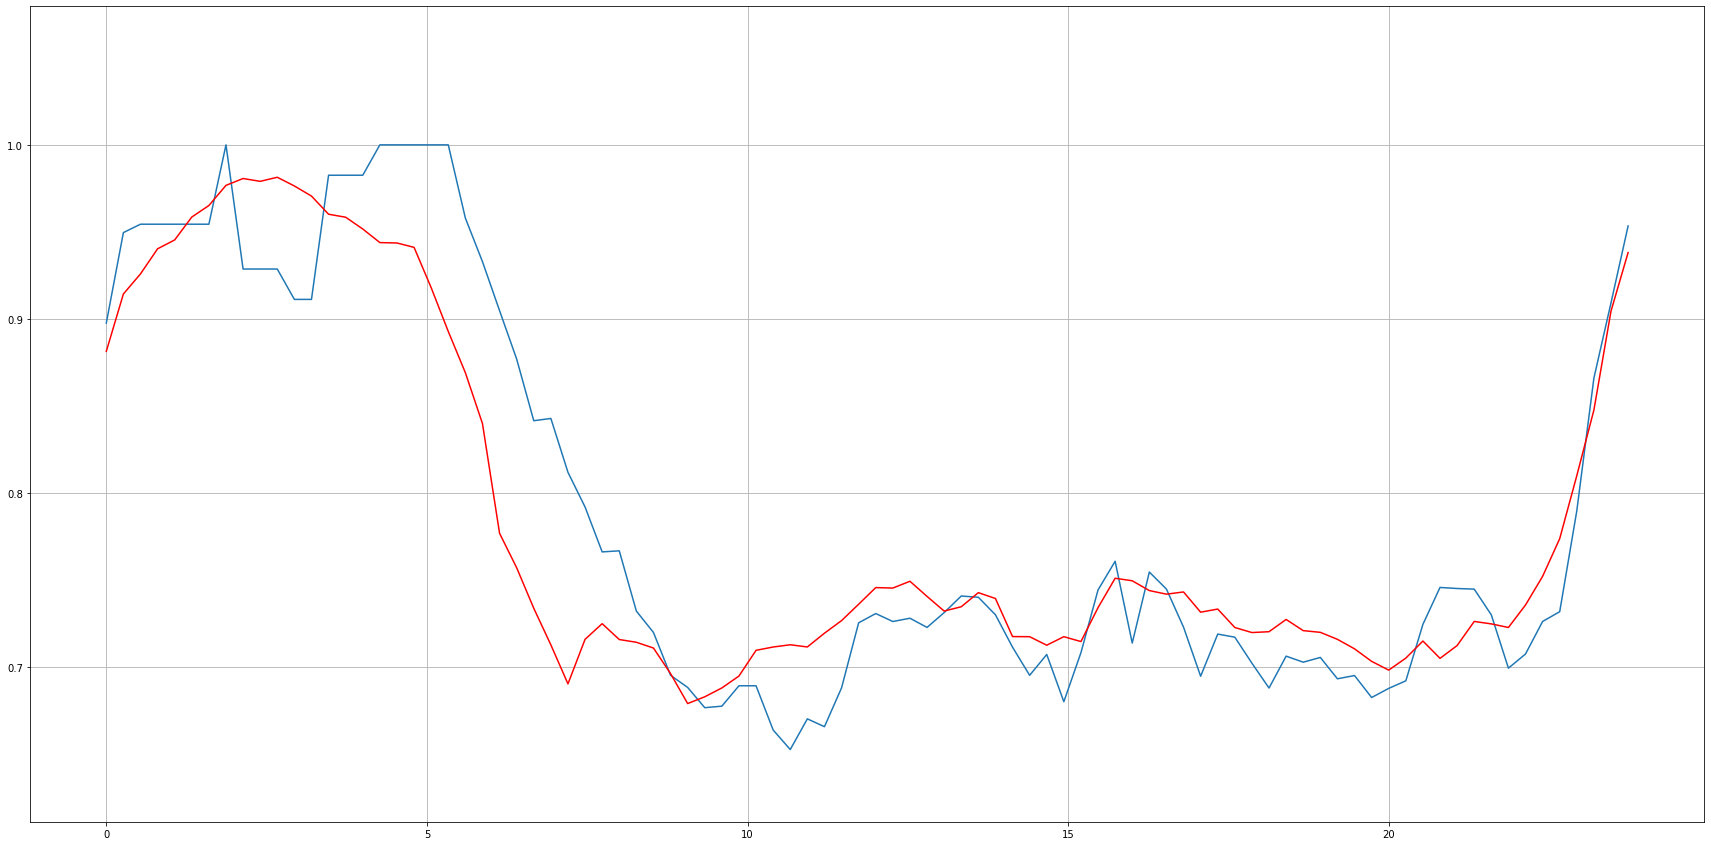

<Figure size 2160x1080 with 0 Axes>

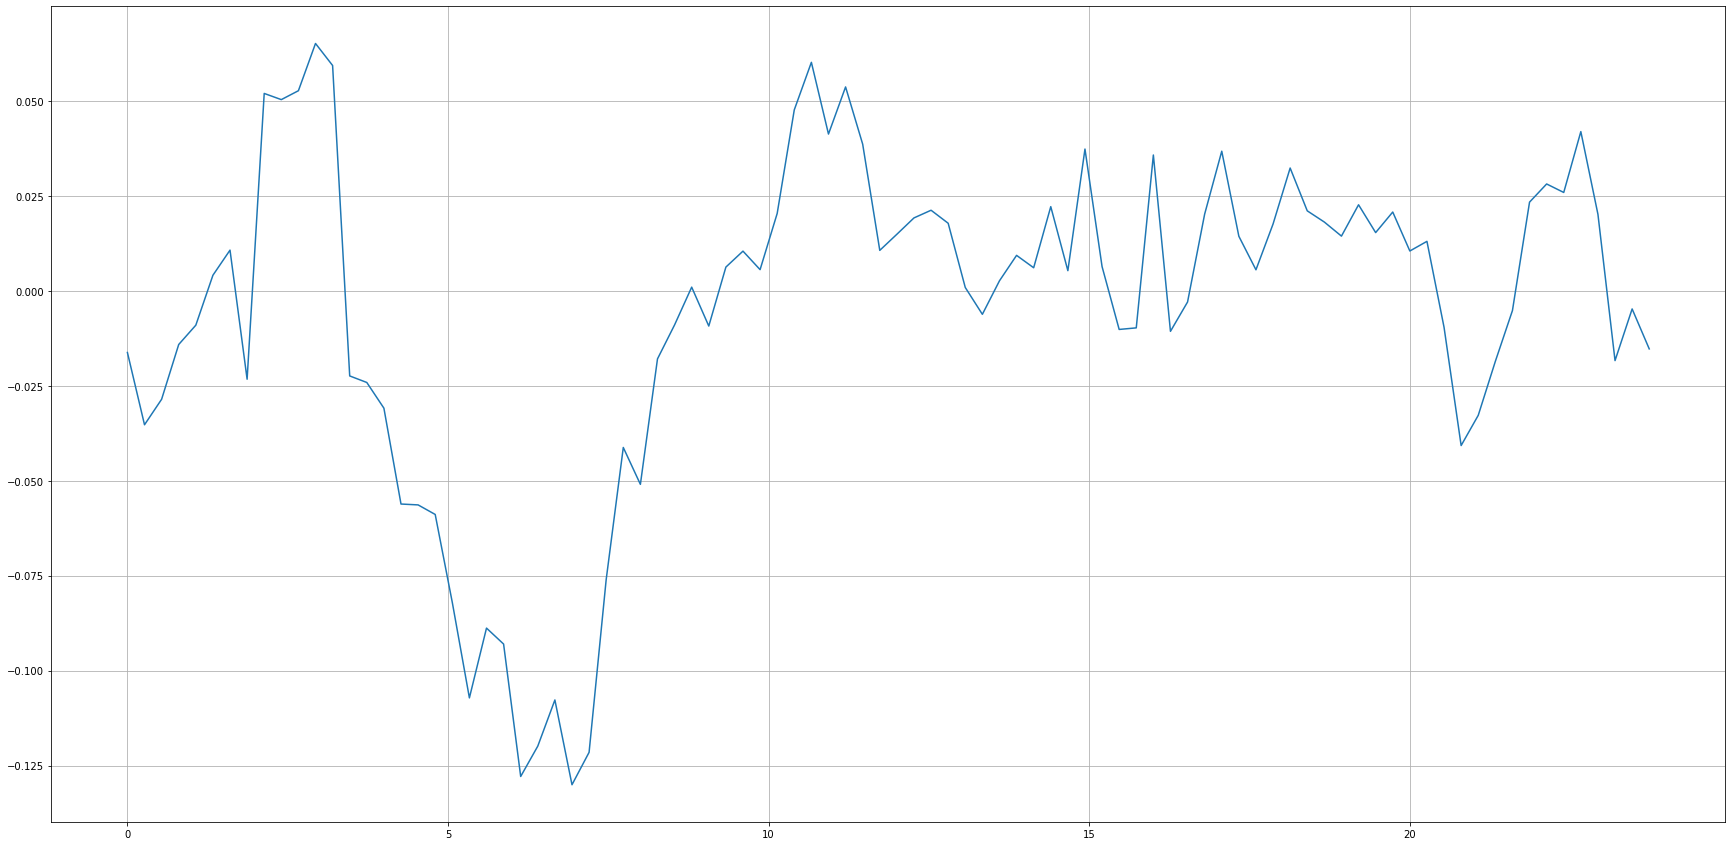

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0020193686983741967
RMSE=  0.044937386421266164
time taken:  0:00:24.351634


In [77]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='innovations_mle',low_memory=True,cov_type='none'))#16T

started = 2023-06-25 00:00:06.342960
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  innovations_mle
low memory:  False
cov type:  none
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py:374: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


start predicting
test:  90
predictions:  90
predicted days:  1.0


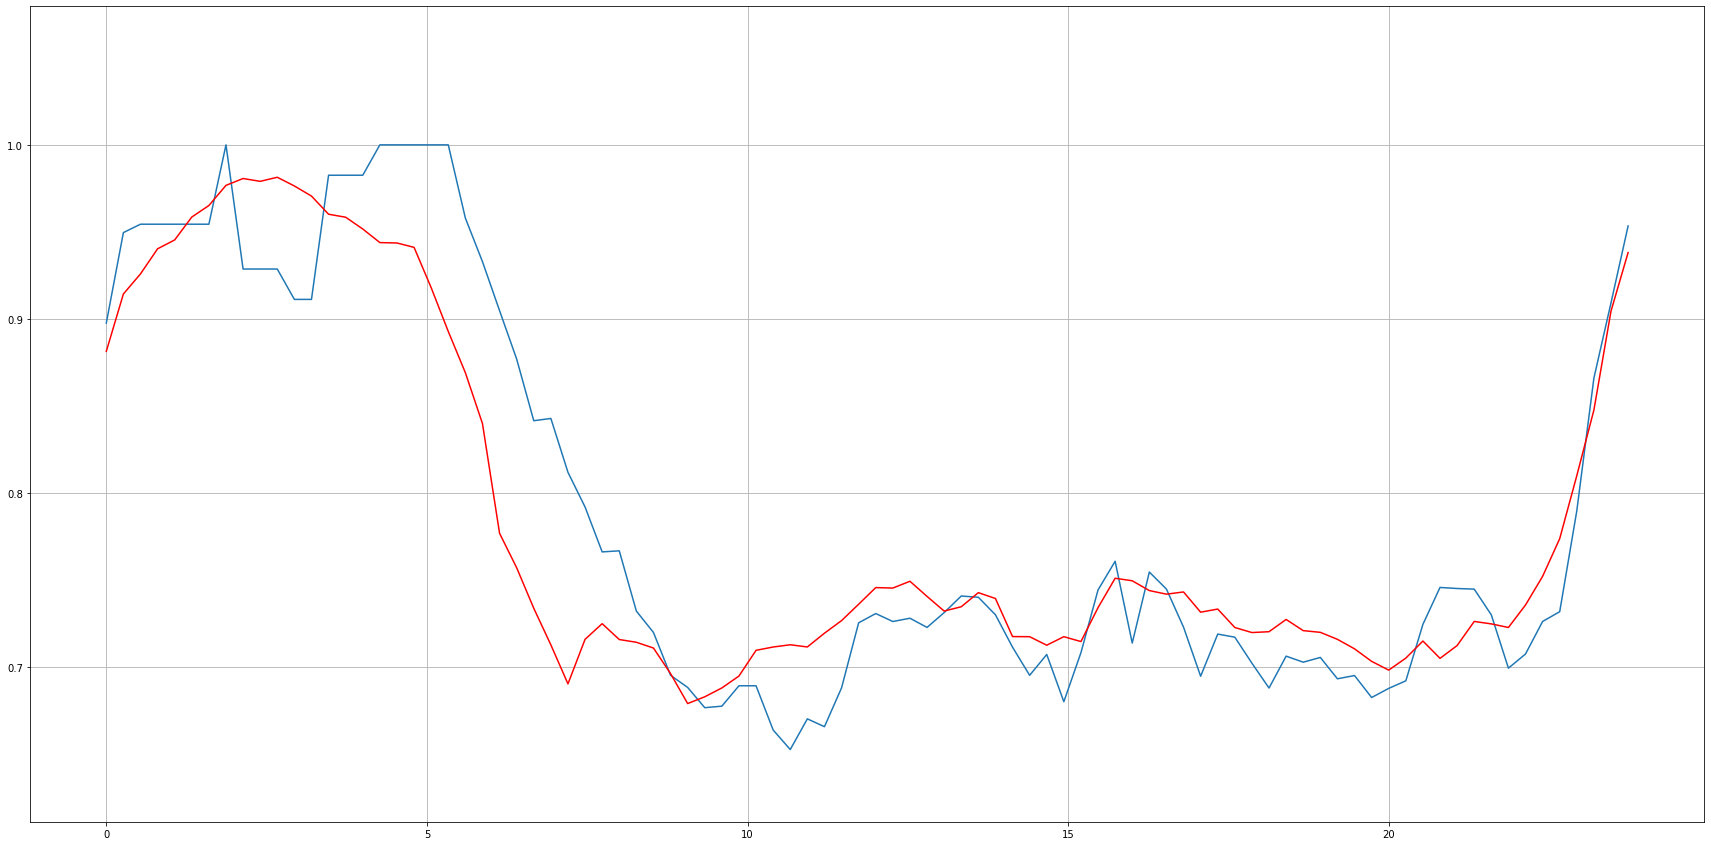

<Figure size 2160x1080 with 0 Axes>

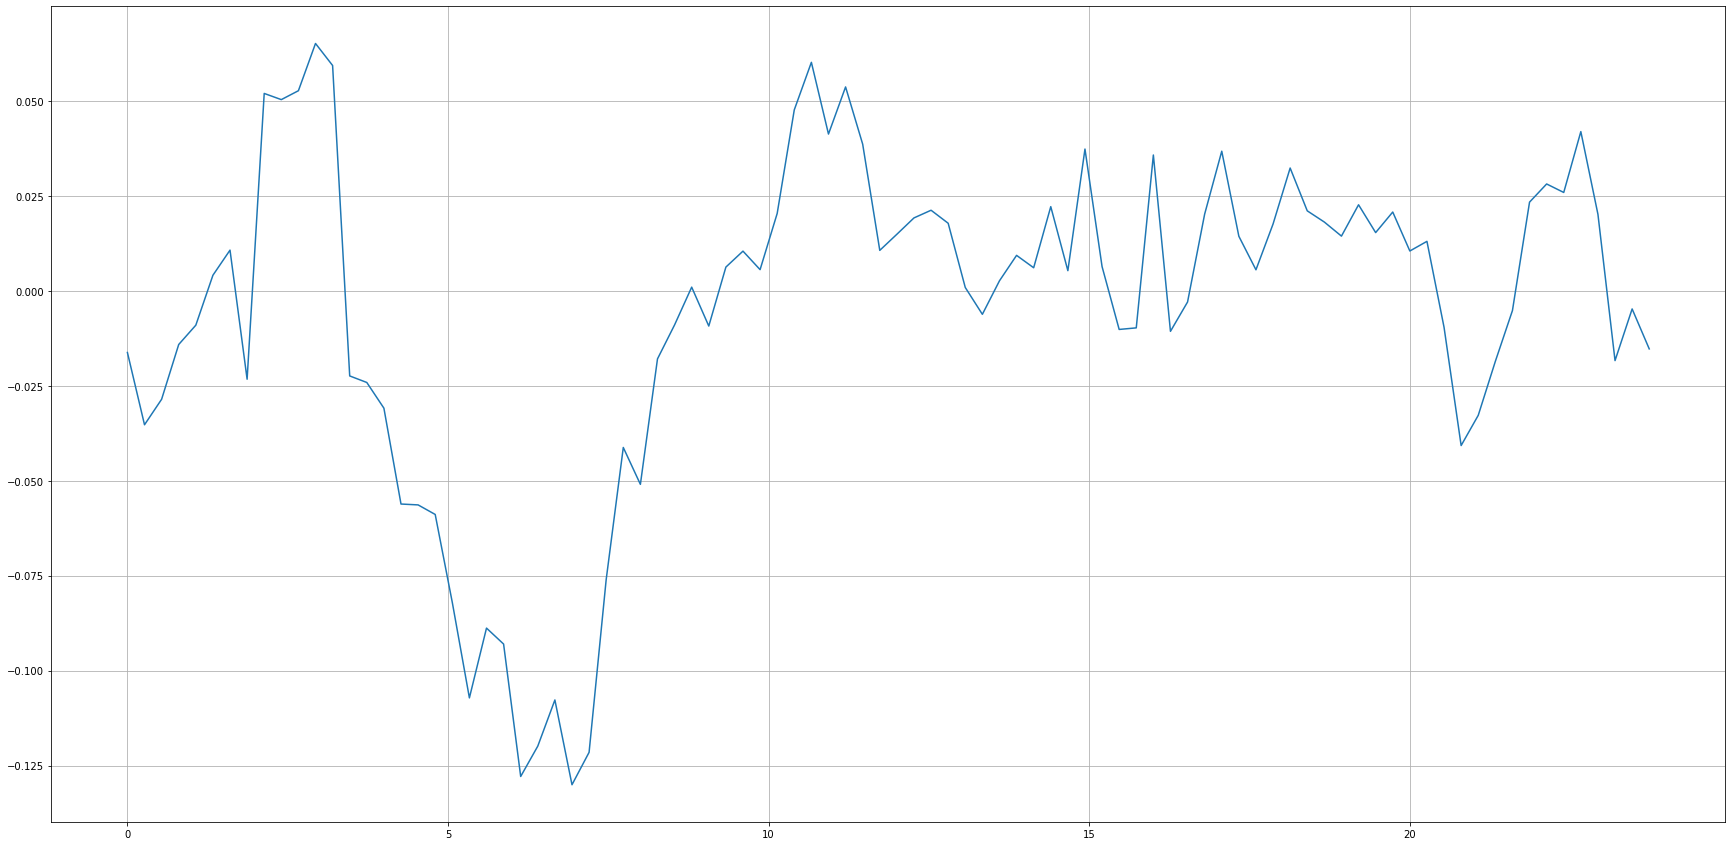

<Figure size 2160x1080 with 0 Axes>

mean squared error=  0.0020193686983741967
RMSE=  0.044937386421266164
time taken:  0:00:21.009941


In [78]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='innovations_mle',low_memory=False,cov_type='none'))#16T

In [76]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='',low_memory=True,cov_type='approx'))#16T

started = 2023-06-24 23:58:28.240871
parameters: (1, 0, 1)
seasonal parameters: (1, 1, 1, 90)
method:  hannan_rissanen
low memory:  True
cov type:  approx
training data:  538
training days:  5.977777777777778
testing data:  90
testing days:  1.0
start training


ValueError: Hannan-Rissanen estimator does not support seasonal components.

<Figure size 2160x1080 with 0 Axes>

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(data_days7_smooth1_edge0_normalized,6/7,3,(1, 0, 1) ,(1, 1, 1, periodicity), 0,method='none',low_memory=True,cov_type='none'))#16T